In [1]:
import sys
sys.executable # checking environment

'/home/yusuf/mileapp_env/bin/python'

### To Do List

This is the instruction from the task:
```
This test will assess your analytical thinking, how you work with data, and transform your findings into insight or something useful. We have provided a sample of delivery tasks for 10 days. From this data, we'd like to know what insight you can get. Some part of the insight should be related to machine learning and data visualization.

All of your work should be pushed to your own Git repository, including the result of your
insight in any formats such as Markdown, HTML, PDF, etc.

The data can be accessed from: https://github.com/indrasetiadhip/data-task-sample.

Please send back the link of your Git repository to datascientist.test@mile.app,
with the following subject: [Your name] – Data Scientist Test.
```
This is how I am going to approach the problem:
1. Read README.md
2. Create some exploratory data analysis (EDA)
3. Formulate business problems and list some hypotheses to answer the problem
4. (Optional if there is still time) Validate the hypothesis by machine learning

### 1. Read README.md

These are the additional information from the `README.md` file

#### Fields

`taskId`: Unique identifier for the task that generated by system.

`taskCreatedTime`: Time at when the task was created.

`taskCompletedTime`: Time at when the task was completed.

`taskAssignedTo`: Worker that doing the task.

`taskLocationDone`: Coordinate of where the task was completed.

`flow`: Flow or type of the task.

`cod`: Contains data for the COD system.

`cod.amount`: Amount of money from COD.

`cod.received`: COD has been received or not.

`UserVar`: Contains more specified data, in this case the 'UserVar' is about delivery task data.

`UserVar.taskStatus`: Delivery status code.

`UserVar.taskStatusLabel`: Delivery status label.

`UserVar.taskDetailStatus`: Detailed delivery status code.

`UserVar.taskDetailStatusLabel`: Detailed delivery status label.

`UserVar.branch_origin`: Branch code of the origin.

`UserVar.branch_dest`: Branch code of the destination.

`UserVar.weight	Weight`: of the package.

### 2. Exploratory Data Analysis

In [2]:
# import basic libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install feature-engine

You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [4]:
# let's check the data
df = pd.read_json('./data-task-sample-main/data-sample.json')
df.head()

taskLocationDone            taskCreatedTime  \
0          {'lon': 109.7629103, 'lat': -6.9266078}  2022-11-01 20:17:26 +0700   
1          {'lon': 110.0339859, 'lat': -7.8761542}  2022-11-01 08:41:07 +0700   
2  {'lon': 109.999733, 'lat': -7.8497772999999995}  2022-11-01 08:41:07 +0700   
3           {'lon': 110.0037077, 'lat': -7.710998}  2022-11-01 08:41:07 +0700   
4          {'lon': 110.0138869, 'lat': -7.8297416}  2022-11-01 08:41:07 +0700   

                                    cod  taskAssignedTo  \
0  {'amount': 685000, 'received': True}   pacifiedLion0   
1   {'amount': 53500, 'received': True}  peacefulTacos6   
2  {'amount': 179500, 'received': True}  peacefulTacos6   
3   {'amount': 31815, 'received': True}  peacefulTacos6   
4  {'amount': 144562, 'received': True}  peacefulTacos6   

           taskCompletedTime taskStatus      flow                taskId  \
0  2022-11-01 20:46:30 +0700       done  Delivery  4fe3b237c832ca4841a2   
1  2022-11-01 12:33:48 +0700       done  Delivery  08a4da25256affae8446   
2  2022-11-01 13:41:57 +0700       done  Delivery  2ff0dc469826158b7684   
3  2022-11-01 18:18:19 +0700       done  Delivery  331c172c2b383f774328   
4  2022-11-01 10:51:49 +0700       done  Delivery  a9d53fa96c80baee8b23   

                                             UserVar  
0  {'branch_dest': 'SRG', 'taskStatusLabel': 'Suc...  
1  {'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...  
2  {'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...  
3  {'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...  
4  {'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...

We can see that there are JSONs in the column. We are going to expand it first

In [5]:
import json
cols = ['taskLocationDone', 'cod']
df = pd.json_normalize(df.to_dict(orient='records'))
df = df.drop(cols, axis=1)
df.head()

taskCreatedTime  taskAssignedTo          taskCompletedTime  \
0  2022-11-01 20:17:26 +0700   pacifiedLion0  2022-11-01 20:46:30 +0700   
1  2022-11-01 08:41:07 +0700  peacefulTacos6  2022-11-01 12:33:48 +0700   
2  2022-11-01 08:41:07 +0700  peacefulTacos6  2022-11-01 13:41:57 +0700   
3  2022-11-01 08:41:07 +0700  peacefulTacos6  2022-11-01 18:18:19 +0700   
4  2022-11-01 08:41:07 +0700  peacefulTacos6  2022-11-01 10:51:49 +0700   

  taskStatus      flow                taskId  taskLocationDone.lon  \
0       done  Delivery  4fe3b237c832ca4841a2            109.762910   
1       done  Delivery  08a4da25256affae8446            110.033986   
2       done  Delivery  2ff0dc469826158b7684            109.999733   
3       done  Delivery  331c172c2b383f774328            110.003708   
4       done  Delivery  a9d53fa96c80baee8b23            110.013887   

   taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
0             -6.926608    685000.0         True                 SRG   
1             -7.876154     53500.0         True                 MGL   
2             -7.849777    179500.0         True                 MGL   
3             -7.710998     31815.0         True                 MGL   
4             -7.829742    144562.0         True                 MGL   

  UserVar.taskStatusLabel UserVar.receiver_city UserVar.taskDetailStatusLabel  \
0                 Success    BATANG ,KAB BATANG             YANG BERSANGKUTAN   
1                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
2                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
3                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
4                 Success     BAGELEN,PURWOREJO             YANG BERSANGKUTAN   

  UserVar.taskDetailStatus UserVar.weight UserVar.branch_origin  \
0                      D01             13                   CGK   
1                      D01            1.3                   CGK   
2                      D01              3                   CGK   
3                      D01          0.625                   CGK   
4                      D01              3                   CGK   

  UserVar.taskStatus  
0             COLF01  
1             COLF01  
2             COLF01  
3             COLF01  
4             COLF01

#### Assumptions

Since there are information that are not contained in the `README.md`, we need to make assumptions before we jump into the analysis. The branch origins and branch destinations looks very similar to IATA code, which can be read [here](https://en.wikipedia.org/wiki/IATA_airport_code#:~:text=An%20IATA%20airport%20code%2C%20also,Air%20Transport%20Association%20(IATA).). We'll assume that it is really the airport code and the deliveries are from airports and to airports.

Now the DataFrame is expanded and we can check some information about the data

In [6]:
print('Number of rows:', len(df))

Number of rows: 8334


Let's check for the null values and see whether we can make sense out of the data

In [7]:
df.isna().sum()

taskCreatedTime                     0
taskAssignedTo                      1
taskCompletedTime                 768
taskStatus                          0
flow                                0
taskId                              0
taskLocationDone.lon              768
taskLocationDone.lat              768
cod.amount                       5976
cod.received                     5976
UserVar.branch_dest                 0
UserVar.taskStatusLabel           762
UserVar.receiver_city              52
UserVar.taskDetailStatusLabel     762
UserVar.taskDetailStatus          762
UserVar.weight                      0
UserVar.branch_origin             293
UserVar.taskStatus                762
dtype: int64

Let's define our hypotheses when seeing the null values:
1. `taskAssignedTo`: It is possible that the task hasn't been assigned to anyone, and that also explains why there is only one value missing. If it is true, other fields should also have null value, especially `taskCompletedTime`.
2. `taskCompletedTime`: It is possible that incomplete tasks can have null completion time. We can validate this hypothesis by looking at `taskStatus` column.
3. `taskLocationDone.lon` and `taskLocationDone.lat`: These columns have the same number of null values with `taskCompletedTime`, which strengthens the previous hypothesis.
4. `cod.amount`: COD stands for **Cash on Delivery**, that is one type of delivery method which enable customers to pay once the package arrives. This column should contain the amount paid by the customers
5. `cod.received`: Same as before. Should contain boolean information whether the COD items are received by customers or not
6. `UserVar.taskStatusLabel`: We'll need to check the unique values contained in the column before we can make any assumption about the column
7. `UserVar.receiver_city`: This is quite confusing. Receiver city should be a crucial information in delivery data. We'll need to take a closer look to the missing values
8. `UserVar.taskDetailStatusLabel`: When I look into the sample data above, I guess it's about how the delivery is directed to. `YANG BERSANGKUTAN` can mean the package is delivered to the user who created the order. Nevertheless, we'll need to look at the data more closely
9. `UserVar.taskDetailStatus`: Should contain the codified version of the previous column
10. `UserVar.branch_origin`: Should contain the original branch for the delivery
11. `UserVar.taskStatus`: Should contain the status of the task

In [8]:
df.describe().transpose()

count           mean            std         min  \
taskLocationDone.lon  7566.0      75.355852      52.492016    0.000000   
taskLocationDone.lat  7566.0      -3.610514       3.647171  -10.493658   
cod.amount            2358.0  191141.083545  272377.003934  837.000000   

                               25%            50%            75%           max  
taskLocationDone.lon      0.000000     106.843097     112.182877  1.408064e+02  
taskLocationDone.lat     -7.061575      -3.329263       0.000000  5.564040e+00  
cod.amount            61000.000000  153375.000000  235000.000000  4.730000e+06

According to [this source](https://latitudelongitude.org/id/), Indonesia's coordinate are: Latitude from -10.1718 to 5.88969 and longitude from 95.31644 to 140.71813. Which should make sense for the latitude data. However, there is something fishy with the `taskLocationDone.lon` since the first quartile of the longitude are filled with zeroes.

We'll need to take a closer look to the data to find out what to do with that column later on.

In [9]:
df[df['taskLocationDone.lon'] == 0.000000]

taskCreatedTime    taskAssignedTo          taskCompletedTime  \
1417  2022-11-02 07:42:18 +0700    thriftyWigeon5  2022-11-02 07:44:24 +0700   
1547  2022-11-02 07:50:24 +0700     drearyPepper9  2022-11-02 07:51:37 +0700   
1548  2022-11-02 07:50:24 +0700     drearyPepper9  2022-11-02 07:51:37 +0700   
1551  2022-11-02 07:50:24 +0700     drearyPepper9  2022-11-02 07:51:37 +0700   
1554  2022-11-02 07:50:24 +0700     drearyPepper9  2022-11-02 07:51:37 +0700   
...                         ...               ...                        ...   
8325  2022-11-10 08:23:41 +0700       ferventBoa6  2022-11-10 09:38:02 +0700   
8326  2022-11-10 08:37:54 +0700  gutturalLapwing2  2022-11-10 09:38:03 +0700   
8328  2022-11-10 07:46:14 +0700    emptyPretzels3  2022-11-10 09:37:50 +0700   
8329  2022-11-10 09:07:12 +0700    debonairPonie1  2022-11-10 09:38:04 +0700   
8333  2022-11-10 07:46:13 +0700    emptyPretzels3  2022-11-10 09:37:50 +0700   

     taskStatus      flow                taskId  taskLocationDone.lon  \
1417       done  Delivery  68f683f1ca7d14664398                   0.0   
1547       done  Delivery  9e551fdece96cf3dbf1c                   0.0   
1548       done  Delivery  e9b5c110774d0c4ebaa0                   0.0   
1551       done  Delivery  d8fae27f339cc481883a                   0.0   
1554       done  Delivery  5f65da66c47f35ce7186                   0.0   
...         ...       ...                   ...                   ...   
8325       done  Delivery  a51606c83f1f0d64fbdb                   0.0   
8326       done  Delivery  ae9cb5cfa113db947621                   0.0   
8328       done  Delivery  469a6678ea253784e7e3                   0.0   
8329       done  Delivery  501af4e040a742e9e878                   0.0   
8333       done  Delivery  cdb90c597655282306fd                   0.0   

      taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
1417                   0.0     31906.0        False                 PGK   
1547                   0.0         NaN          NaN                 PLM   
1548                   0.0         NaN          NaN                 PLM   
1551                   0.0         NaN          NaN                 PLM   
1554                   0.0         NaN          NaN                 PLM   
...                    ...         ...          ...                 ...   
8325                   0.0         NaN          NaN                 DJB   
8326                   0.0         NaN          NaN                 DPK   
8328                   0.0         NaN          NaN                 CGK   
8329                   0.0         NaN          NaN                 CGK   
8333                   0.0         NaN          NaN                 CGK   

     UserVar.taskStatusLabel UserVar.receiver_city  \
1417                  Failed  GABEK,PANGKAL PINANG   
1547                  Failed       PLAJU,PALEMBANG   
1548                  Failed  SEBERANG ULU I, PALE   
1551                  Failed  SEBERANG ULU I, PALE   
1554                  Failed             PALEMBANG   
...                      ...                   ...   
8325                 Success    DENDANG,MUARASABAK   
8326                 Success       SUKMAJAYA,DEPOK   
8328                 Success         JAKARTA PUSAT   
8329                 Success  PALMERAH ,JAKARTA BA   
8333                 Success         JAKARTA PUSAT   

      UserVar.taskDetailStatusLabel UserVar.taskDetailStatus UserVar.weight  \
1417                       MISROUTE                      U12           0.02   
1547                       MISROUTE                      U12              2   
1548                       MISROUTE                      U12              1   
1551                       MISROUTE                      U12              1   
1554                       MISROUTE                      U12              1   
...                             ...                      ...            ...   
8325              YANG BERSANGKUTAN                      D01              2

From the data, we can infer that it's not just the longitude data is missing. The latitude data is also missing. We are going to mark those observations.

In [10]:
df['is_latlon_missing'] = df['taskLocationDone.lon'].apply(lambda x: 1 if x == 0.0 else 0)
df[df['taskLocationDone.lon'] == 0.0].head()

taskCreatedTime  taskAssignedTo          taskCompletedTime  \
1417  2022-11-02 07:42:18 +0700  thriftyWigeon5  2022-11-02 07:44:24 +0700   
1547  2022-11-02 07:50:24 +0700   drearyPepper9  2022-11-02 07:51:37 +0700   
1548  2022-11-02 07:50:24 +0700   drearyPepper9  2022-11-02 07:51:37 +0700   
1551  2022-11-02 07:50:24 +0700   drearyPepper9  2022-11-02 07:51:37 +0700   
1554  2022-11-02 07:50:24 +0700   drearyPepper9  2022-11-02 07:51:37 +0700   

     taskStatus      flow                taskId  taskLocationDone.lon  \
1417       done  Delivery  68f683f1ca7d14664398                   0.0   
1547       done  Delivery  9e551fdece96cf3dbf1c                   0.0   
1548       done  Delivery  e9b5c110774d0c4ebaa0                   0.0   
1551       done  Delivery  d8fae27f339cc481883a                   0.0   
1554       done  Delivery  5f65da66c47f35ce7186                   0.0   

      taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
1417                   0.0     31906.0        False                 PGK   
1547                   0.0         NaN          NaN                 PLM   
1548                   0.0         NaN          NaN                 PLM   
1551                   0.0         NaN          NaN                 PLM   
1554                   0.0         NaN          NaN                 PLM   

     UserVar.taskStatusLabel UserVar.receiver_city  \
1417                  Failed  GABEK,PANGKAL PINANG   
1547                  Failed       PLAJU,PALEMBANG   
1548                  Failed  SEBERANG ULU I, PALE   
1551                  Failed  SEBERANG ULU I, PALE   
1554                  Failed             PALEMBANG   

     UserVar.taskDetailStatusLabel UserVar.taskDetailStatus UserVar.weight  \
1417                      MISROUTE                      U12           0.02   
1547                      MISROUTE                      U12              2   
1548                      MISROUTE                      U12              1   
1551                      MISROUTE                      U12              1   
1554                      MISROUTE                      U12              1   

     UserVar.branch_origin UserVar.taskStatus  is_latlon_missing  
1417                   CGK             COLF02                  1  
1547                   CGK             COLF02                  1  
1548                   CGK             COLF02                  1  
1551                   CGK             COLF02                  1  
1554                   CGK             COLF02                  1

Also, I realized that the weights are not included in the describe method. Let's see why

In [11]:
df['UserVar.weight'].dtypes

dtype('O')

In [12]:
df['UserVar.weight'] = pd.to_numeric(df['UserVar.weight'])

In [13]:
df.describe().transpose()

count           mean            std         min  \
taskLocationDone.lon  7566.0      75.355852      52.492016    0.000000   
taskLocationDone.lat  7566.0      -3.610514       3.647171  -10.493658   
cod.amount            2358.0  191141.083545  272377.003934  837.000000   
UserVar.weight        8334.0       2.448298       6.188171    0.000000   
is_latlon_missing     8334.0       0.294096       0.455663    0.000000   

                               25%            50%            75%           max  
taskLocationDone.lon      0.000000     106.843097     112.182877  1.408064e+02  
taskLocationDone.lat     -7.061575      -3.329263       0.000000  5.564040e+00  
cod.amount            61000.000000  153375.000000  235000.000000  4.730000e+06  
UserVar.weight            1.000000       1.000000       1.600000  2.025000e+02  
is_latlon_missing         0.000000       0.000000       1.000000  1.000000e+00

There is something weird with items 0.000000 weight. We'll need to take a closer look

In [14]:
df[df['UserVar.weight'] == 0.000000]

taskCreatedTime    taskAssignedTo          taskCompletedTime  \
70    2022-11-01 11:03:45 +0700  peacefulVenison0  2022-11-01 17:45:55 +0700   
2135  2022-11-03 07:21:33 +0700        sugaryBoa6  2022-11-03 08:55:05 +0800   
2652  2022-11-04 11:28:38 +0700      alertWeaver9  2022-11-04 13:58:16 +0700   
3712  2022-11-05 07:35:42 +0700         shyRuffs7  2022-11-05 07:40:48 +0700   
4389  2022-11-06 07:02:52 +0700    peskyIcecream0  2022-11-06 07:40:10 +0700   
6566  2022-11-09 09:15:06 +0700    wrathfulPonie6  2022-11-09 09:15:50 +0700   

     taskStatus      flow                taskId  taskLocationDone.lon  \
70         done  Delivery  58937cf4397aca5e0020            106.341412   
2135       done  Delivery  bf6565f93725ce15c676            120.466370   
2652       done  Delivery  cc5b0a14fc5d3022a7ab            106.755656   
3712       done  Delivery  f664518c787e7c1fe467            112.662842   
4389       done  Delivery  2fb1b915aea3f9d05f07            107.010696   
6566       done  Delivery  eaa82505ca732aa51b00            104.073117   

      taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
70               -6.662407     29842.0         True                 CLG   
2135             -8.610245         NaN          NaN                 KOE   
2652             -6.193987         NaN          NaN                 CGK   
3712             -7.965735         NaN          NaN                 MXG   
4389             -6.235479         NaN          NaN                 BKI   
6566             -5.028200         NaN          NaN                 TKG   

     UserVar.taskStatusLabel UserVar.receiver_city  \
70                   Success  SOBANG ,RANGKASBITUN   
2135                 Success  KEC.RUTENG,MANGGARAI   
2652                 Success  KEMBANGAN ,JAKARTA B   
3712                  Failed  PAKIS,KABUPATEN MALA   
4389                 Success  BEKASI TIMUR, BEKASI   
6566                 Success     BALIK BUKIT, LIWA   

                    UserVar.taskDetailStatusLabel UserVar.taskDetailStatus  \
70                              YANG BERSANGKUTAN                      D01   
2135                                        SUPIR                      D11   
2652                            YANG BERSANGKUTAN                      D01   
3712  RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)                      U05   
4389                            YANG BERSANGKUTAN                      D01   
6566                            YANG BERSANGKUTAN                      D01   

      UserVar.weight UserVar.branch_origin UserVar.taskStatus  \
70               0.0                   CGK             COLF01   
2135             0.0                   CGK             COLF01   
2652             0.0                   CGK             COLF01   
3712             0.0                   CGK             COLF02   
4389             0.0                   CGK             COLF01   
6566             0.0                   TKG             COLF01   

      is_latlon_missing  
70                    0  
2135                  0  
2652                  0  
3712                  0  
4389                  0  
6566                  0

We can see from preliminary health check that there is no particular pattern to rows with 0 weight, because we can success and failed tasks in `UserVar.taskStatusLabel`. Maybe we can find some pattern later when we visualize the data. For now, let's just mark those rows.

In [15]:
df['is_weight_zero'] = df['UserVar.weight'].apply(lambda x: 1 if x == 0.0 else 0)
df[df['UserVar.weight'] == 0.0].head()

taskCreatedTime    taskAssignedTo          taskCompletedTime  \
70    2022-11-01 11:03:45 +0700  peacefulVenison0  2022-11-01 17:45:55 +0700   
2135  2022-11-03 07:21:33 +0700        sugaryBoa6  2022-11-03 08:55:05 +0800   
2652  2022-11-04 11:28:38 +0700      alertWeaver9  2022-11-04 13:58:16 +0700   
3712  2022-11-05 07:35:42 +0700         shyRuffs7  2022-11-05 07:40:48 +0700   
4389  2022-11-06 07:02:52 +0700    peskyIcecream0  2022-11-06 07:40:10 +0700   

     taskStatus      flow                taskId  taskLocationDone.lon  \
70         done  Delivery  58937cf4397aca5e0020            106.341412   
2135       done  Delivery  bf6565f93725ce15c676            120.466370   
2652       done  Delivery  cc5b0a14fc5d3022a7ab            106.755656   
3712       done  Delivery  f664518c787e7c1fe467            112.662842   
4389       done  Delivery  2fb1b915aea3f9d05f07            107.010696   

      taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
70               -6.662407     29842.0         True                 CLG   
2135             -8.610245         NaN          NaN                 KOE   
2652             -6.193987         NaN          NaN                 CGK   
3712             -7.965735         NaN          NaN                 MXG   
4389             -6.235479         NaN          NaN                 BKI   

     UserVar.taskStatusLabel UserVar.receiver_city  \
70                   Success  SOBANG ,RANGKASBITUN   
2135                 Success  KEC.RUTENG,MANGGARAI   
2652                 Success  KEMBANGAN ,JAKARTA B   
3712                  Failed  PAKIS,KABUPATEN MALA   
4389                 Success  BEKASI TIMUR, BEKASI   

                    UserVar.taskDetailStatusLabel UserVar.taskDetailStatus  \
70                              YANG BERSANGKUTAN                      D01   
2135                                        SUPIR                      D11   
2652                            YANG BERSANGKUTAN                      D01   
3712  RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)                      U05   
4389                            YANG BERSANGKUTAN                      D01   

      UserVar.weight UserVar.branch_origin UserVar.taskStatus  \
70               0.0                   CGK             COLF01   
2135             0.0                   CGK             COLF01   
2652             0.0                   CGK             COLF01   
3712             0.0                   CGK             COLF02   
4389             0.0                   CGK             COLF01   

      is_latlon_missing  is_weight_zero  
70                    0               1  
2135                  0               1  
2652                  0               1  
3712                  0               1  
4389                  0               1

Now, we are going to further check our data as follows:
1. We can check if there are any duplicate IDs in the data.
2. According to the `README.md`, the sample data should contain 10 days delivery data. We are going to check if it is really the case.
3. If the delivery data contains full data of the day, we can check for the (most/least) busy day.
4. There are undone tasks in the dataset. If the data is cut at certain cutoff, the undone task should be concentrated on the last days in the dataset. We need to be cautious when analyzing those data. 
5. We can know the rush hour of the origin branch from `taskCreatedTime`. We can improve the experience of the customers and our employees by putting more workers during those critical hours.
6. Since we have the information of the worker, we can check for the worst/best worker (productivity). However, the main problem is we don't know what assigned means. Is the assigned worker related to the delivery location? Is there a worker working for two or more branch?
7. We can investigate `UserVar.branch_dest` and `taskLocationDone` Relationship.
8. There are quite a few `UserVar.taskDetailStatusLabel`. We can check for the failed status and see whether there are any pattern to other columns.
9. We can check whether the `taskLocationDone` is the nearest to the branch destination and suggest new branches that will increase our delivery efficiency.
10. Since we have `UserVar.receiver_city`, we can check whether it correspond to `taskLocationDone`. Cheating workers can set the delivery to failed status far from the place of the customer.
11. We can check for the rush hour of the `taskCompletedTime` to adjust our workers schedule.

### 1. Check if there are any duplicate IDs in the data

In [16]:
df['taskId'].value_counts().sort_values(ascending=False)

taskId
4fe3b237c832ca4841a2    1
2ff0dc469826158b7684    1
a9d53fa96c80baee8b23    1
67ec7d34b4f3adbf2895    1
2079aa99bda230940785    1
                       ..
5cc952d9e9f8066dbf24    1
1b136b5a3c60749eb571    1
e92e813c8539080c922e    1
2bf6ce01d5b6a8ac8f34    1
cdb90c597655282306fd    1
Name: count, Length: 8334, dtype: int64

Fortunately, there are no duplicates.

### 2. Check if the data really contains exactly 10 full days

In [17]:
!pip install datetime

You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.


In [17]:
import datetime

In [18]:
def extract_datetime_info(df, datetime_col):
    df = df.copy()
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
    df[datetime_col+'_date'] = df[pd.notnull(df[datetime_col])][datetime_col].dt.date
    df[datetime_col+'_day'] = df[pd.notnull(df[datetime_col])][datetime_col].dt.day
    df[datetime_col+'_dayofweek'] = df[pd.notnull(df[datetime_col])][datetime_col].dt.dayofweek
    df[datetime_col+'_hour'] = df[pd.notnull(df[datetime_col])][datetime_col].dt.hour
    return df

In [19]:
df = extract_datetime_info(df, 'taskCreatedTime')

In [20]:
df.head()

taskCreatedTime  taskAssignedTo          taskCompletedTime  \
0 2022-11-01 20:17:26+07:00   pacifiedLion0  2022-11-01 20:46:30 +0700   
1 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 12:33:48 +0700   
2 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 13:41:57 +0700   
3 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 18:18:19 +0700   
4 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 10:51:49 +0700   

  taskStatus      flow                taskId  taskLocationDone.lon  \
0       done  Delivery  4fe3b237c832ca4841a2            109.762910   
1       done  Delivery  08a4da25256affae8446            110.033986   
2       done  Delivery  2ff0dc469826158b7684            109.999733   
3       done  Delivery  331c172c2b383f774328            110.003708   
4       done  Delivery  a9d53fa96c80baee8b23            110.013887   

   taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
0             -6.926608    685000.0         True                 SRG   
1             -7.876154     53500.0         True                 MGL   
2             -7.849777    179500.0         True                 MGL   
3             -7.710998     31815.0         True                 MGL   
4             -7.829742    144562.0         True                 MGL   

  UserVar.taskStatusLabel UserVar.receiver_city UserVar.taskDetailStatusLabel  \
0                 Success    BATANG ,KAB BATANG             YANG BERSANGKUTAN   
1                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
2                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
3                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
4                 Success     BAGELEN,PURWOREJO             YANG BERSANGKUTAN   

  UserVar.taskDetailStatus  UserVar.weight UserVar.branch_origin  \
0                      D01          13.000                   CGK   
1                      D01           1.300                   CGK   
2                      D01           3.000                   CGK   
3                      D01           0.625                   CGK   
4                      D01           3.000                   CGK   

  UserVar.taskStatus  is_latlon_missing  is_weight_zero taskCreatedTime_date  \
0             COLF01                  0               0           2022-11-01   
1             COLF01                  0               0           2022-11-01   
2             COLF01                  0               0           2022-11-01   
3             COLF01                  0               0           2022-11-01   
4             COLF01                  0               0           2022-11-01   

   taskCreatedTime_day  taskCreatedTime_dayofweek  taskCreatedTime_hour  
0                    1                          1                    20  
1                    1                          1                     8  
2                    1                          1                     8  
3                    1                          1                     8  
4                    1                          1                     8

In [21]:
df['taskCreatedTime_date'].unique()

array([datetime.date(2022, 11, 1), datetime.date(2022, 11, 2),
       datetime.date(2022, 11, 3), datetime.date(2022, 11, 4),
       datetime.date(2022, 11, 5), datetime.date(2022, 11, 6),
       datetime.date(2022, 11, 7), datetime.date(2022, 11, 8),
       datetime.date(2022, 11, 9), datetime.date(2022, 11, 10)],
      dtype=object)

As expected, there are 10 days of delivery data. Now, we are going to check whether the data for first or last day is complete

Also, the data should contain delivery data for all rows. Let's check it

In [22]:
df['flow'].value_counts()

flow
Delivery    8334
Name: count, dtype: int64

### 3. Checking for (Most/Least) Busiest Day

<Axes: ylabel='taskCreatedTime_date'>

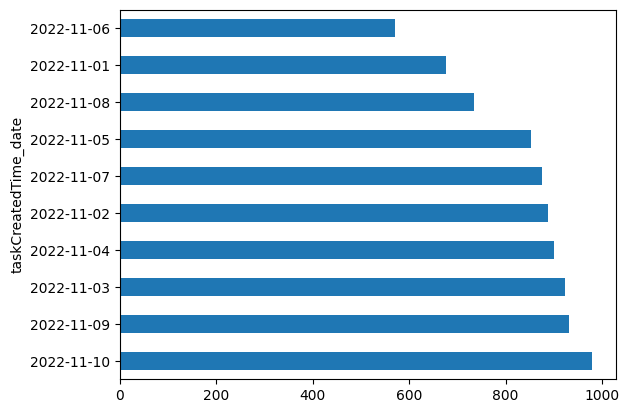

In [23]:
df['taskCreatedTime_date'].value_counts().plot.barh()

There is something fishy with the data on the 6th and 1st date. Let's take a closer look

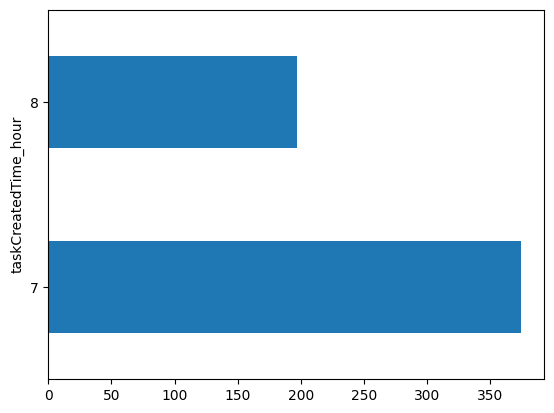

In [24]:
df[df['taskCreatedTime_date'] == datetime.date(2022, 11, 6)]['taskCreatedTime_hour'].value_counts().plot.barh()
plt.show()

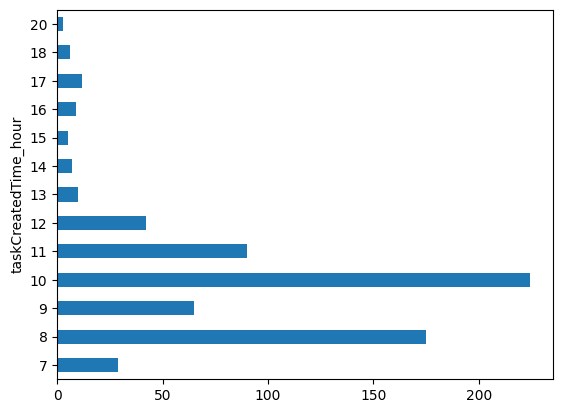

In [25]:
df[df['taskCreatedTime_date'] == datetime.date(2022, 11, 1)]['taskCreatedTime_hour'].value_counts().sort_index().plot.barh()
plt.show()

We found out that on `2022-11-06`, orders were only made between 7 am to 9 am, and probably causing the number of orders dropped significantly. Is it possible that our system was having an error during the day? There is some probability. Unfortunately, we cannot validate the hypothesis since we don't have data from another week and it can happen due to weekly seasonal trend of our orders.

Having said so, let's check for other days.

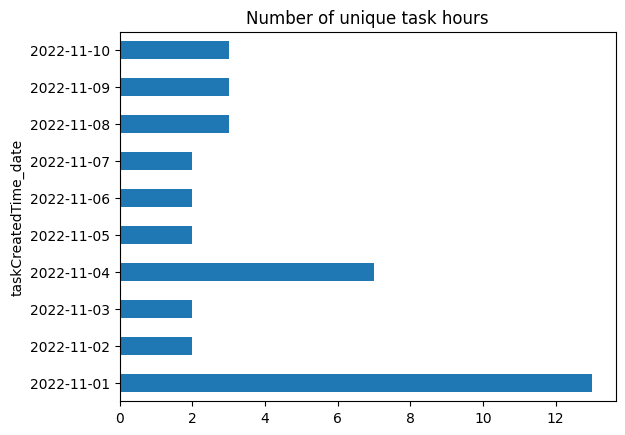

In [26]:
df.groupby('taskCreatedTime_date')['taskCreatedTime_hour'].nunique().plot.barh()
plt.title('Number of unique task hours')
plt.show()

Curiously, the number of unique hours of tasks doesn't really correlate well with the number of tasks. We can see that on `2022-11-01` the unique hours are high but the number of tasks are low. We can illustrate it further by a scatter plot.

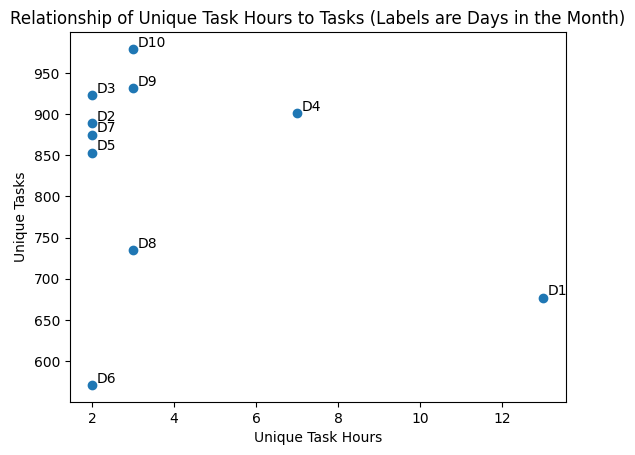

In [27]:
def plot_unique_hours_scatter(df):
    x = df.groupby('taskCreatedTime_day')['taskCreatedTime_hour'].nunique()
    y = df['taskCreatedTime_day'].value_counts()
    df_temp = pd.merge(x, y, left_index=True, right_index=True)
    plt.scatter(df_temp['taskCreatedTime_hour'], df_temp['count'])
    for idx, row in df_temp.iterrows():
        plt.text(row['taskCreatedTime_hour']+0.1, row['count']+3, 'D'+str(idx))
    plt.title('Relationship of Unique Task Hours to Tasks (Labels are Days in the Month)')
    plt.xlabel('Unique Task Hours')
    plt.ylabel('Unique Tasks')
    plt.show()

plot_unique_hours_scatter(df)

### 4. Checking Undone Tasks

Let's assume that undone tasks are tasks with null `taskCompletedTime`. We are going to explore the data first and will later check if there are any other possibilities.

In [28]:
df['is_undone'] = df['taskCompletedTime'].apply(lambda x: 1 if x != x else 0)
df[ df['taskCompletedTime'].isna() ].head()

taskCreatedTime taskAssignedTo taskCompletedTime taskStatus  \
550 2022-11-01 15:04:06+07:00  mildCardinal0               NaN       done   
551 2022-11-01 16:59:58+07:00  mildCardinal0               NaN       done   
552 2022-11-01 16:59:58+07:00  mildCardinal0               NaN       done   
553 2022-11-01 16:59:58+07:00  mildCardinal0               NaN       done   
554 2022-11-01 10:13:02+07:00  mildCardinal0               NaN       done   

         flow                taskId  taskLocationDone.lon  \
550  Delivery  9779ae5b5f88ba0bf31c                   NaN   
551  Delivery  8ade827b1e3530c02e82                   NaN   
552  Delivery  292b1e9f73099dac1209                   NaN   
553  Delivery  7e8862b3f4010465f006                   NaN   
554  Delivery  a4fb8aed363abc3d6af3                   NaN   

     taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
550                   NaN         NaN          NaN                 BKI   
551                   NaN         NaN          NaN                 BKI   
552                   NaN         NaN          NaN                 BKI   
553                   NaN         NaN          NaN                 BKI   
554                   NaN         NaN          NaN                 BKI   

    UserVar.taskStatusLabel UserVar.receiver_city  \
550                 Success      BABELAN,CIKARANG   
551                 Success      BABELAN,CIKARANG   
552                 Success      BABELAN,CIKARANG   
553                 Success      BABELAN,CIKARANG   
554                 Success      BABELAN,CIKARANG   

    UserVar.taskDetailStatusLabel UserVar.taskDetailStatus  UserVar.weight  \
550             YANG BERSANGKUTAN                      D01             3.0   
551             YANG BERSANGKUTAN                      D01             4.9   
552             YANG BERSANGKUTAN                      D01             8.0   
553             YANG BERSANGKUTAN                      D01            17.0   
554             YANG BERSANGKUTAN                      D01             1.0   

    UserVar.branch_origin UserVar.taskStatus  is_latlon_missing  \
550                   CGK             COLF01                  0   
551                   CGK             COLF01                  0   
552                   CGK             COLF01                  0   
553                   BDO             COLF01                  0   
554                   CGK             COLF01                  0   

     is_weight_zero taskCreatedTime_date  taskCreatedTime_day  \
550               0           2022-11-01                    1   
551               0           2022-11-01                    1   
552               0           2022-11-01                    1   
553               0           2022-11-01                    1   
554               0           2022-11-01                    1   

     taskCreatedTime_dayofweek  taskCreatedTime_hour  is_undone  
550                          1                    15          1  
551                          1                    16          1  
552                          1                    16          1  
553                          1                    16          1  
554                          1                    10          1

In [29]:
def plot_pct_undone_bar(df):
    df = df.copy()
    df_plot = df.groupby('taskCreatedTime_date')['is_undone'].agg(['sum', 'count'])
    df_plot['pct_undone'] = df_plot['sum']/df_plot['count']
    df_plot['pct_undone'].sort_index().plot.barh()
    plt.title('Percent of Undone Tasks by Date')
    plt.show()

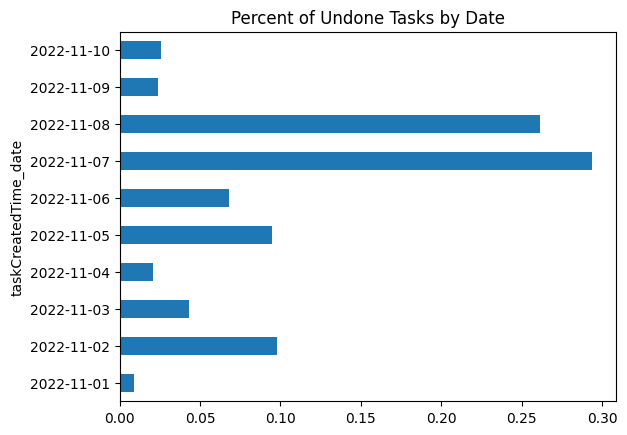

In [30]:
plot_pct_undone_bar(df)

Once again, I am flabbergasted by the result of the plot. The percentage of undone tasks are not concentrated in the last days of the data.

### 5. Checking Rush Hours of Origin Branches

Knowing the rush hour of a branch can help us to prepare the resources. Let's take a look at how many tasks are created in every hour. But first, we need to check the origin branches.

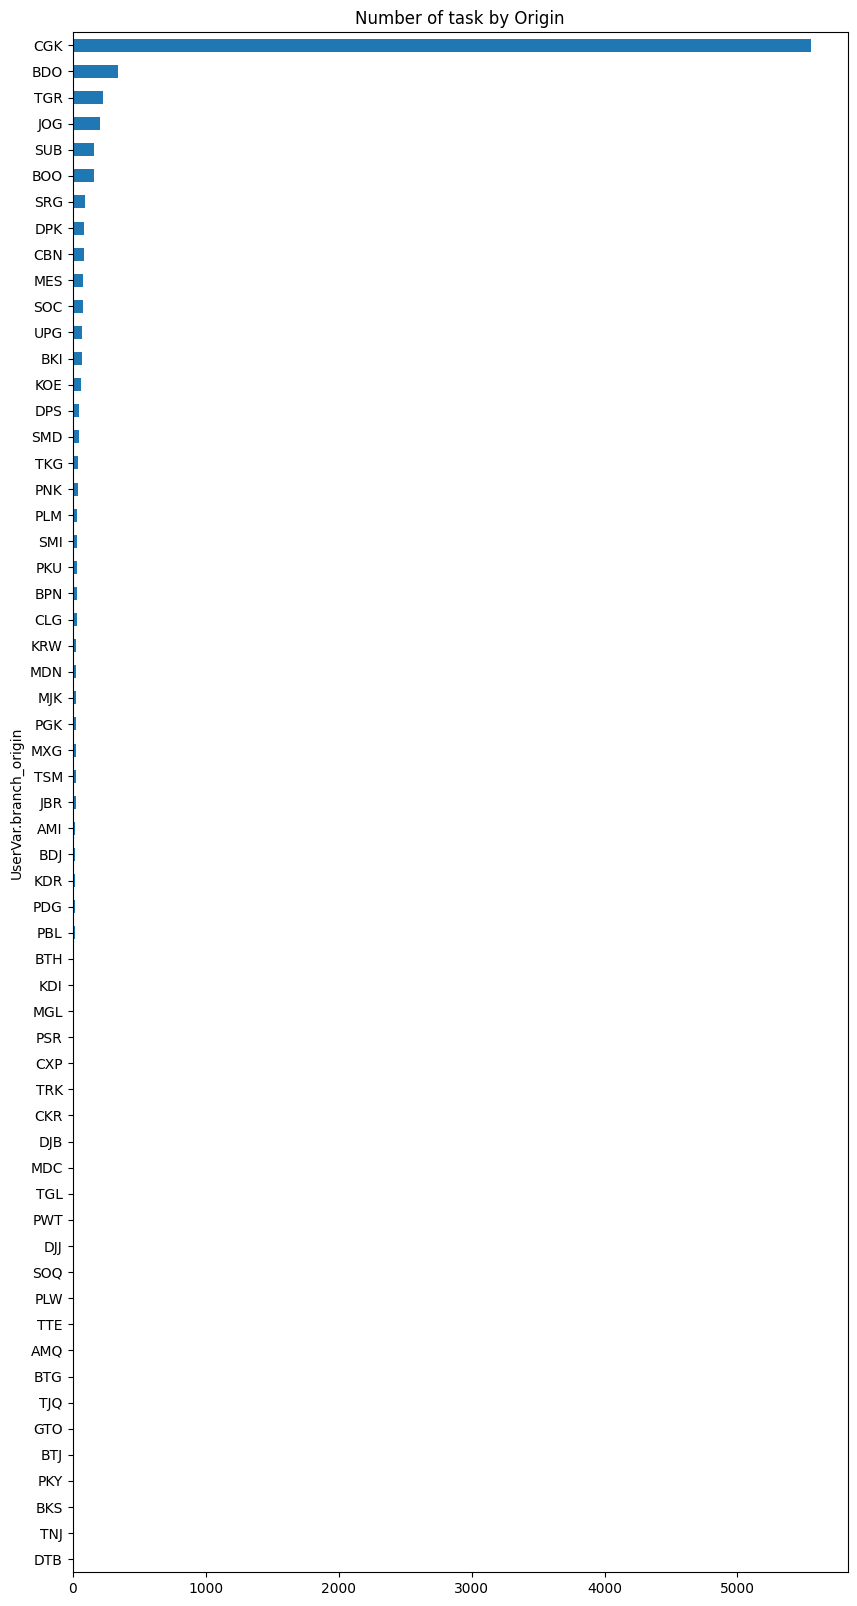

In [31]:
df['UserVar.branch_origin'].value_counts().sort_values().plot.barh(figsize=(10, 20))
plt.title('Number of task by Origin')
plt.show()

Let's take a look at the normalized version to get the sense of proportion

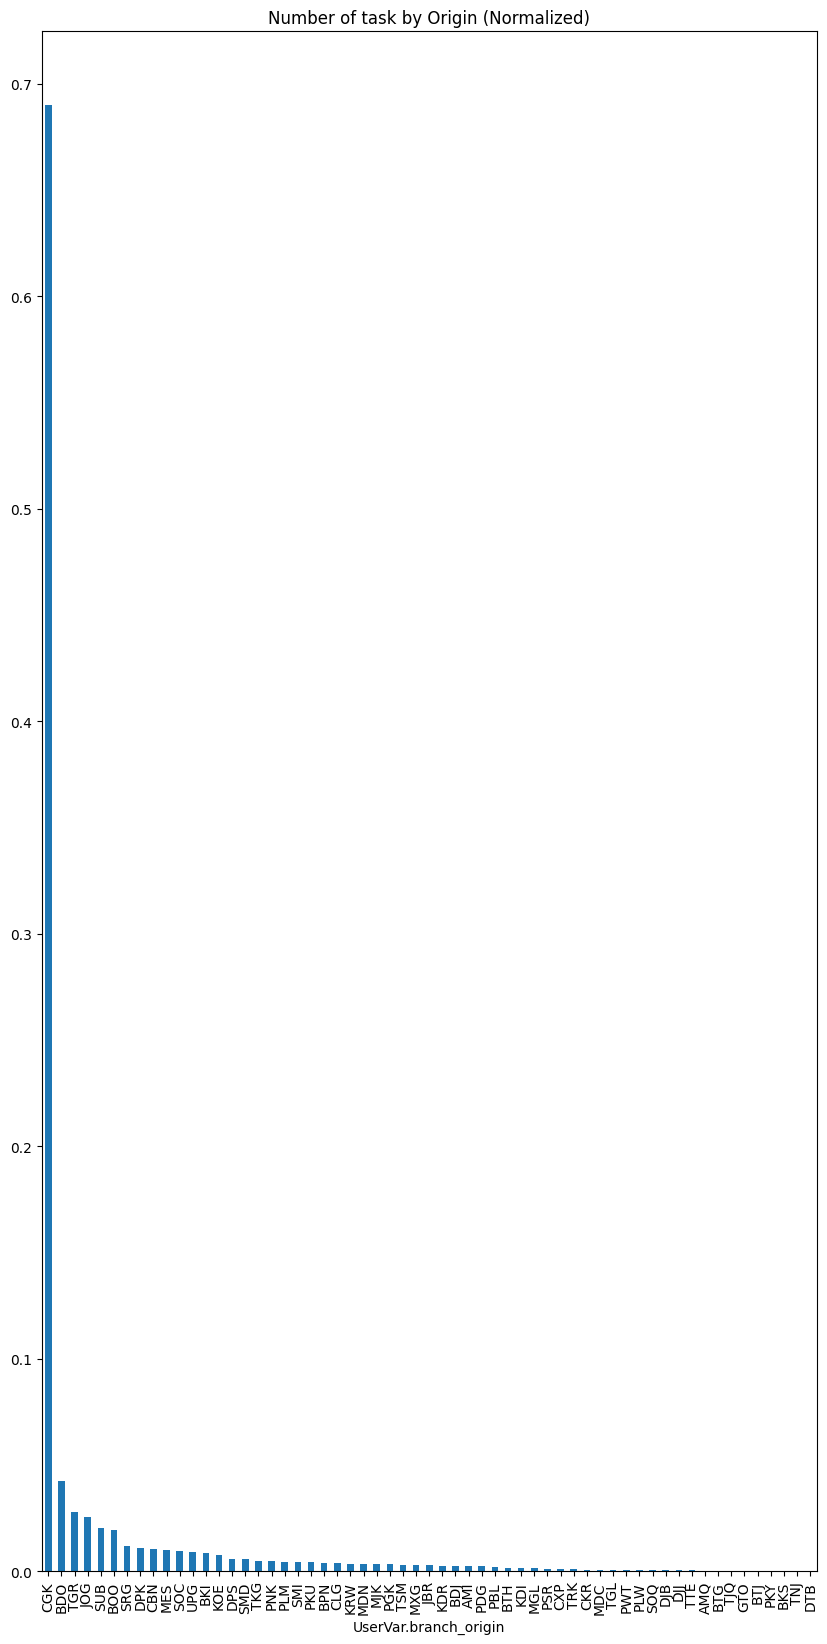

In [32]:
df['UserVar.branch_origin'].value_counts(normalize=True).sort_values(ascending=False).plot.bar(figsize=(10, 20))
plt.title('Number of task by Origin (Normalized)')
plt.show()

We can see that the number of branch origin are concentrated in CGK since the second in place (BDO) are less than 5% of our tasks. We will take a deeper look into it

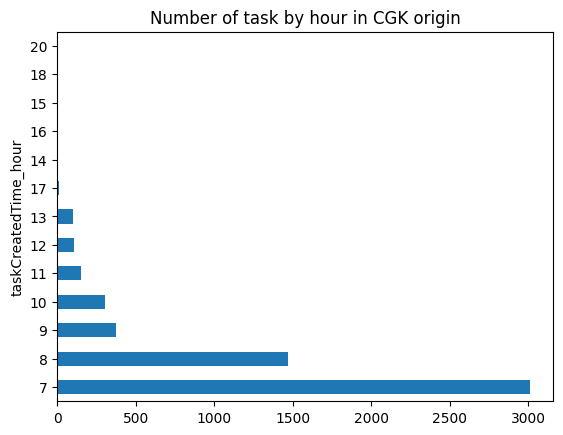

In [33]:
df[ df['UserVar.branch_origin'] == 'CGK' ]['taskCreatedTime_hour'].value_counts().plot.barh()
plt.title('Number of task by hour in CGK origin')
plt.show()

From efficiency perspective, it is better reduce workers or even close our branch after 2 pm since our rush hours are between 7 am to 9 am. On the other hand, we can try to open our branch earlier than 7 am (probably to 6 am) to reduce the concentrated workload at 7 am. It is possible that our customers' satisfaction will decline if our workers are too busy with the stream of tasks.

### 6. Assignee and its relation with Branches and Productivity

In [34]:
df['taskAssignedTo'].value_counts()

taskAssignedTo
gutturalLion9     103
gloomyLlama0       83
zestyPear3         64
emptyIcecream6     57
artisticHyena7     56
                 ... 
emptyAntelope3      1
finickyCoati6       1
thriftyLion5        1
somberHeron8        1
murkyThrushe3       1
Name: count, Length: 2787, dtype: int64

We cannot make any definitive judgement about the data because we don't really know what being assigned really mean. However, it is quite weird that some employee are assigned with so many tasks while some receive none.

We can also measure the productivity by checking the error rate (# failed tasks / # of tasks) of a worker

In [35]:
df['UserVar.taskStatusLabel'].value_counts()

UserVar.taskStatusLabel
Success    5427
Failed     2145
Name: count, dtype: int64

In [36]:
def count_error_rate(df):
    df = df.copy()
    df['is_failed'] = df['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Failed' else 0)
    df = df.groupby('taskAssignedTo').agg({'is_failed': 'sum', 'taskId': 'count'})
    df['error_rate'] = df['is_failed']/df['taskId']
    return df[ df['error_rate'] > 0 ].sort_values(['error_rate', 'taskId'], ascending=[False, False])
count_error_rate(df)

is_failed  taskId  error_rate
taskAssignedTo                                
gutturalLion9          103     103    1.000000
gloomyLlama0            83      83    1.000000
artisticHyena7          56      56    1.000000
scornfulOcelot0         42      42    1.000000
drearyPepper9           35      35    1.000000
...                    ...     ...         ...
emptyCow4                1      20    0.050000
mereLocust3              1      20    0.050000
relievedCur9             1      20    0.050000
importedStork6           1      25    0.040000
zestyPear3               1      64    0.015625

[710 rows x 3 columns]

There is something fishy going on here. There are workers with 100% error rate. We need to train and evaluate all the worker more strictly or even lay off these workers if there is an indication of cheating.

Let's check by how many branch destinations are served by a worker.

In [37]:
df.groupby('taskAssignedTo')['UserVar.branch_dest'].nunique().sort_values(ascending=False)

taskAssignedTo
jumpyGelding4        2
similarTomatoe6      2
gloomyMussel3        2
humorousMandrill0    2
amazedSalami5        2
                    ..
enviousSeagull0      1
enviousSheep9        1
enviousUnicorn8      1
enviousViper9        1
zestyWidgeon1        1
Name: UserVar.branch_dest, Length: 2787, dtype: int64

When we take a look from branch destination perspective, it makes much more sense. Though it is still weird that there are workers who are working for more than one branch destination.

We can also measure the productivity of a destination branch by checking the number of task divided by the number of workers in the branch. We are going to plot the success rate on x-axis and (#Tasks/#Workers) on y-axis.

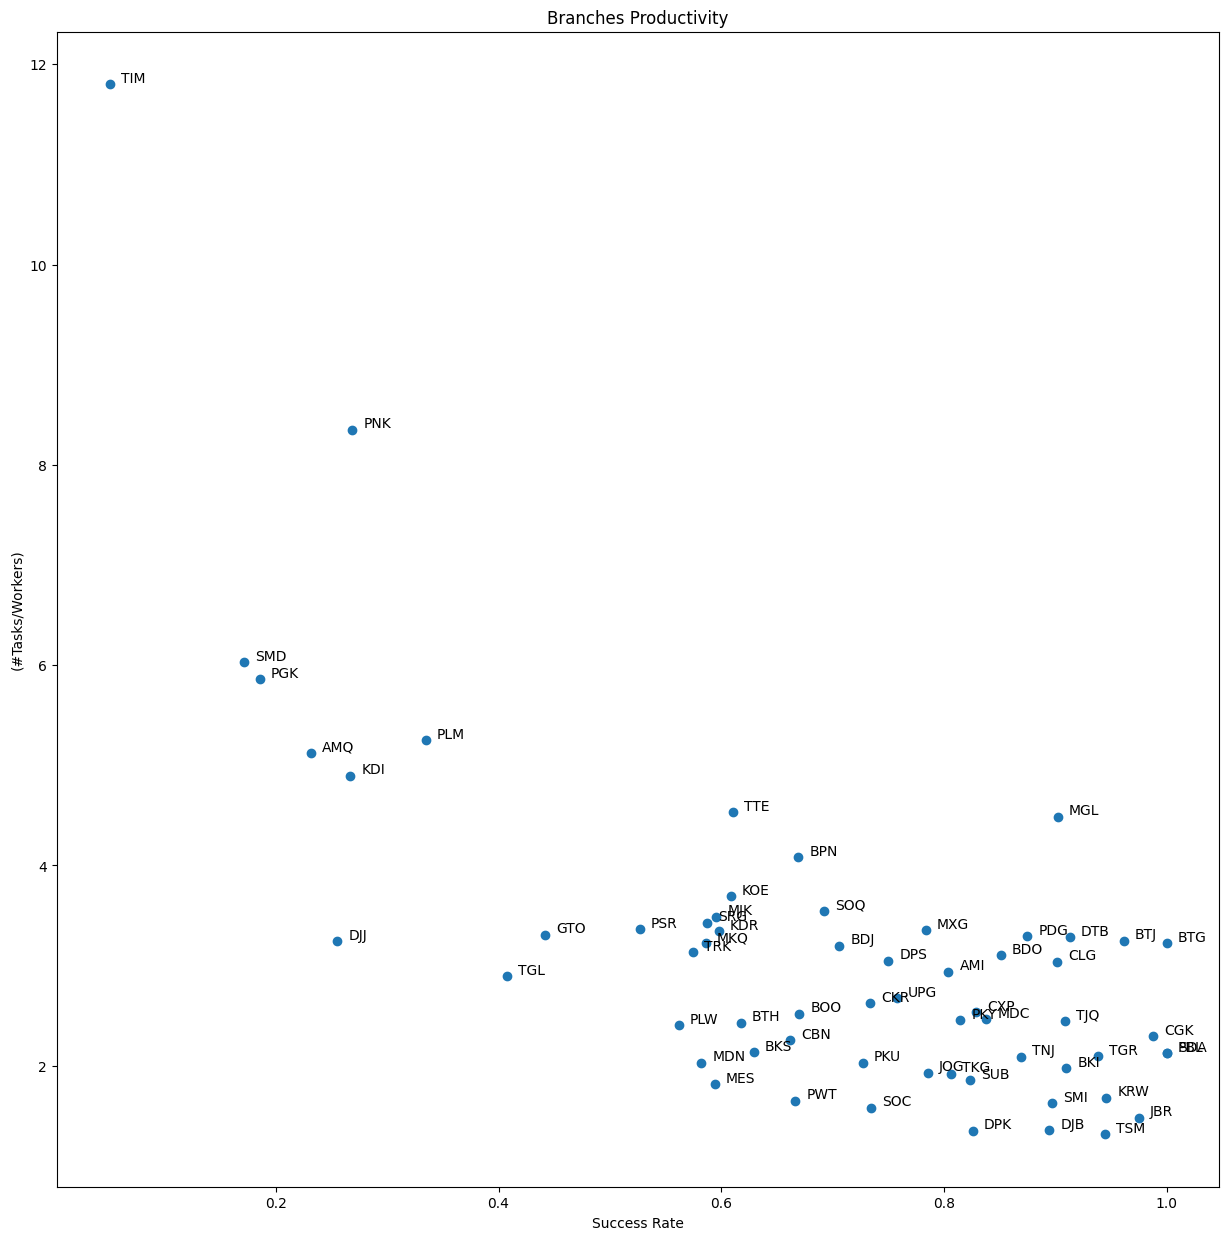

In [38]:
def plot_branch_productivity(df):
    df = df.copy()
    df['is_success'] = df['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Success' else 0)
    df = df.groupby('UserVar.branch_dest').agg({'is_success': 'sum', 'taskAssignedTo':'nunique', 'taskId': 'count'})
    df['success_rate'] = df['is_success']/df['taskId']
    df['worker_tasks'] = df['taskId']/df['taskAssignedTo']
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(df['success_rate'], df['worker_tasks'])
    for idx, row in df.iterrows():
        ax.text(row['success_rate']+0.01, row['worker_tasks']+0.02, str(idx), fontsize=10)
    ax.set_title('Branches Productivity')
    ax.set_xlabel('Success Rate')
    ax.set_ylabel('(#Tasks/Workers)')
    plt.show()
    return None
plot_branch_productivity(df)

We can see a clear correlation between number of tasks per worker and the success rate of a destination branch. This is certainly a valuable insight, we can do some manning optimization in rush hours (possibly with part-time workers) to keep our success rate above a predefined threshold

### 7. Investigate `UserVar.branch_dest` and `taskLocationDone` Relationship

We are going to check whether we can get useful information from `taskLocationDone` compared to other data. However, we need to map the branches first.

I downloaded data from [here](https://data.opendatasoft.com/explore/dataset/airports-code%40public/export/)

In [39]:
# import requests
# url = 'https://data.opendatasoft.com/api/explore/v2.1/catalog/datasets/airports-code@public/exports/json?lang=en&timezone=Asia%2FJakarta'
# r = requests.get(url, allow_redirects=True)
# open('airports-code@public.json', 'wb').write(r.content)

In [40]:
df_airports = pd.read_json('airports-code@public.json')
df_airports = df_airports.rename(columns={'column_1': 'IATA'})
df_airports = df_airports[['IATA', 'airport_name', 'city_name', 'country_name', 'latitude', 'longitude']]
df_airports

IATA       airport_name          city_name      country_name   latitude  \
0     YCB      Cambridge Bay      Cambridge Bay            Canada  69.116667   
1     YKD   Township Airport         Kincardine            Canada  44.201389   
2     UPF           Pforheim           Pforheim           Germany  48.900000   
3     IXB           Bagdogra           Bagdogra             India  26.733333   
4     IMK            Simikot            Simikot             Nepal  29.966667   
...   ...                ...                ...               ...        ...   
9182  HSL             Huslia             Huslia     United States  65.700000   
9183  KAQ            Kamulai            Kamulai  Papua New Guinea  -8.133333   
9184  APE  San Juan Aposento  San Juan Aposento              Peru -15.350000   
9185  ODB            Cordoba            Cordoba             Spain  37.850000   
9186  KCU            Masindi            Masindi            Uganda   1.683333   

       longitude  
0    -105.133333  
1     -81.606667  
2       8.700000  
3      88.333333  
4      81.833333  
...          ...  
9182 -156.416667  
9183  146.816667  
9184  -75.166667  
9185   -4.850000  
9186   31.716667  

[9187 rows x 6 columns]

In [41]:
set(df['UserVar.branch_origin'].unique()) - set(df_airports['IATA'].unique())

{'DTB', None, 'TSM'}

In [42]:
set(df['UserVar.branch_dest'].unique()) - set(df_airports['IATA'].unique())

{'DTB', 'TSM'}

Looks like we are still missing TSM (Taos Regional Airport, Taos, United States, (36.458056, -105.6725)) and DTB (Silangit International Airport, Siborong-Borong, Indonesia, (2.259722, 98.995278)). We'll add it manually.

In [43]:
df_airports_addition = pd.DataFrame(data={'IATA': ['DTB', 'TSM']
                                          , 'airport_name': ['Silangit International Airport', 'Taos Regional Airport']
                                          , 'city_name': ['Siborong-Borong', 'Taos']
                                          , 'country_name': ['Indonesia', 'United States']
                                          , 'latitude': [2.259722, 36.458056]
                                          , 'longitude': [98.995278, -105.6725]})
df_airports = pd.concat([df_airports, df_airports_addition]).reset_index(drop=True)

In [44]:
df = df.merge(df_airports, left_on='UserVar.branch_origin', right_on='IATA', how='left')
for col in df_airports.columns:
    df = df.rename(columns={col: 'org_'+col})
df = df.merge(df_airports, left_on='UserVar.branch_dest', right_on='IATA', how='left')
for col in df_airports.columns:
    df = df.rename(columns={col: 'dest_'+col})
df.head()

taskCreatedTime  taskAssignedTo          taskCompletedTime  \
0 2022-11-01 20:17:26+07:00   pacifiedLion0  2022-11-01 20:46:30 +0700   
1 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 12:33:48 +0700   
2 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 13:41:57 +0700   
3 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 18:18:19 +0700   
4 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 10:51:49 +0700   

  taskStatus      flow                taskId  taskLocationDone.lon  \
0       done  Delivery  4fe3b237c832ca4841a2            109.762910   
1       done  Delivery  08a4da25256affae8446            110.033986   
2       done  Delivery  2ff0dc469826158b7684            109.999733   
3       done  Delivery  331c172c2b383f774328            110.003708   
4       done  Delivery  a9d53fa96c80baee8b23            110.013887   

   taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
0             -6.926608    685000.0         True                 SRG   
1             -7.876154     53500.0         True                 MGL   
2             -7.849777    179500.0         True                 MGL   
3             -7.710998     31815.0         True                 MGL   
4             -7.829742    144562.0         True                 MGL   

  UserVar.taskStatusLabel UserVar.receiver_city UserVar.taskDetailStatusLabel  \
0                 Success    BATANG ,KAB BATANG             YANG BERSANGKUTAN   
1                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
2                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
3                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
4                 Success     BAGELEN,PURWOREJO             YANG BERSANGKUTAN   

  UserVar.taskDetailStatus  UserVar.weight UserVar.branch_origin  \
0                      D01          13.000                   CGK   
1                      D01           1.300                   CGK   
2                      D01           3.000                   CGK   
3                      D01           0.625                   CGK   
4                      D01           3.000                   CGK   

  UserVar.taskStatus  is_latlon_missing  is_weight_zero taskCreatedTime_date  \
0             COLF01                  0               0           2022-11-01   
1             COLF01                  0               0           2022-11-01   
2             COLF01                  0               0           2022-11-01   
3             COLF01                  0               0           2022-11-01   
4             COLF01                  0               0           2022-11-01   

   taskCreatedTime_day  taskCreatedTime_dayofweek  taskCreatedTime_hour  \
0                    1                          1                    20   
1                    1                          1                     8   
2                    1                          1                     8   
3                    1                          1                     8   
4                    1                          1                     8   

   is_undone org_IATA              org_airport_name org_city_name  \
0          0      CGK  Soekarno-Hatta International       Jakarta   
1          0      CGK  Soekarno-Hatta International       Jakarta   
2          0      CGK  Soekarno-Hatta International       Jakarta   
3          0      CGK  Soekarno-Hatta International       Jakarta   
4          0      CGK  Soekarno-Hatta International       Jakarta   

  org_country_name  org_latitude  org_longitude dest_IATA  \
0        Indonesia     -6.125556     106.655833       SRG   
1        Indonesia     -6.125556     106.655833       MGL   
2        Indonesia     -6.125556     106.655833       MGL   
3        Indonesia     -6.125556     106.655833       MGL   
4        Indonesia     -6.125556     106.655833       MGL   

        dest_airport_name    dest_city_name dest_country_name  dest_latitude  \
0             Achmad Ya

Once we mapped the branches, we can analyze the branch code. We found that there are some destinations not in Indonesia. We are going to investigate it first, starting from MGL `UserVar.branch_dest`. Let's check by mean coordinate of the branch destination from `taskLocationDone.lon` and `taskLocationDone.lat`.

In [45]:
# need to take account of 0.0 latitude and longitude from previous findings
df[ (df['taskLocationDone.lon'] != 0.0) & (df['UserVar.branch_dest'] == 'MGL') ].groupby('UserVar.branch_dest').agg({'taskLocationDone.lat': 'mean', 'taskLocationDone.lon': 'mean'})

taskLocationDone.lat  taskLocationDone.lon
UserVar.branch_dest                                            
MGL                             -7.593749            109.995766

We can see that the coordinate is still in Indonesia which spans from `6 degrees North latitude to 11 degrees south latitude and between 95 degrees east longitude to 141 degrees east longitude` according to this [source](https://www.roc-taiwan.org/id_en/post/1196.html#:~:text=Indonesia%20is%20located%20at%206,to%20141%20degrees%20east%20longitude.)

Let's check for other similar cases. That is, branch destinations outside Indonesia

In [46]:
# need to take account of 0.0 latitude and longitude from previous findings
df[ (df['taskLocationDone.lon'] != 0.0) & (df['dest_country_name'] != 'Indonesia') ].groupby(['UserVar.branch_dest', 'dest_country_name']).agg({'taskLocationDone.lat': 'mean', 'taskLocationDone.lon': 'mean'})

taskLocationDone.lat  \
UserVar.branch_dest dest_country_name                                
BKI                 Malaysia                             -6.257998   
BOO                 Norway                               -6.539132   
BTG                 Central African Republic              0.621672   
CKR                 United States                        -6.289559   
CLG                 United States                        -6.215132   
DPK                 United States                        -6.389429   
JBR                 United States                        -8.282532   
KDR                 Papua New Guinea                     -7.848294   
KRW                 Turkmenistan                         -6.352657   
MDN                 United States                        -7.876816   
MGL                 Germany                              -7.593749   
MJK                 Australia                            -7.561997   
MXG                 United States                        -7.991155   
PBL                 Venezuela                            -7.807972   
PSR                 Italy                                -7.656033   
PWT                 United States                        -6.521506   
SDA                 Iraq                                 -7.413519   
SMD                 United States                        -0.479453   
SMI                 Greece                               -6.962890   
TGL                 Papua New Guinea                     -7.219502   
TGR                 Algeria                              -6.233848   
TSM                 United States                        -7.407026   

                                              taskLocationDone.lon  
UserVar.branch_dest dest_country_name                               
BKI                 Malaysia                            106.987644  
BOO                 Norway                              106.807412  
BTG                 Central African Republic            117.217093  
CKR                 United States                       107.126174  
CLG                 United States                       106.164723  
DPK                 United States                       106.792129  
JBR                 United States                       113.997494  
KDR                 Papua New Guinea                    112.069670  
KRW                 Turkmenistan                        107.343386  
MDN                 United States                       111.399276  
MGL                 Germany                             109.995766  
MJK                 Australia                           112.094438  
MXG                 United States                       112.532523  
PBL                 Venezuela                           113.498322  
PSR                 Italy                               112.872685  
PWT                 United States                       107.683394  
SDA                 Iraq                                112.677849  
SMD                 United States                       117.044772  
SMI                 Greece                              106.788107  
TGL                 Papua New Guinea                    109.188607  
TGR                 Algeria                             106.629480  
TSM                 United States                       108.317748

It's interesting that those coordinates are in Indonesia. We are going to check the closest airports from those locations to our downloaded data

In [48]:
!pip install geopy

You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.


In [47]:
import geopy.distance

In [48]:
# need to take account of 0.0 latitude and longitude from previous findings
# https://stackoverflow.com/questions/1253499/simple-calculations-for-working-with-lat-lon-and-km-distance
# Latitude: 1 deg = 110.574 km
# Longitude: 1 deg = 111.320*cos(latitude) km
def check_nearest_airport(df, df_airports):
    df = df.copy()
    df_dest_not_ina = df[ (df['taskLocationDone.lon'] != 0.0) & (df['dest_country_name'] != 'Indonesia') ].groupby(['UserVar.branch_dest', 'dest_country_name']).agg({'taskLocationDone.lat': 'mean', 'taskLocationDone.lon': 'mean'}).reset_index()
    df_dest_not_ina = df_dest_not_ina.merge(df_airports, how='cross')
    df_dest_not_ina = df_dest_not_ina[ # pre-filter to reduce the cost of calculation
        ((df_dest_not_ina['taskLocationDone.lon']-df_dest_not_ina['longitude']).between(-5,5))
        & ((df_dest_not_ina['taskLocationDone.lat']-df_dest_not_ina['latitude']).between(-5,5))
    ]
    df_dest_not_ina['distance_km'] = df_dest_not_ina.apply(lambda x: geopy.distance.distance((x['taskLocationDone.lat'], x['taskLocationDone.lon']), (x['latitude'], x['longitude'])).km, axis=1)
    df_dest_not_ina['rn'] = df_dest_not_ina.sort_values('distance_km').groupby('UserVar.branch_dest').cumcount()
    df_dest_not_ina = df_dest_not_ina[df_dest_not_ina['rn'] == 0]
    return df_dest_not_ina[['UserVar.branch_dest', 'taskLocationDone.lat','taskLocationDone.lon', 'IATA', 'airport_name', 'city_name', 'latitude', 'longitude', 'distance_km']]

In [49]:
check_nearest_airport(df, df_airports)


UserVar.branch_dest  taskLocationDone.lat  taskLocationDone.lon IATA  \
7357                   BKI             -6.257998            106.987644  HLP   
17273                  BOO             -6.539132            106.807412  PCB   
19616                  BTG              0.621672            117.217093  SGQ   
34924                  CKR             -6.289559            107.126174  HLP   
40874                  CLG             -6.215132            106.164723  CGK   
54029                  DPK             -6.389429            106.792129  PCB   
63882                  JBR             -8.282532            113.997494  SUP   
65032                  KDR             -7.848294            112.069670  MLG   
80869                  KRW             -6.352657            107.343386  HLP   
86012                  MDN             -7.876816            111.399276  CPF   
92584                  MGL             -7.593749            109.995766  JOG   
104390                 MJK             -7.561997            112.094438  CPF   
110977                 MXG             -7.991155            112.532523  MLG   
120166                 PBL             -7.807972            113.498322  MLG   
128766                 PSR             -7.656033            112.872685  SUB   
141079                 PWT             -6.521506            107.683394  BDO   
147144                 SDA             -7.413519            112.677849  SUB   
160529                 SMD             -0.479453            117.044772  SRI   
173486                 SMI             -6.962890            106.788107  PCB   
183456                 TGL             -7.219502            109.188607  CBN   
187898                 TGR             -6.233848            106.629480  CGK   
201834                 TSM             -7.407026            108.317748  CBN   

                        airport_name   city_name  latitude   longitude  \
7357            Halim Perdana Kusuma     Jakarta -6.266667  106.883333   
17273                    Pondok Cabe     Jakarta -6.336944  106.764444   
19616                       Sanggata    Sanggata  0.500000  117.333333   
34924           Halim Perdana Kusuma     Jakarta -6.266667  106.883333   
40874   Soekarno-Hatta International     Jakarta -6.125556  106.655833   
54029                    Pondok Cabe     Jakarta -6.336944  106.764444   
63882                      Trunojoyo     Sumenep -7.066667  113.933333   
65032             Abdul Rahman Saleh      Malang -7.926667  112.708889   
80869           Halim Perdana Kusuma     Jakarta -6.266667  106.883333   
86012                           Cepu        Cepu -7.183333  111.533333   
92584                    Adisutjipto  Yogyakarta -7.783333  110.433333   
104390                          Cepu        Cepu -7.183333  111.533333   
110977            Abdul Rahman Saleh      Malang -7.926667  112.708889   
120166            Abdul Rahman Saleh      Malang -7.926667  112.708889   
128766                        Juanda    Surabaya -7.379722  112.786944   
141079           Husein Sastranegara     Bandung -6.900556  107.576389   
147144                        Juanda    Surabaya -7.379722  112.786944   
160529                     Samarinda   Samarinda -0.500000  117.150000   
173486                   Pondok Cabe     Jakarta -6.336944  106.764444   
183456                      Penggung     Cirebon -6.750000  108.533333   
187898  Soekarno-Hatta International     Jakarta -6.125556  106.655833   
201834                      Penggung     Cirebon -6.750000  108.533333   

        distance_km  
7357      11.582721  
17273     22.859288  
19616     18.666199  
34924     26.990901  
40874     55.250740  
54029      6.562862  
63882    134.653735  
65032     71.019647  
80869     51.785310  
86012     78.108650  
92584     52.631326  
104390    74.775539  
110977    20.711798  
120166    88.041710  
128766    31.989813  
141079    43.556434  
147144    12.610672  
160529    11.931821  
173486    69.272327  
183456    89.099325  
187898    12.325785  
20

From this analysis, we found the nearest airports that can substitute weird branch destinations if we want to.

### 8. Investigate Failed Statuses and Its Relationship with Other Columns

In [50]:
df[df['UserVar.taskStatusLabel'] == 'Failed']['UserVar.taskDetailStatusLabel'].value_counts()

UserVar.taskDetailStatusLabel
MISROUTE                                             763
ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL          322
RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)          304
NEW ADDRESS                                          247
DIAMBIL SENDIRI                                      100
TUTUP PADA AKHIR PEKAN service/ HARI LIBUR            70
PENERIMA TIDAK DIKENAL                                64
DITOLAK OLEH PENERIMA                                 52
PENERIMA MENOLAK BAYAR (KIRIMAN COD)                  48
PENERIMA PINDAH ALAMAT                                45
FORCE MAJEURE                                         42
MENUNGGU PEMBAYARAN COD                               27
HOLD FOR FURTHER INSTRUCTI0N                          24
PENERIMA MENOLAK MENERIMA KIRIMAN COD (TDK PESAN)     17
TUTUP/LIBUR CUTI/DINAS LUAR KOTA (KIRIMAN COD)        13
RUMAH service/ KANTOR TIDAK DIHUNI                     3
MENUNGGU KONFIRMASI NILAI COD                          2
C

Since we found that `MISROUTE` is the most prominent reason for error, we need to take a closer look. Misroute is closely related to spatial data. Therefore, we are going to analyze from the branch destinations.

In [51]:
df[ df['UserVar.taskDetailStatusLabel'] == 'MISROUTE' ][['dest_IATA', 'dest_airport_name', 'dest_city_name', 'dest_country_name']].value_counts()

dest_IATA  dest_airport_name         dest_city_name    dest_country_name
PLM        Mahmud Badaruddin Ii      Palembang         Indonesia            262
PGK        Pangkalpinang             Pangkalpinang     Indonesia             92
SRG        Achmad Yani               Semarang          Indonesia             77
BOO        Bodo                      Bodo              Norway                67
MJK        Shark Bay                 Monkey Mia        Australia             55
DPS        Ngurah Rai International  Denpasar, Bali    Indonesia             37
CKR        Crane Island              Crane Island      United States         17
SMD        Smith Field               Fort Wayne, IN    United States         17
BDO        Husein Sastranegara       Bandung           Indonesia             13
CXP        Tunggul Wulung            Cilacap           Indonesia             12
CBN        Penggung                  Cirebon           Indonesia             12
SOC        Adi Sumarmo               Solo City 

I would have expected that misroutes will be closely related to weird branches we found earlier. However, let's check for another relationship.

First, we are going to check for the misroute compared to all tasks and all failures to get a better sense of what is going on.

In [52]:
def check_misroute(df):
    df = df.copy()
    df['is_misroute'] = df['UserVar.taskDetailStatusLabel'].apply(lambda x: 1 if x == 'MISROUTE' else 0)
    df['is_failed'] = df['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Failed' else 0)
    return df.groupby('dest_city_name').agg({'taskId': 'count', 'is_failed': 'sum', 'is_misroute': 'sum'}).sort_values('is_failed', ascending=False)

In [53]:
check_misroute(df).head(20)

taskId  is_failed  is_misroute
dest_city_name                                
Palembang          562        307          262
Pontianak          309        226            0
Semarang           480        197           77
Pangkalpinang      205        127           92
Kupang             432        105            2
Bodo               403         95           67
Fort Wayne, IN     187         85           17
Balikpapan         245         78            1
Kendari            191         71            1
Monkey Mia         178         70           55
Denpasar, Bali     244         59           37
Cirebon            201         52           12
Surabaya           221         39            7
Marlborough        171         37           10
Mataram            194         37            4
Pekanbaru          132         36            7
Pescara             74         34            4
Madison             67         28            5
Bandung            450         28           13
Palu                89         27           10

We found many interesting insights here:
1. More than 50% of tasks in Palembang and Pangkalpinang failed, while the errors are dominated by misroutes. If we can solve this error, we can increase our success rate significantly
2. Pontianak, Kupang, Balikpapan and Kendari will need a different treatment later on. Their error rates are high, though most of the errors are not caused by misroutes
3. Bodo and Monkey Mia are prone to misroutes, probably because the operators catched the wrong message from the branch destinations, as we showed earlier. BOO and MJK can mean Bodo (located in Norway) and MJK can mean Monkey Mia (located in Australia)

We are going to analyze Palembang case. However, we must not forget our previous analysis about indication of incompetent/cheating workers. We need to check whether all the errors are distributed evenly across all workers.

In [54]:
def errors_city_by_workers(df, dest_city_name):
    df = df.copy()
    df = df[ df['dest_city_name'] == dest_city_name ]
    df['is_failed'] = df['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Failed' else 0)
    df = df.groupby('taskAssignedTo').agg({'is_failed': 'sum', 'taskId': 'count'})
    df['error_rate'] = df['is_failed']/df['taskId']
    return df.sort_values(['error_rate', 'taskId'], ascending=[False, False])

errors_city_by_workers(df, 'Palembang').head(30)

is_failed  taskId  error_rate
taskAssignedTo                                  
artisticHyena7            56      56    1.000000
drearyPepper9             35      35    1.000000
alertEggs8                 9       9    1.000000
kindHoopoe5                7       7    1.000000
amazedSwift1               4       4    1.000000
grizzledRhino1             3       3    1.000000
similarToucan7             3       3    1.000000
sorePear2                  3       3    1.000000
grizzledCheese5            2       2    1.000000
holisticFalcon3            2       2    1.000000
madLocust5                 2       2    1.000000
spiritedCardinal2          2       2    1.000000
abjectWidgeon1             1       1    1.000000
adoringTermite0            1       1    1.000000
anxiousCheese0             1       1    1.000000
debonairWasp3              1       1    1.000000
holisticAbalone7           1       1    1.000000
puzzledHare0               1       1    1.000000
scornfulCrackers9          1       1    1.000000
wearyHawk4                 1       1    1.000000
worriedGranola1            1       1    1.000000
yearningFish3              1       1    1.000000
yearningThrush0            1       1    1.000000
zestyWidgeon1              1       1    1.000000
mellowDoughnut1           49      50    0.980000
mellowEggs0               27      28    0.964286
hushedToucan5             23      24    0.958333
amazedPlover0             14      15    0.933333
drearyWildfowl7            6       8    0.750000
jumpyGelding4              5       7    0.714286

First, this is fishy because we found that the tasks are not evenly distributed across all workers in the branch. Next, we found that the workers with error rates more than 50 percent are certainly dragging our company down. Error rates are too sensitive for workers with fewer tasks, but at least we can see that some workers are counterproductive.

**The indication of cheating is too high for these workers.**

Having said so, let's check if there are productive workers in Palembang

In [55]:
errors_city_by_workers(df, 'Palembang').sort_values(['taskId', 'error_rate'], ascending=[False, True]).head(30)

is_failed  taskId  error_rate
taskAssignedTo                                  
artisticHyena7            56      56    1.000000
mellowDoughnut1           49      50    0.980000
drearyPepper9             35      35    1.000000
ashamedHare6              14      33    0.424242
mellowEggs0               27      28    0.964286
hushedToucan5             23      24    0.958333
excludedGnu7               0      22    0.000000
shySalt2                   0      21    0.000000
emptyCow4                  1      20    0.050000
amazedPlover0             14      15    0.933333
relievedBaboon4            8      12    0.666667
empathicBuzzard1           6      11    0.545455
guiltyDingo5               0      10    0.000000
trustingChamois6           0      10    0.000000
alertEggs8                 9       9    1.000000
joyfulSeafowl1             0       8    0.000000
worriedMandrill5           3       8    0.375000
peskyEggs4                 4       8    0.500000
drearyWildfowl7            6       8    0.750000
jumpyGelding4              5       7    0.714286
kindHoopoe5                7       7    1.000000
contentTacos2              0       5    0.000000
eagerThrush5               0       5    0.000000
finickyWidgeon9            0       5    0.000000
gloomyThrush3              1       5    0.200000
gutturalLapwing4           0       4    0.000000
holisticLocust7            0       4    0.000000
peskyBasmati2              0       4    0.000000
sheepishCrackers4          0       4    0.000000
vengefulSalt6              1       4    0.250000

We found that there are still competent workers like `excludedGnu7`, `shySalt2`, and `emptyCow4`. We need to reward these workers to encourage all other workers to become more productive.

We can continue this analysis to every branches. If the error rate is distributed evenly, we can check if the problem is real.

Let's check Pontianak failed reason.

In [56]:
df[(df['UserVar.taskStatusLabel'] == 'Failed') & (df['dest_city_name'] == 'Pontianak')]['UserVar.taskDetailStatusLabel'].value_counts()

UserVar.taskDetailStatusLabel
NEW ADDRESS                                          186
PENERIMA PINDAH ALAMAT                                21
ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL           10
PENERIMA MENOLAK BAYAR (KIRIMAN COD)                   4
DIAMBIL SENDIRI                                        3
MENUNGGU PEMBAYARAN COD                                1
PENERIMA MENOLAK MENERIMA KIRIMAN COD (TDK PESAN)      1
Name: count, dtype: int64

There are some things to comment here:
1. The error reason `NEW ADDRESS` and `PENERIMA PINDAH ALAMAT` means the same thing, no? Maybe we need to classfy the errors more carefully to make sure there are no overlap
2. The proportion of the error are very concerning, it is hard to imagine that 90% of errors are caused by inaccurate addresses. I suspect that there are also cheating indication in this branch

In [57]:
errors_city_by_workers(df, 'Pontianak').head(30)

is_failed  taskId  error_rate
taskAssignedTo                                  
gutturalLion9            103     103    1.000000
gloomyLlama0              83      83    1.000000
insecureLollies7          18      18    1.000000
grudgingEland7             3       3    1.000000
kindSyrup3                 3       3    1.000000
mereGatorade3              3       3    1.000000
dearBaboon1                2       2    1.000000
adoringBurritos9           1       1    1.000000
cheerfulTortoise3          1       1    1.000000
empathicHare6              1       1    1.000000
humorousTortoise4          1       1    1.000000
jubilantWasp0              1       1    1.000000
spiritedPup5               1       1    1.000000
sugaryWidgeon9             1       1    1.000000
euphoricWasp8              1       7    0.142857
enviousWasp7               2      15    0.133333
solemnPudding8             1      11    0.090909
solidWigeon4               0      10    0.000000
forsakenMuesli0            0       9    0.000000
ardentCake4                0       6    0.000000
ecstaticMeerkat5           0       4    0.000000
curiousDove5               0       3    0.000000
scornfulTomatoe5           0       3    0.000000
aboardEland9               0       2    0.000000
goofyChile0                0       2    0.000000
holisticMussel8            0       2    0.000000
solidDoughnut2             0       2    0.000000
stressedPudding5           0       2    0.000000
dreadfulCoati1             0       1    0.000000
finickyMallard8            0       1    0.000000

Our concerns are proven to be true. It is unthinkable that a worker can work for so many orders and failed too many times.

Having seen all of these, I am persuaded that there are problems with our manpower. We are going to use simple cluster analysis method to check the productivity of our workers.

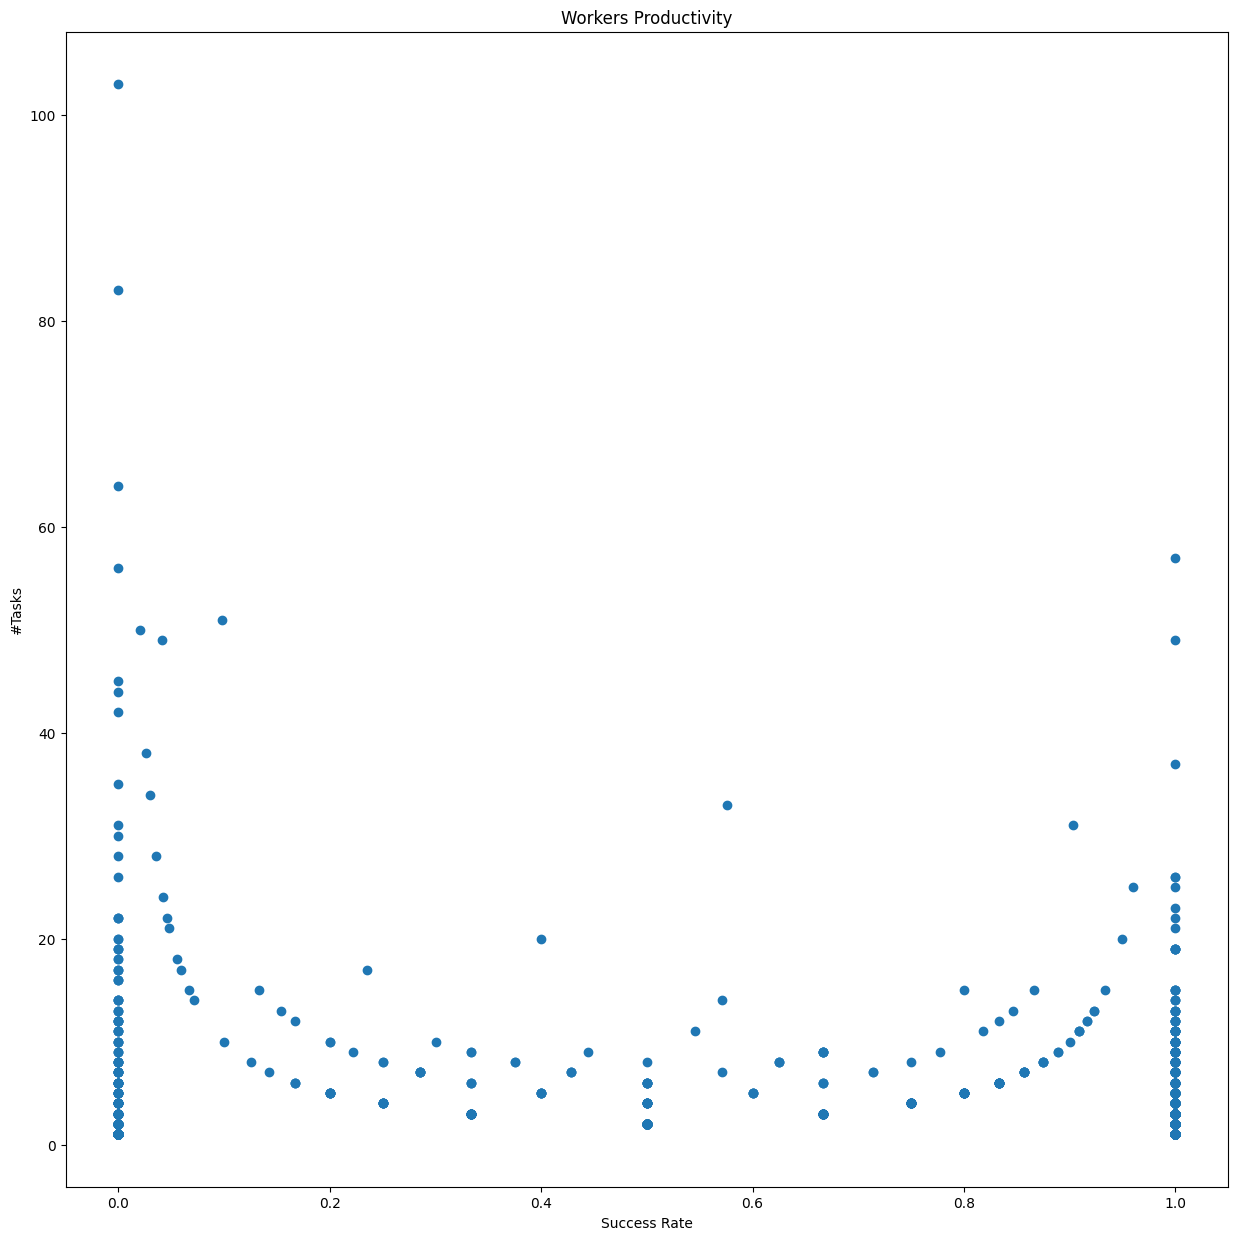

In [58]:
def plot_workers_productivity(df):
    df = df.copy()
    df['is_success'] = df['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Success' else 0)
    df = df.groupby('taskAssignedTo').agg({'is_success': 'sum', 'taskAssignedTo':'nunique', 'taskId': 'count'})
    df['success_rate'] = df['is_success']/df['taskId']
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(df['success_rate'], df['taskId'])
    ax.set_title('Workers Productivity')
    ax.set_xlabel('Success Rate')
    ax.set_ylabel('#Tasks')
    plt.show()
    return None
plot_workers_productivity(df)

From the above chart, we can see that there are workers with many tasks and low success rate. This is an indication of cheating. Moreover, we can check the data more closely by plotting the result by branch destination.

This is how we are going to approach the problem. We are going to plot four lines based on two things:
1. Branch performance: Median (since there are outliers) of tasks and success rates of the worker in the branches
    - These lines will help us determine whether the branch needs more careful look
2. Absolute value: 6 tasks and 0.2 success rate (*these values are negotiable*)
    - Workers on the left and below the intersections of this line will be warned and trained to be better
    - Workers on the left and above the intersections will be laid off to prevent any more cheating

/tmp/ipykernel_23248/1348419364.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8,8))


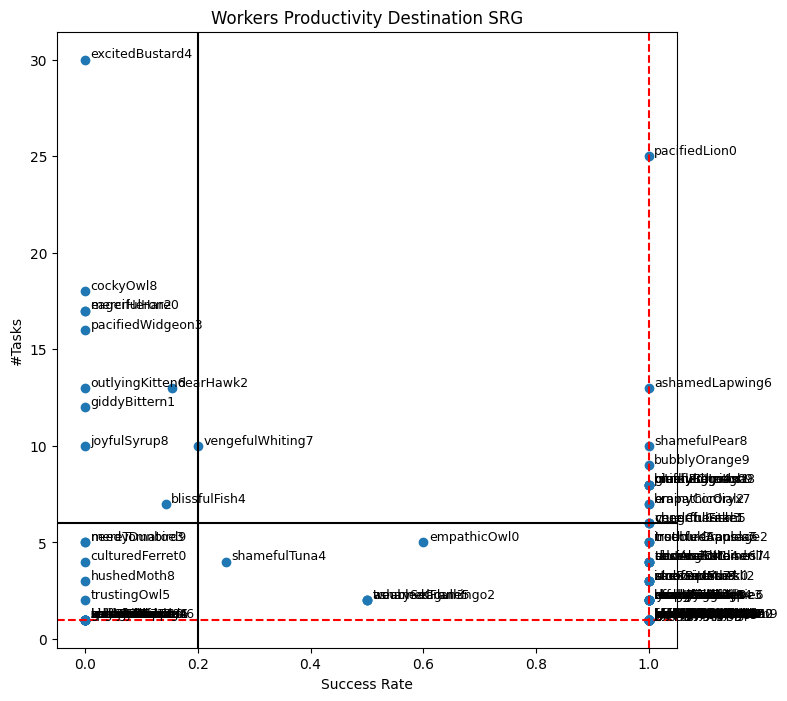

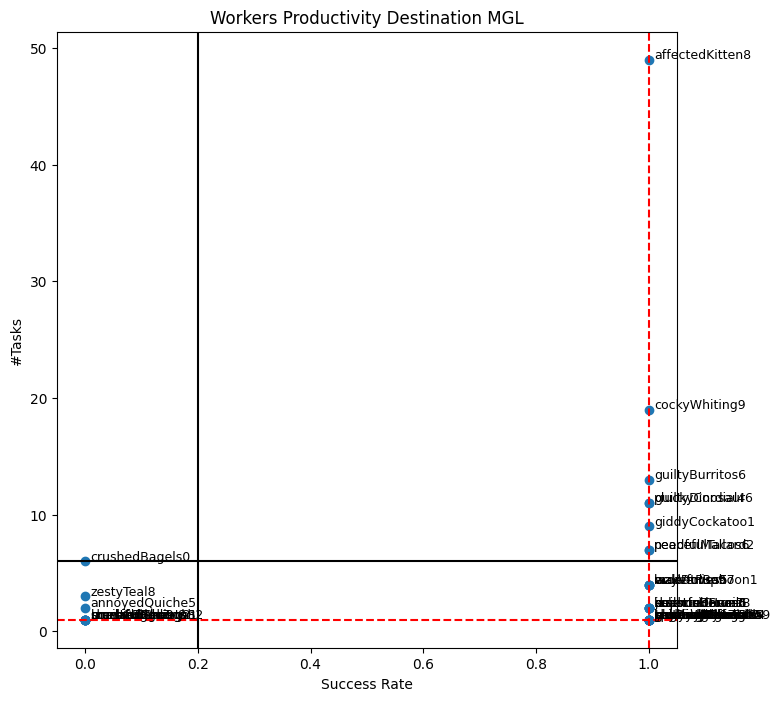

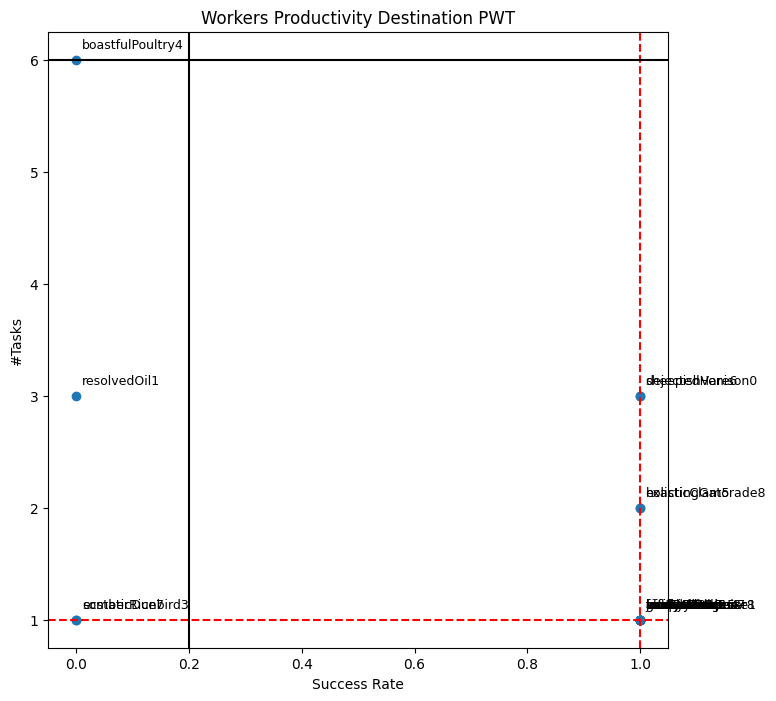

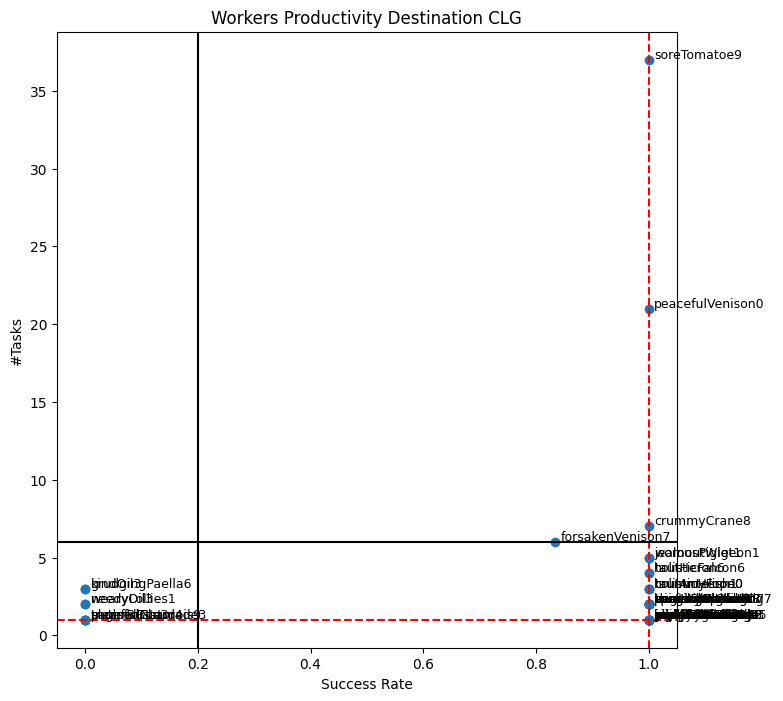

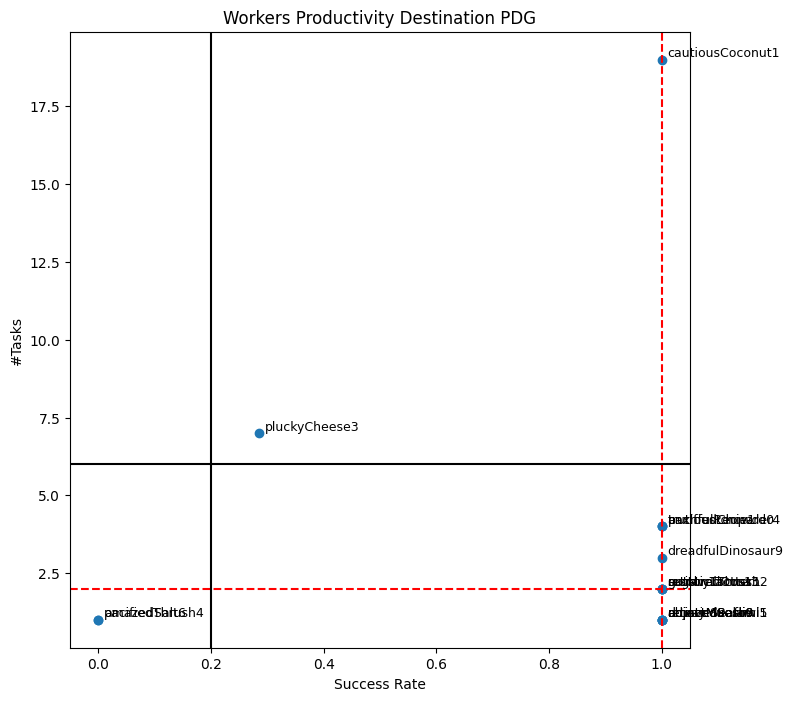

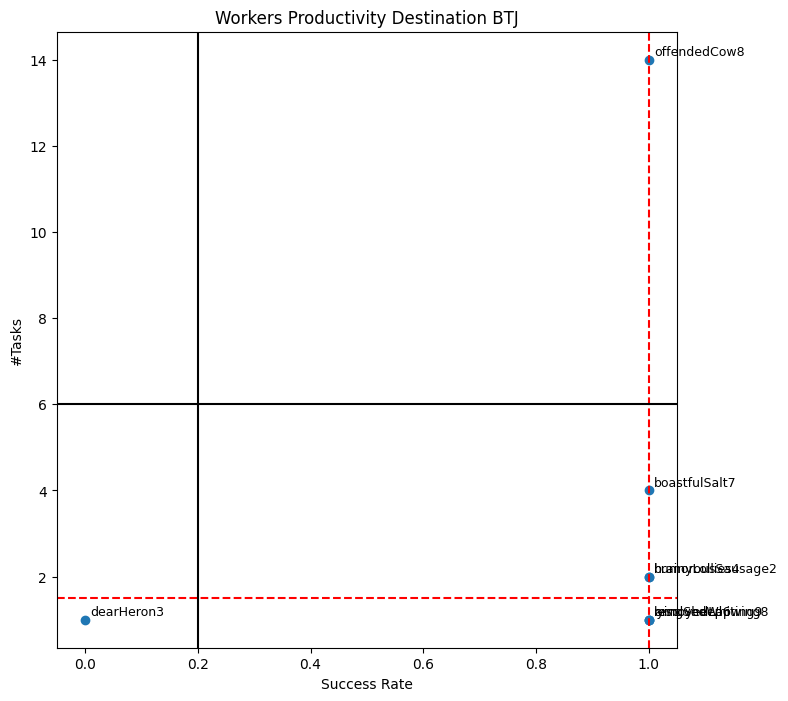

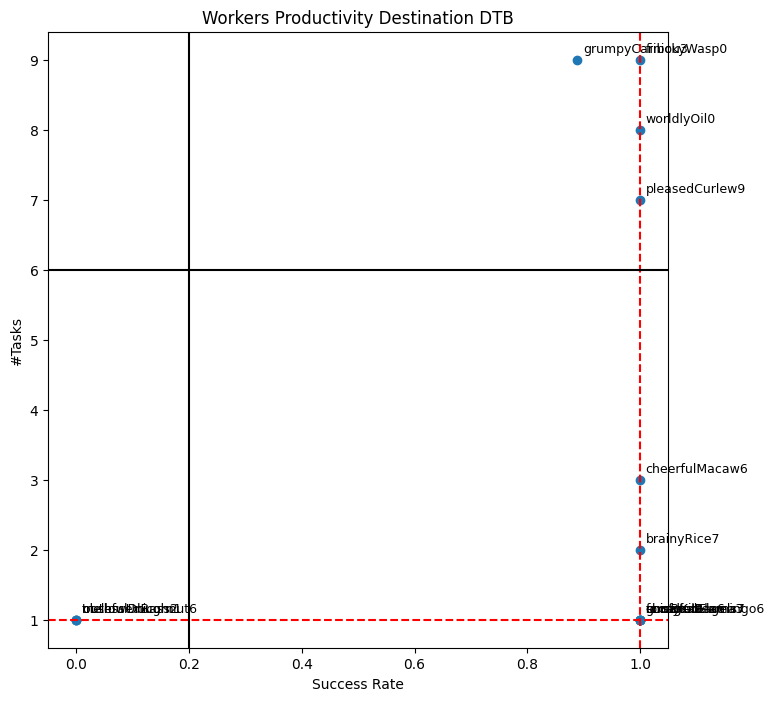

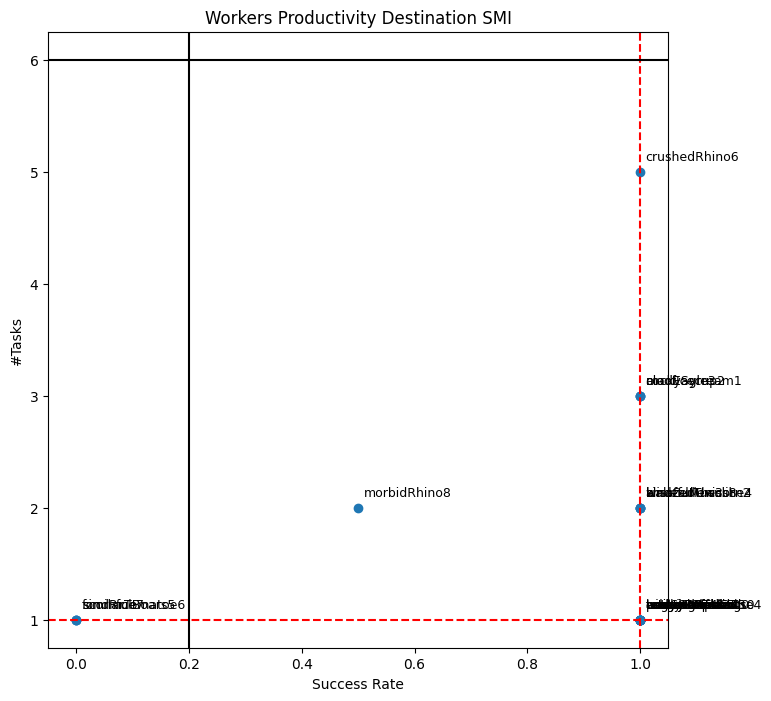

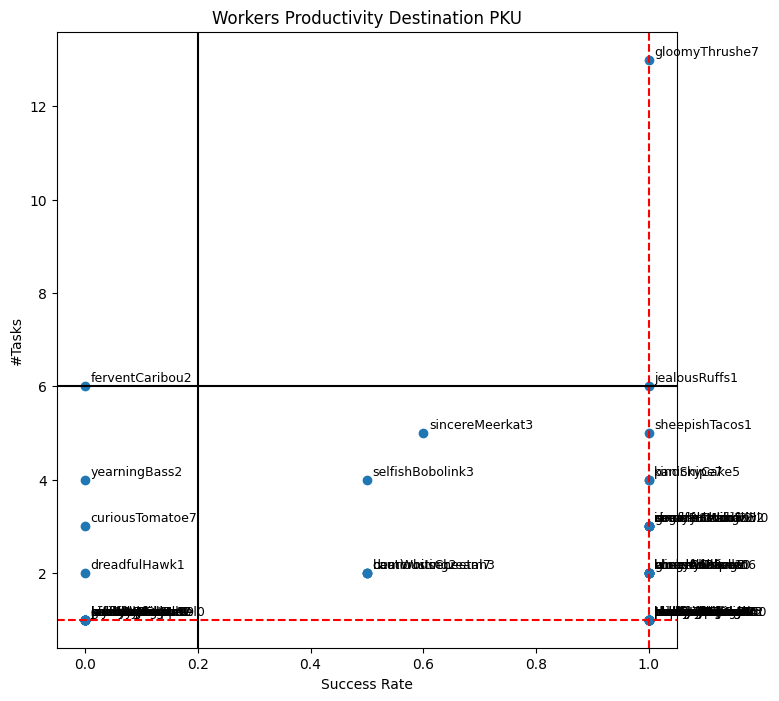

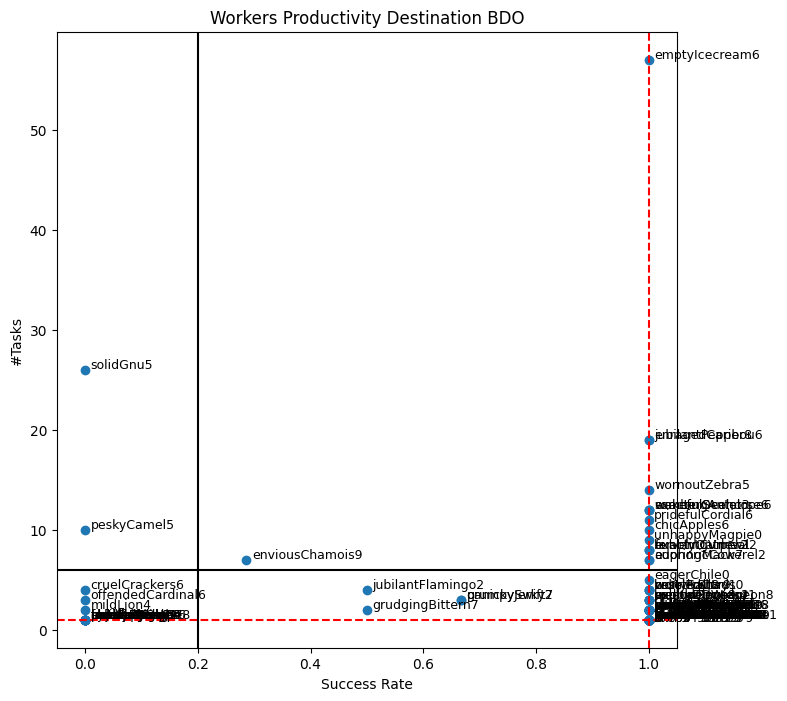

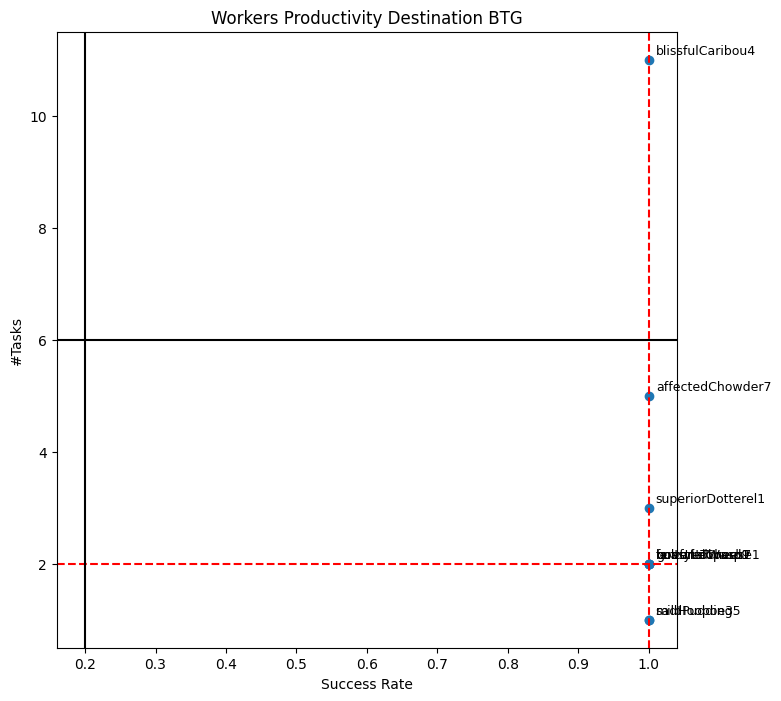

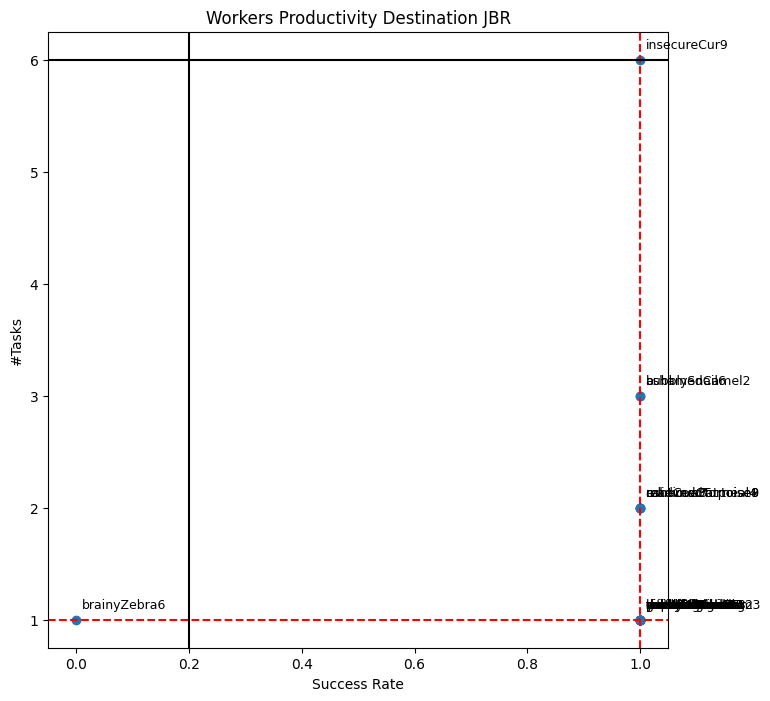

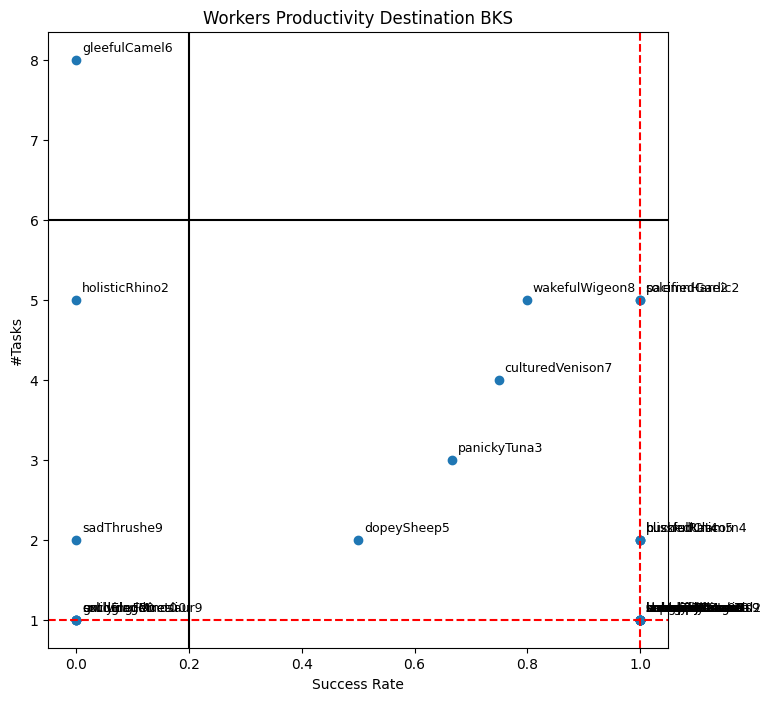

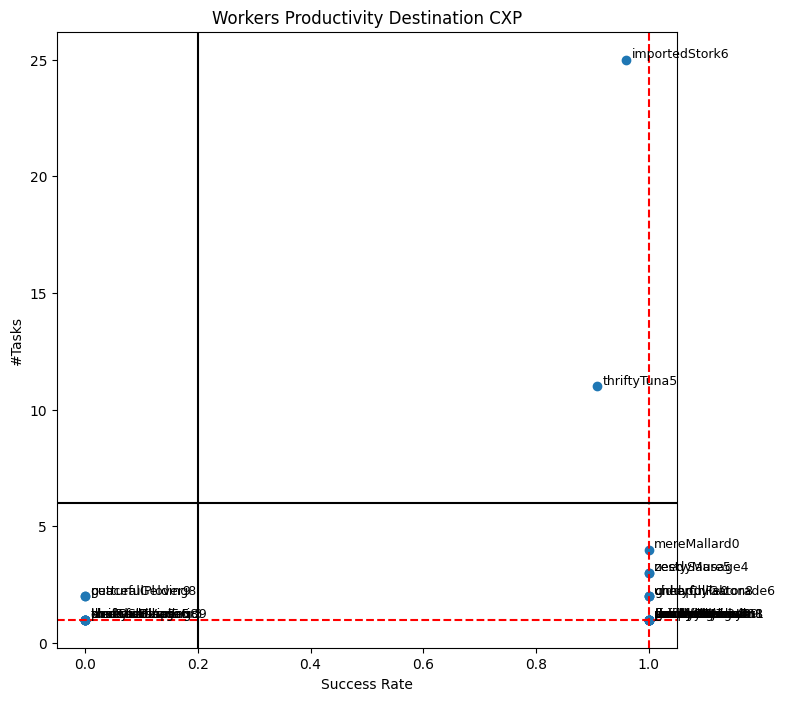

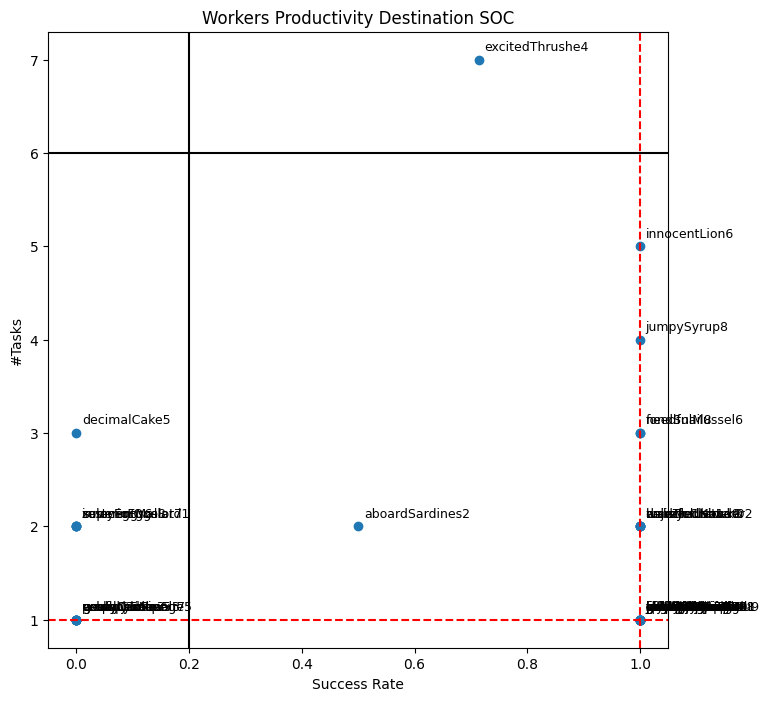

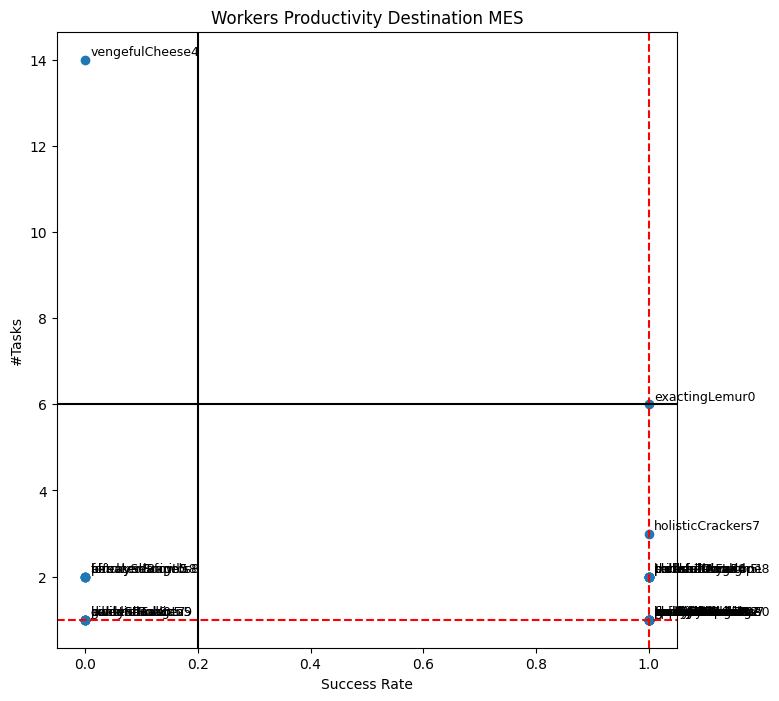

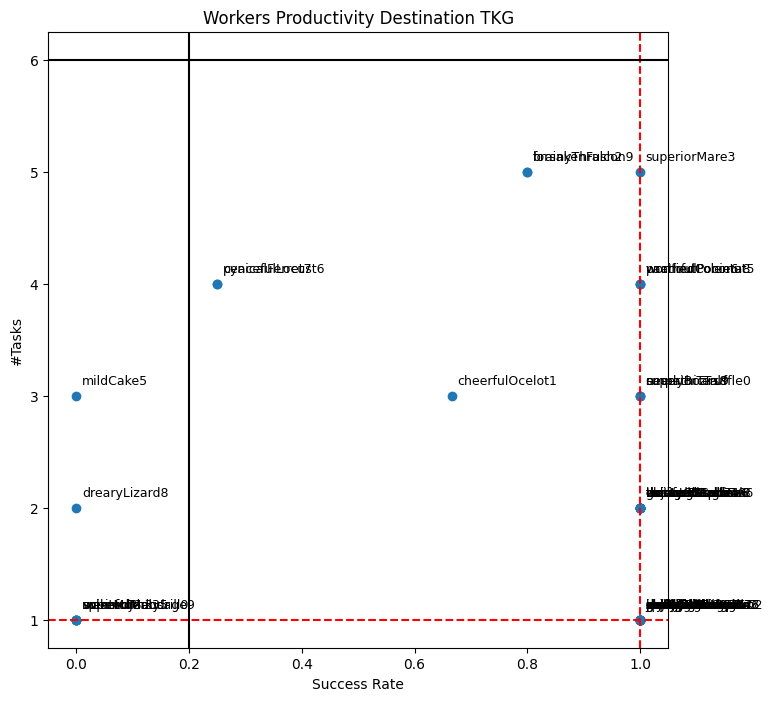

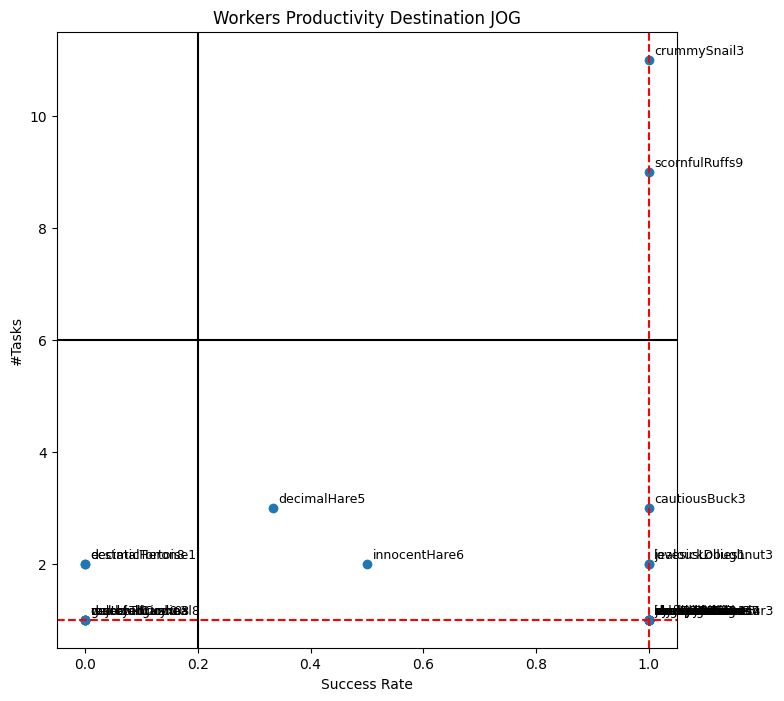

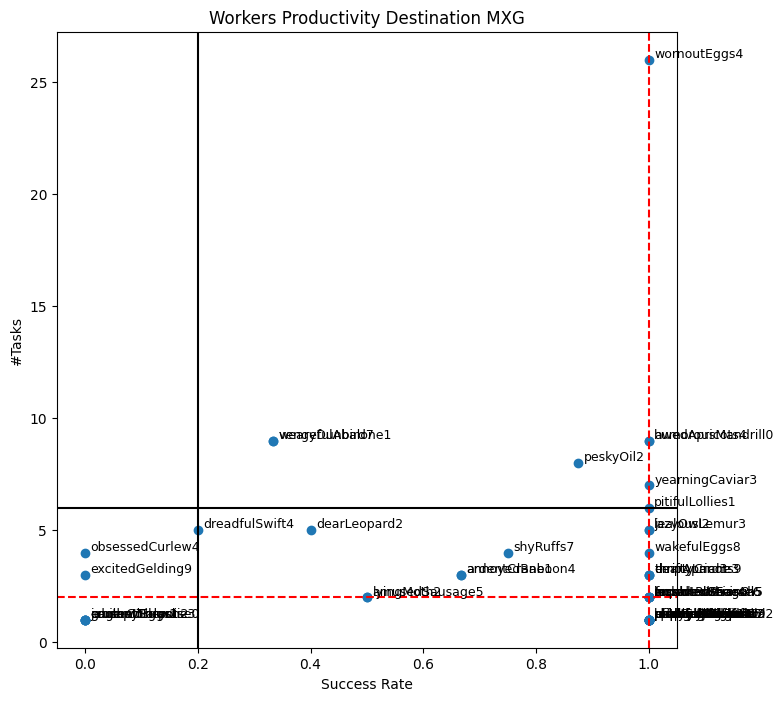

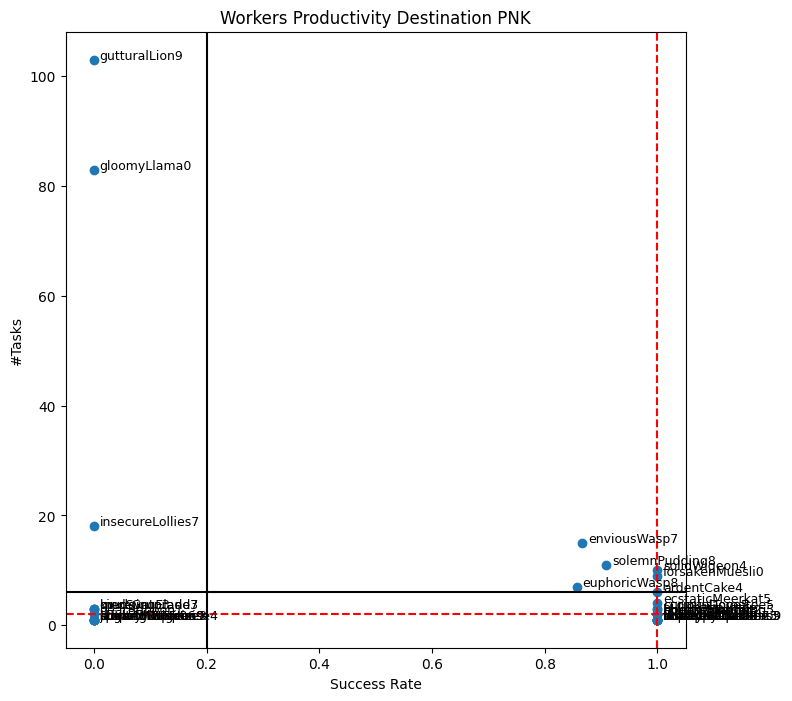

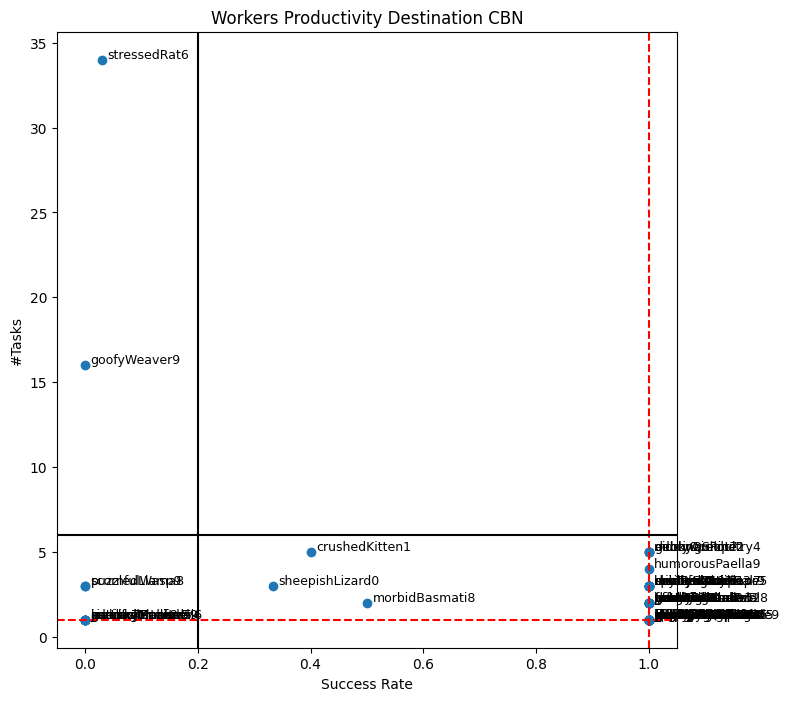

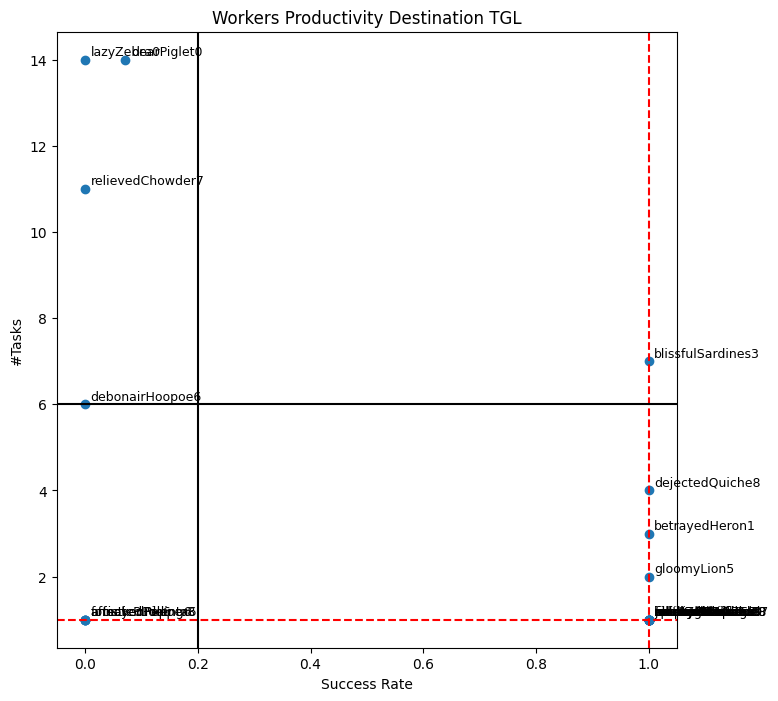

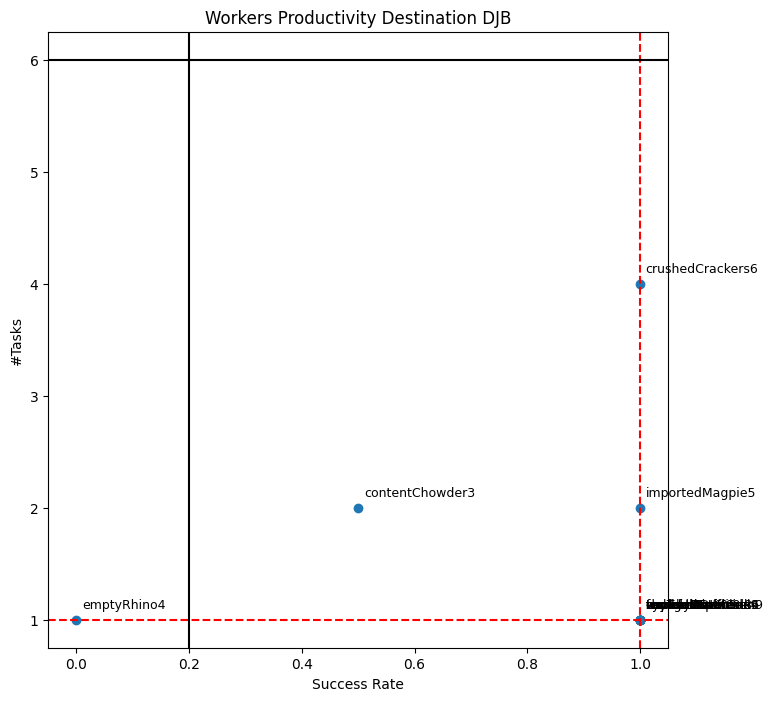

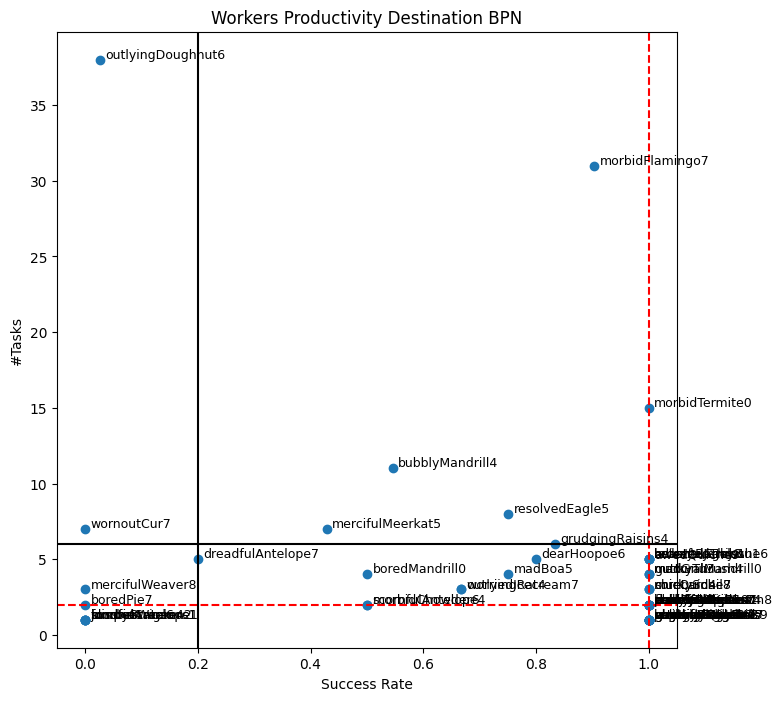

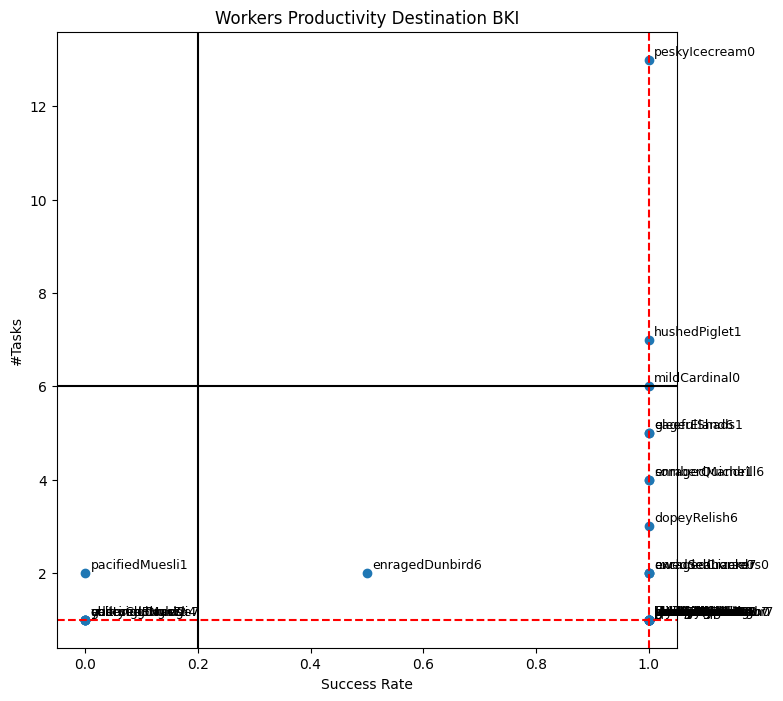

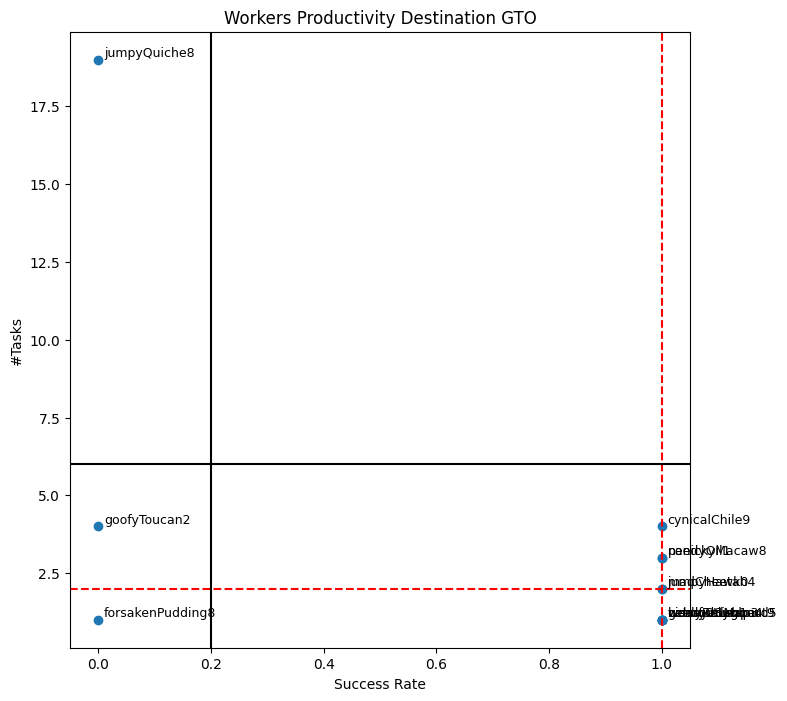

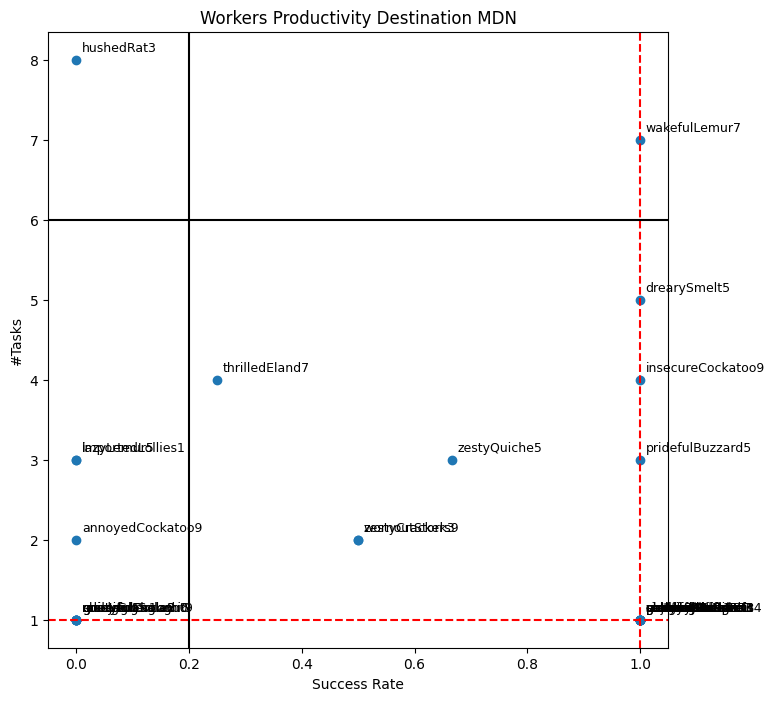

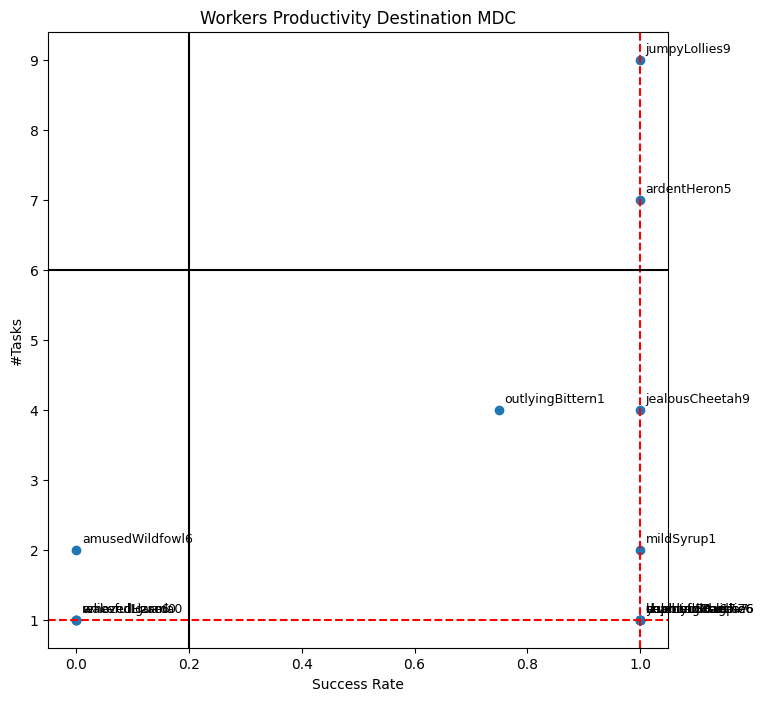

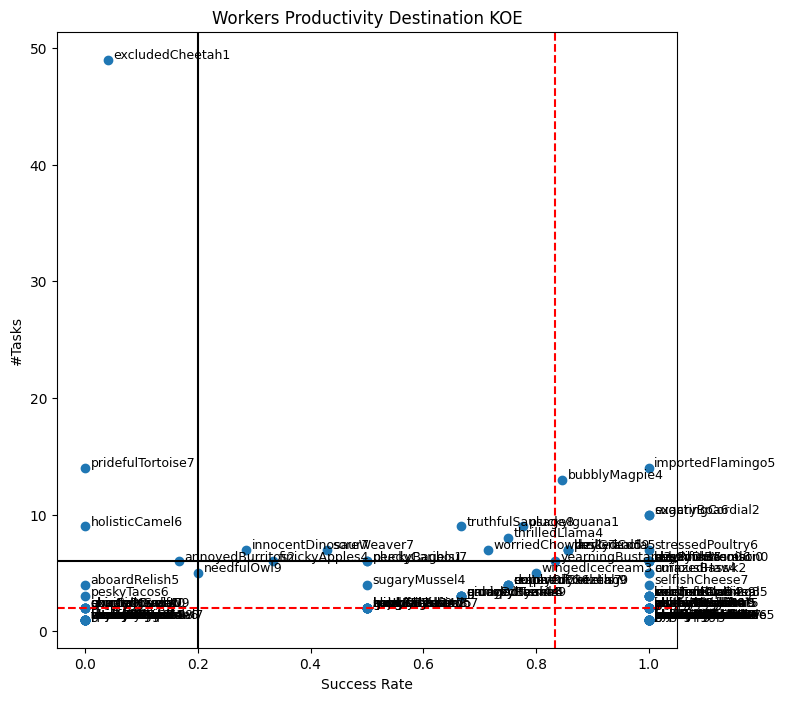

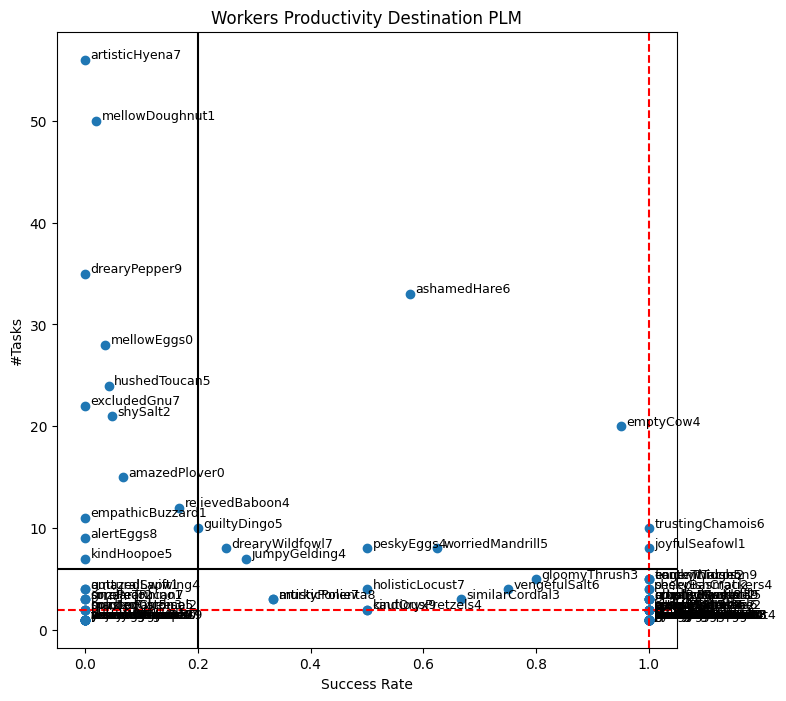

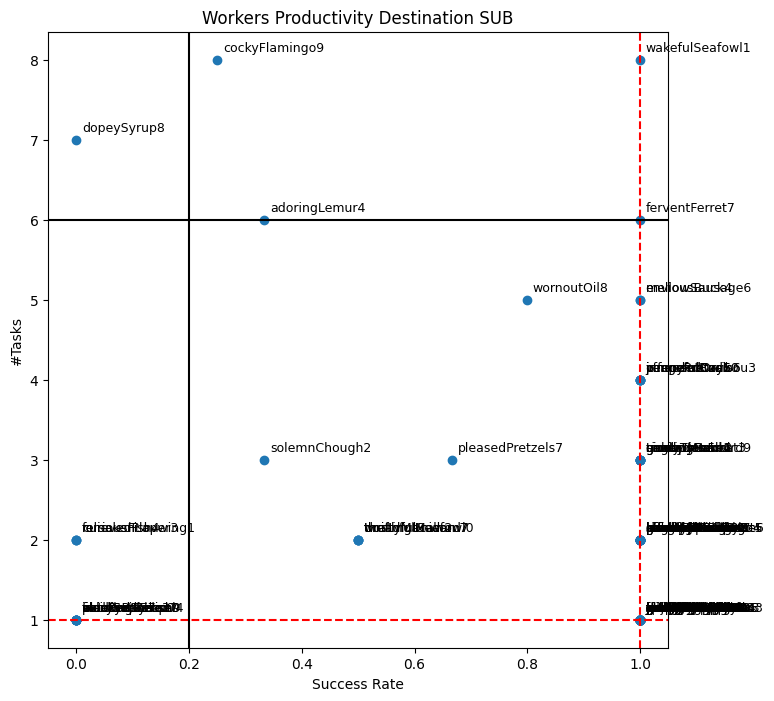

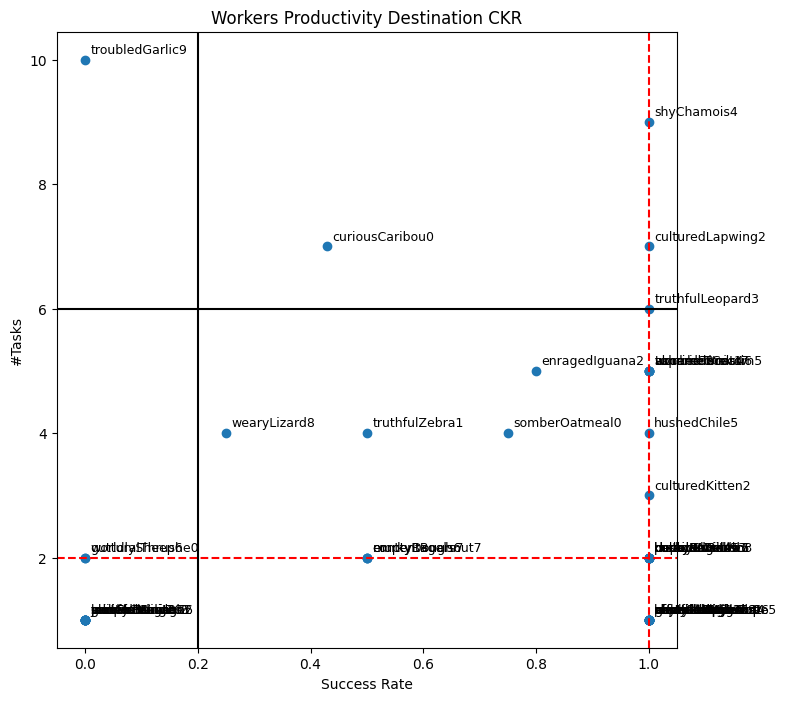

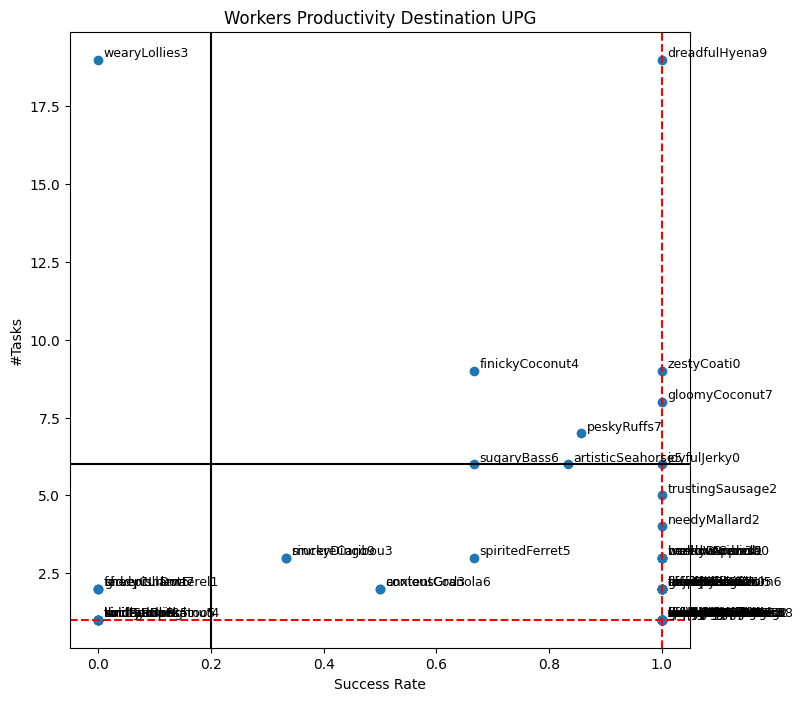

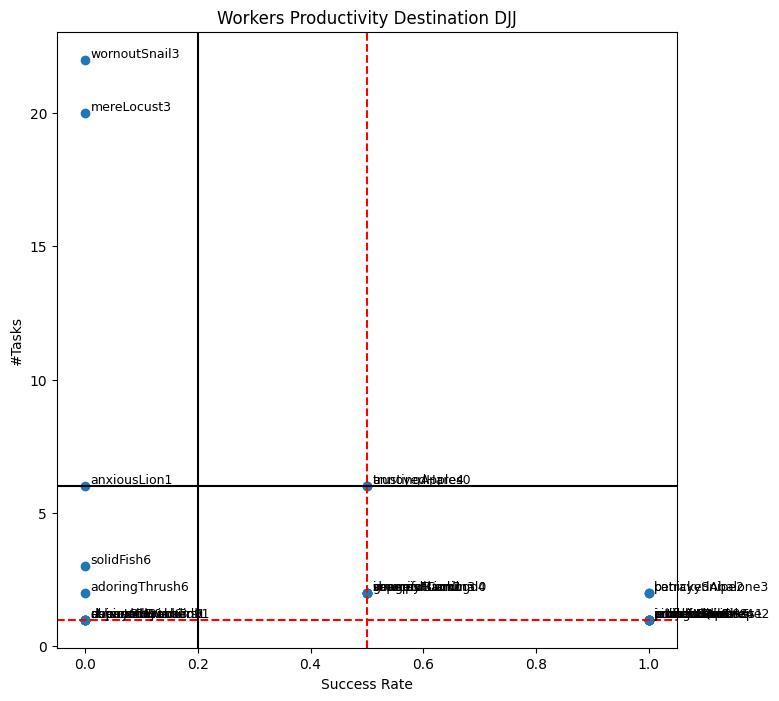

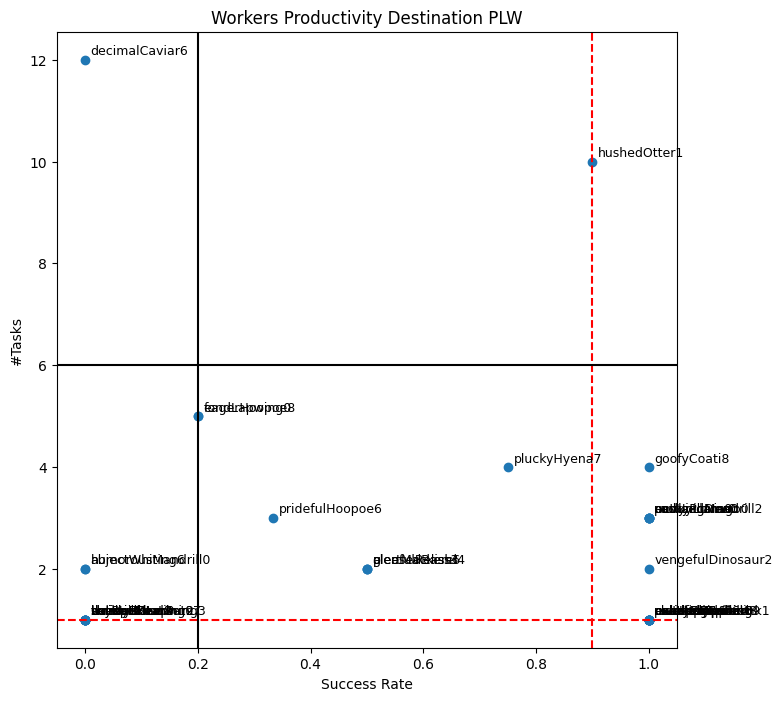

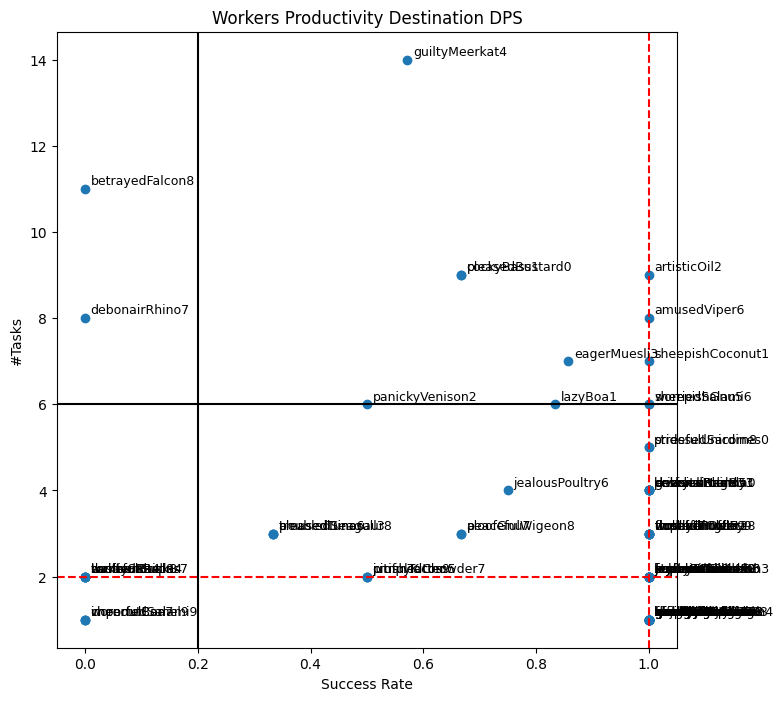

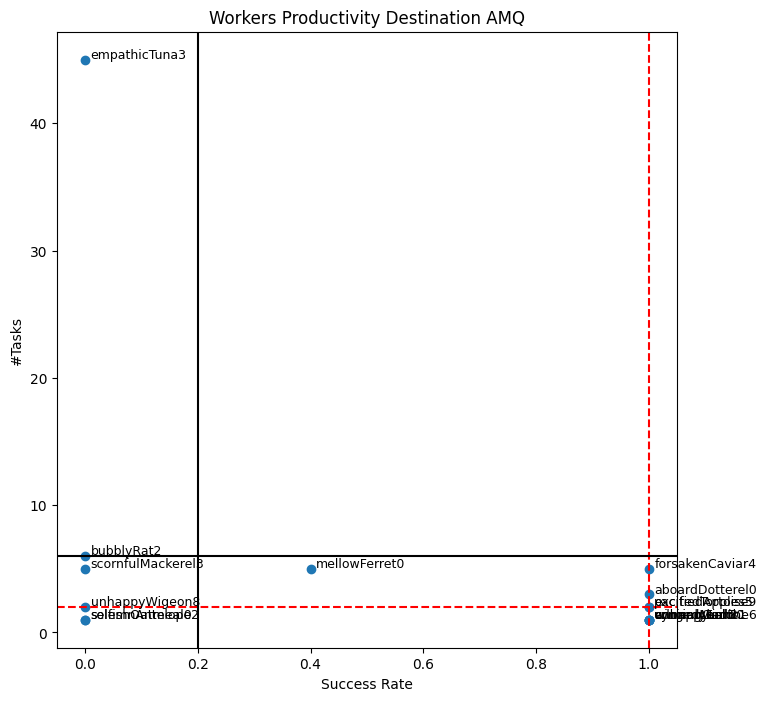

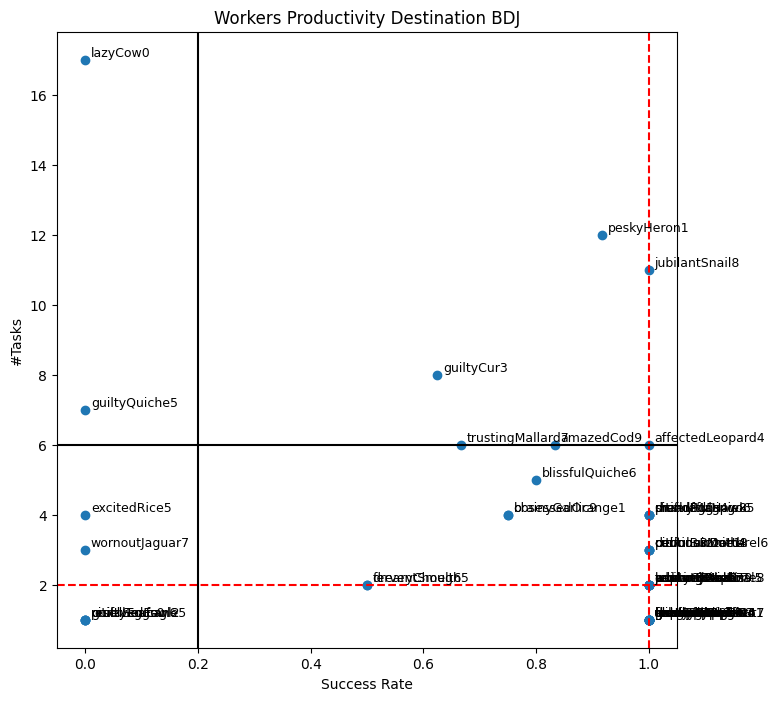

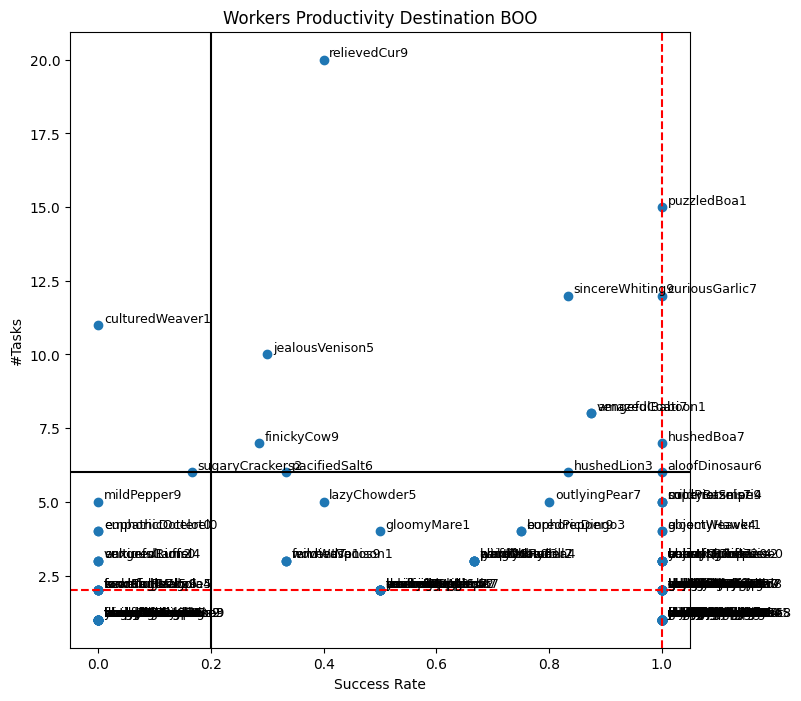

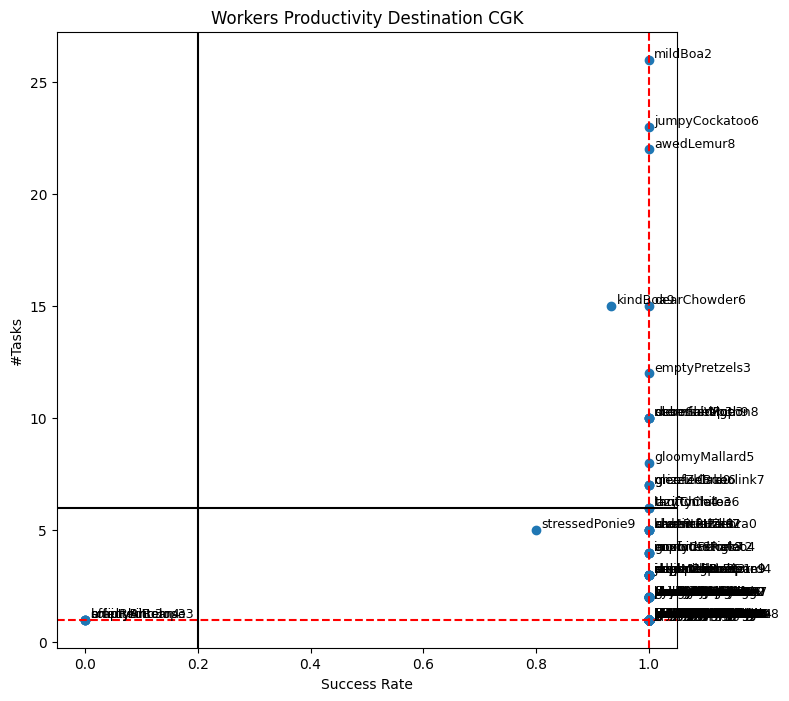

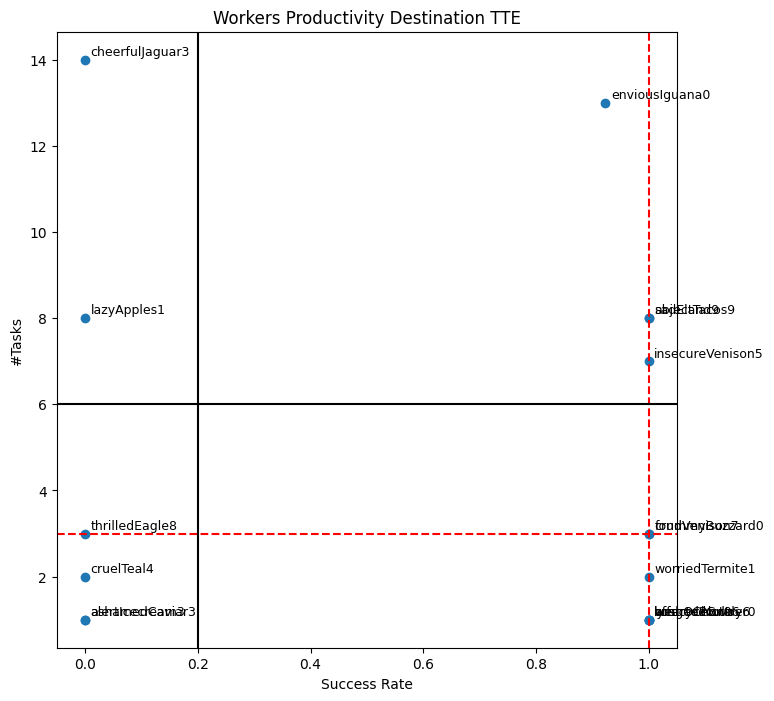

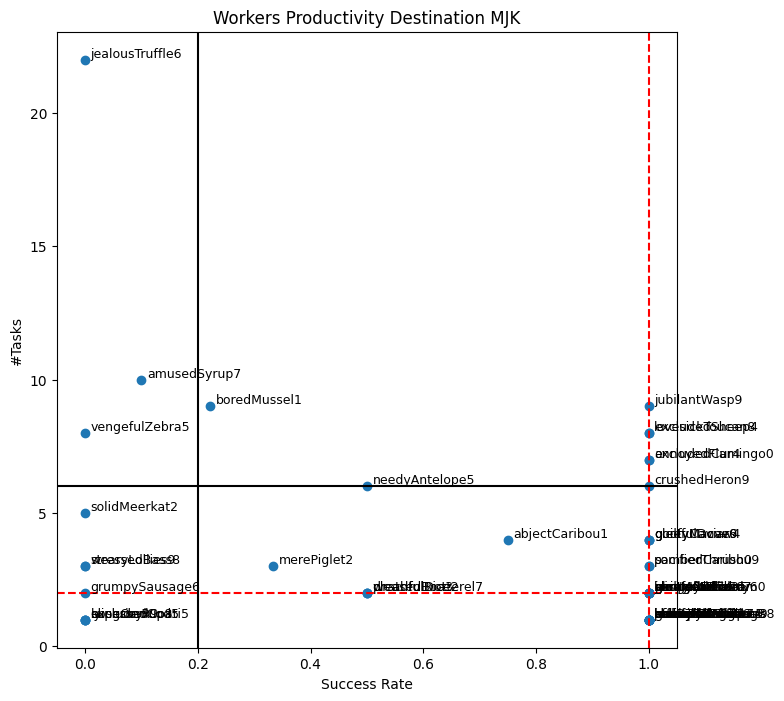

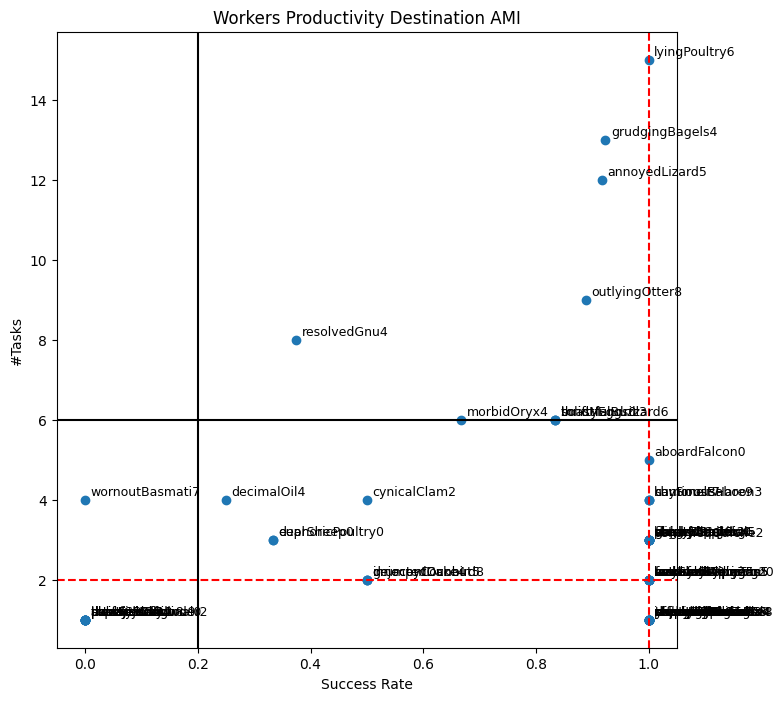

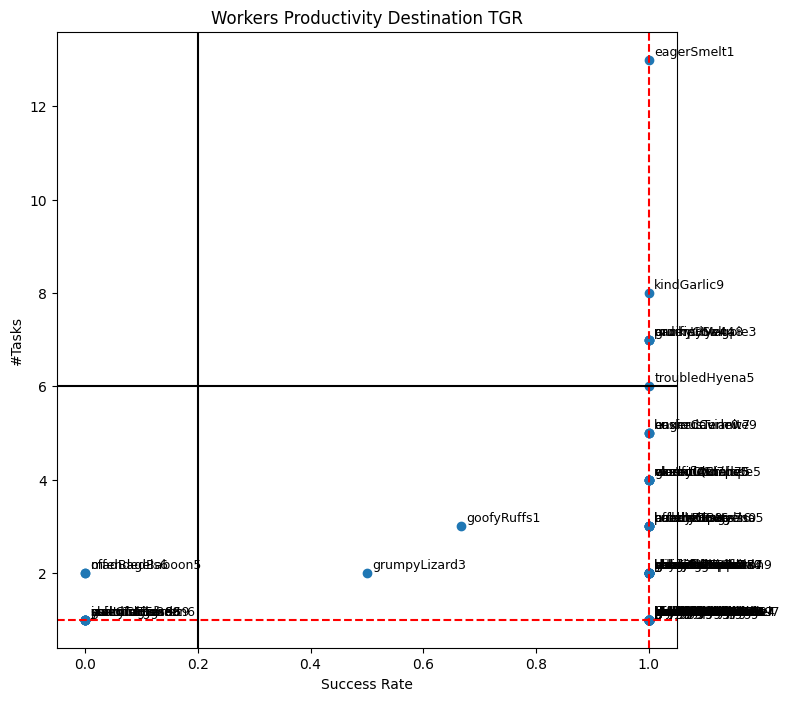

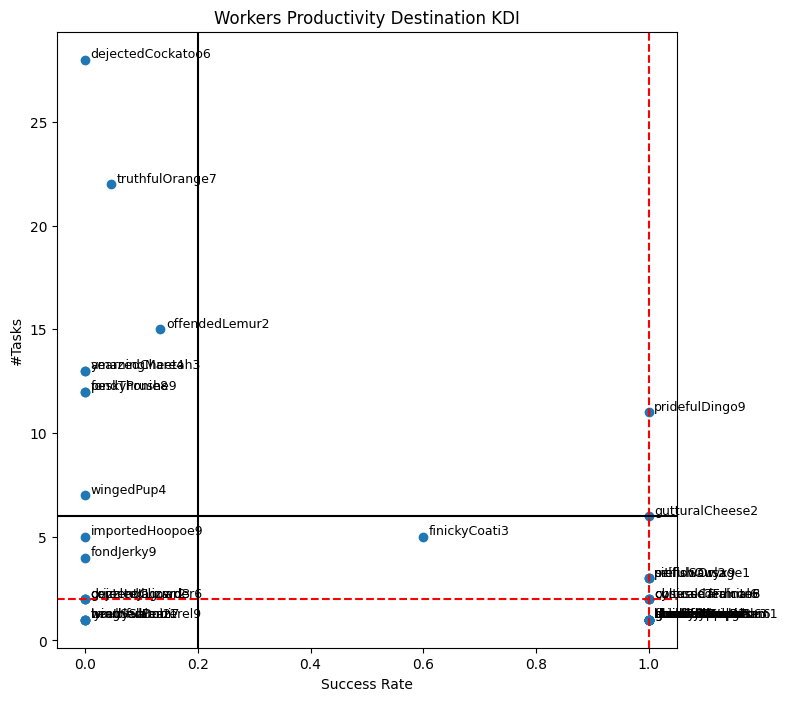

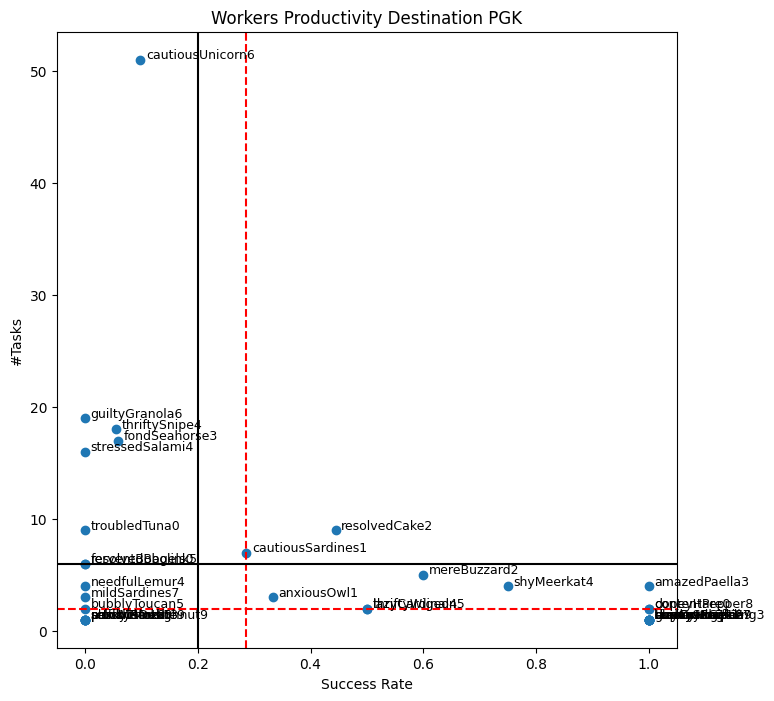

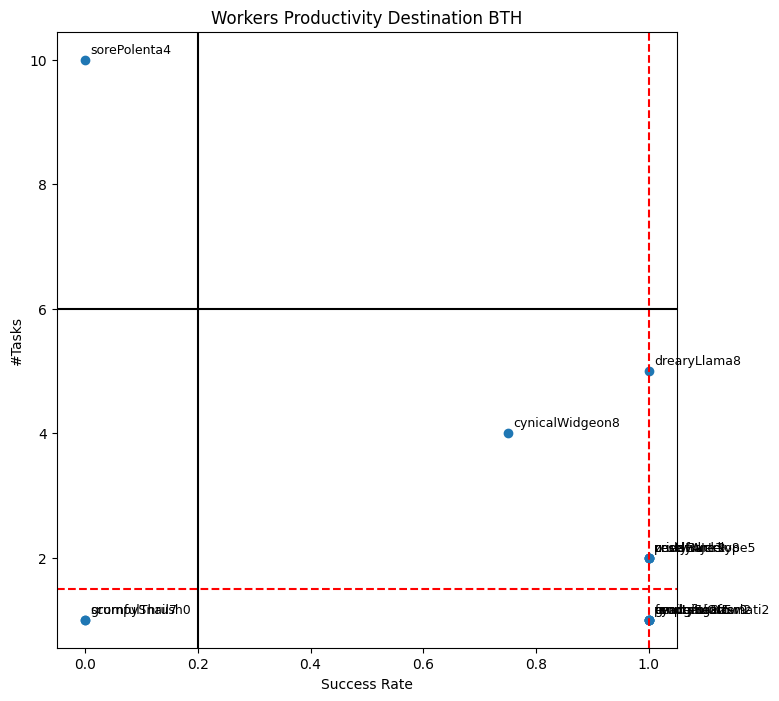

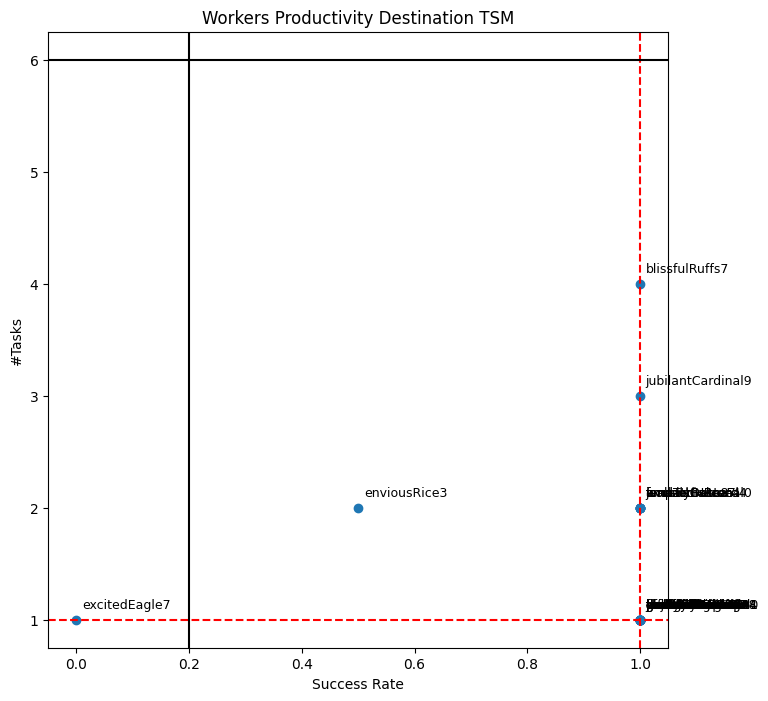

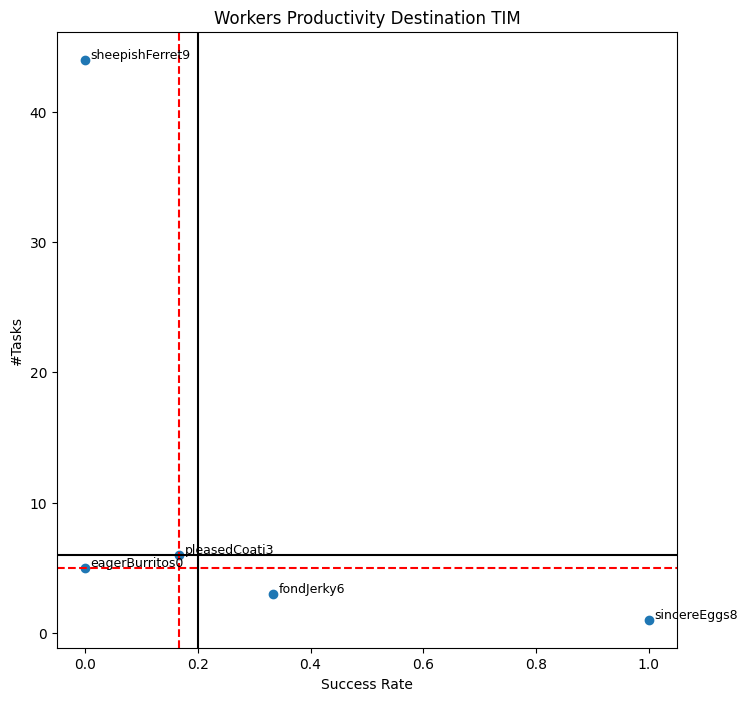

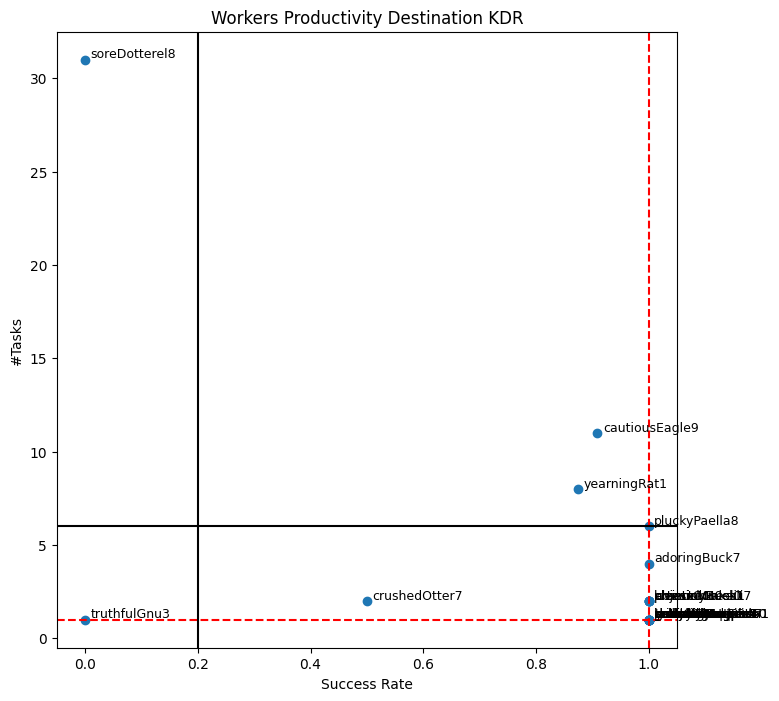

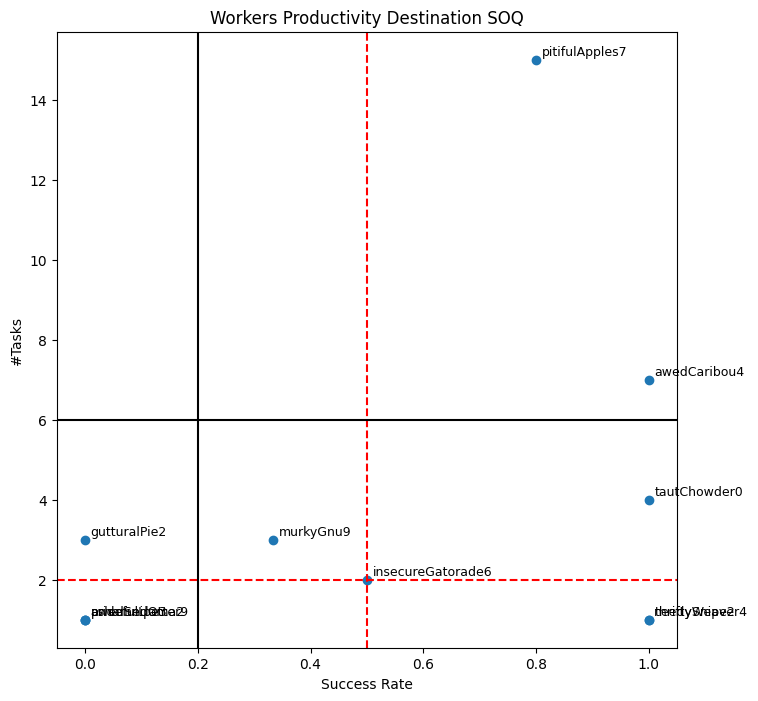

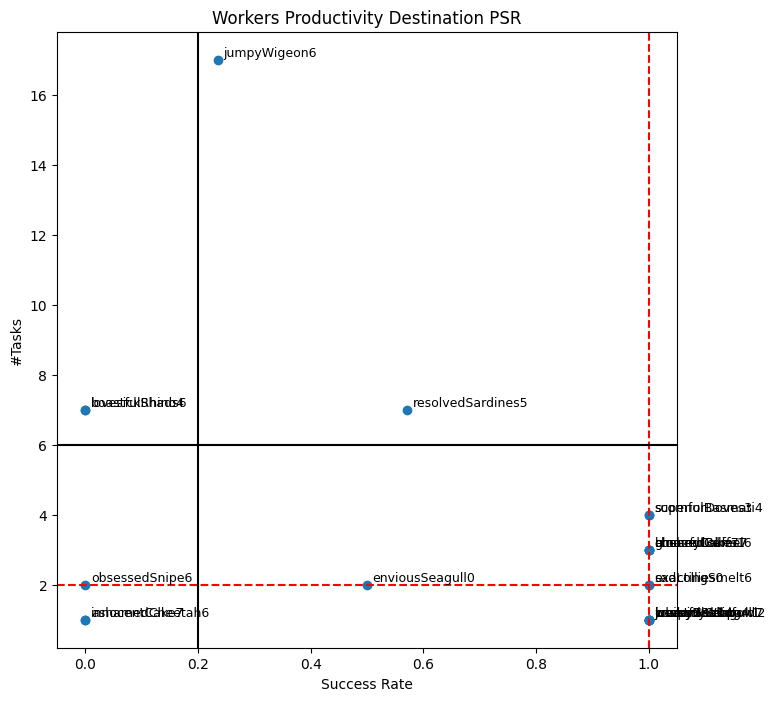

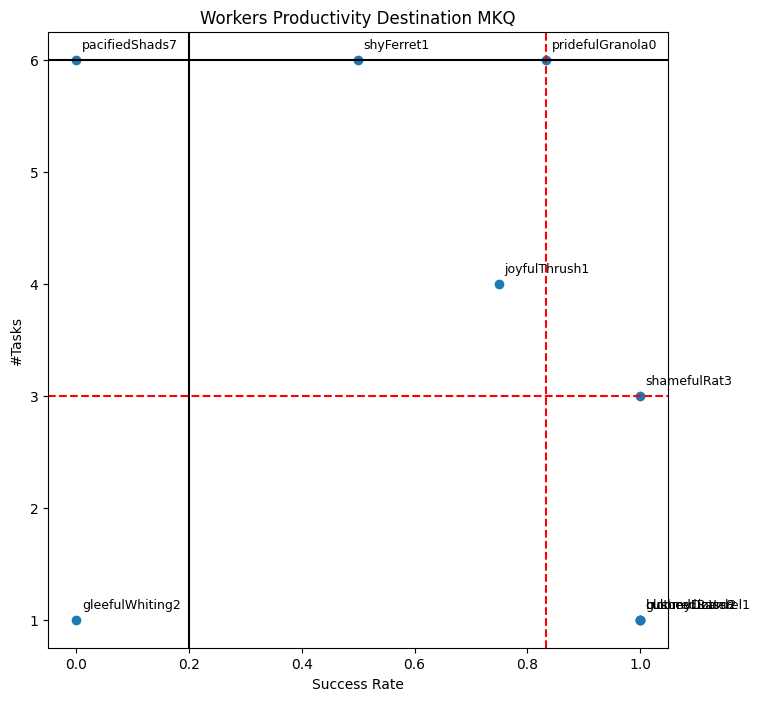

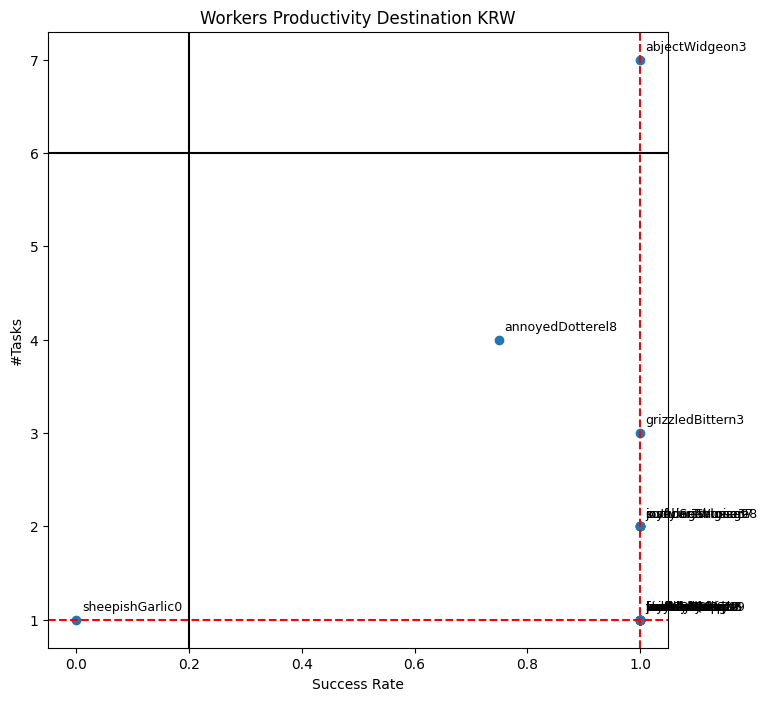

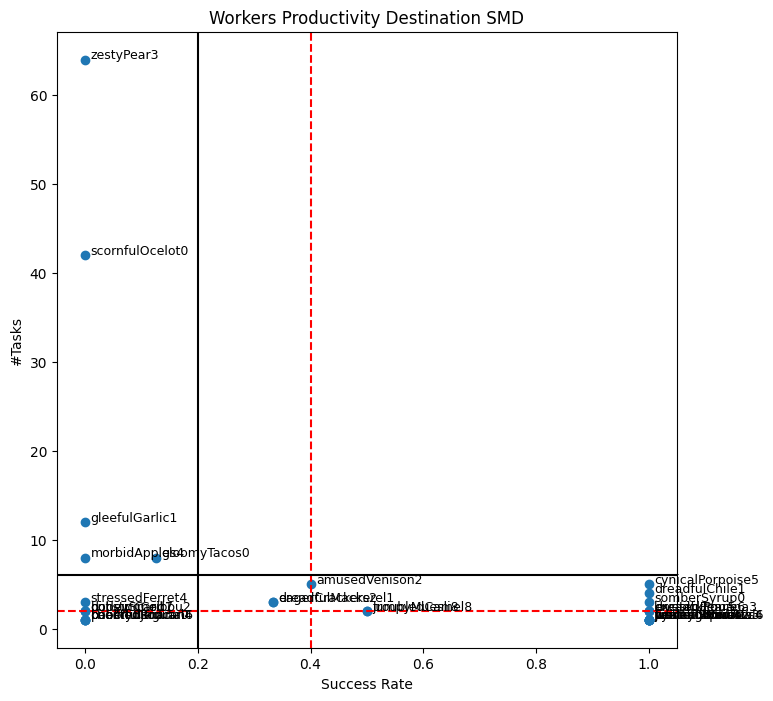

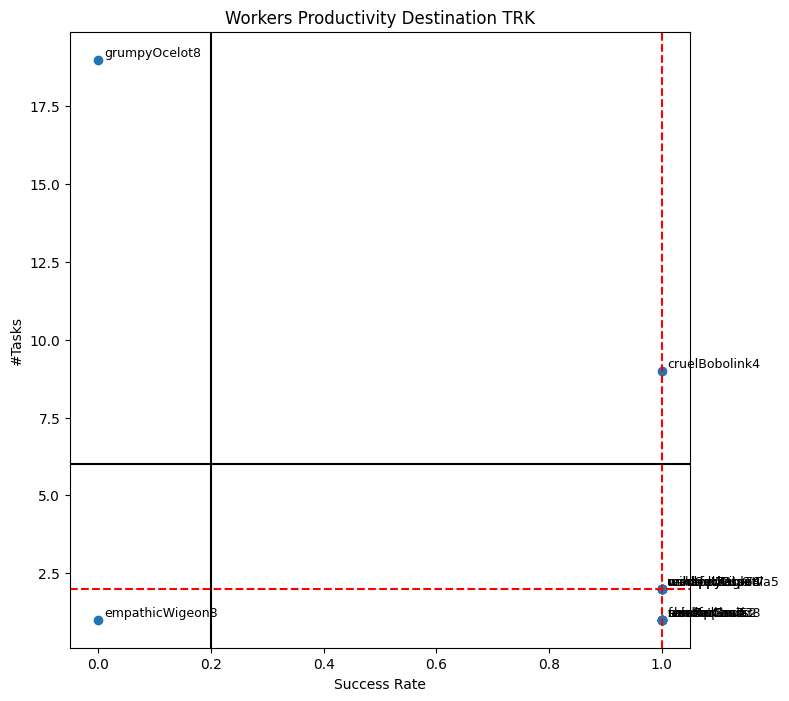

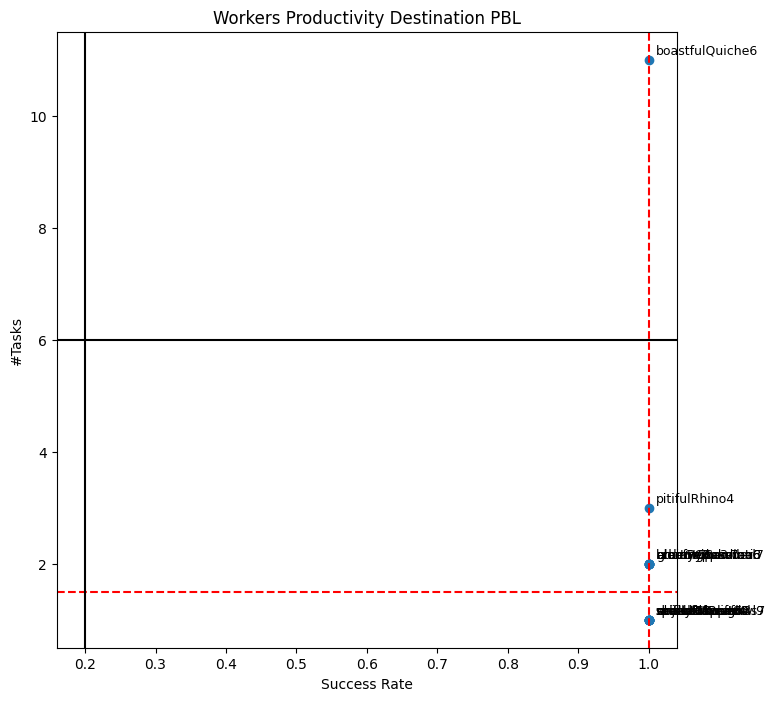

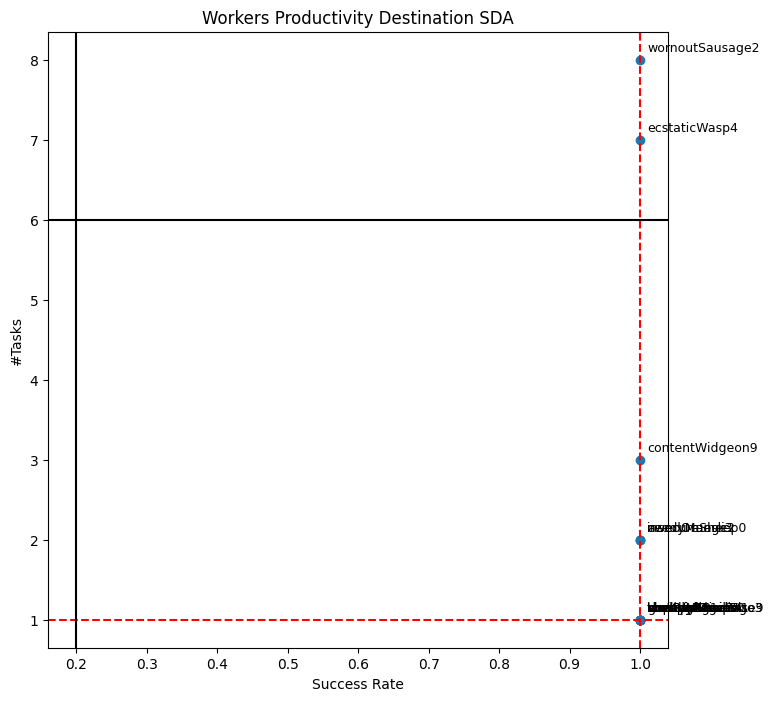

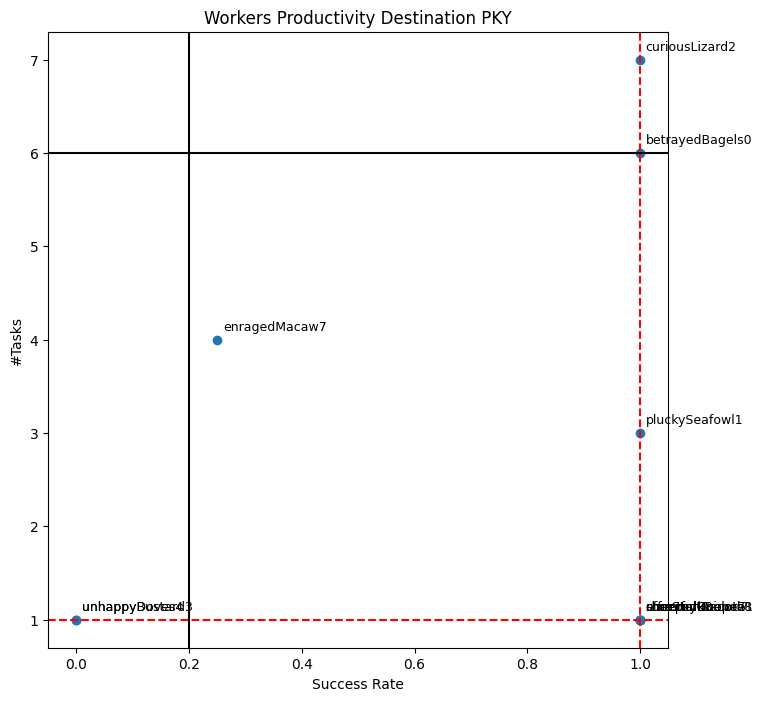

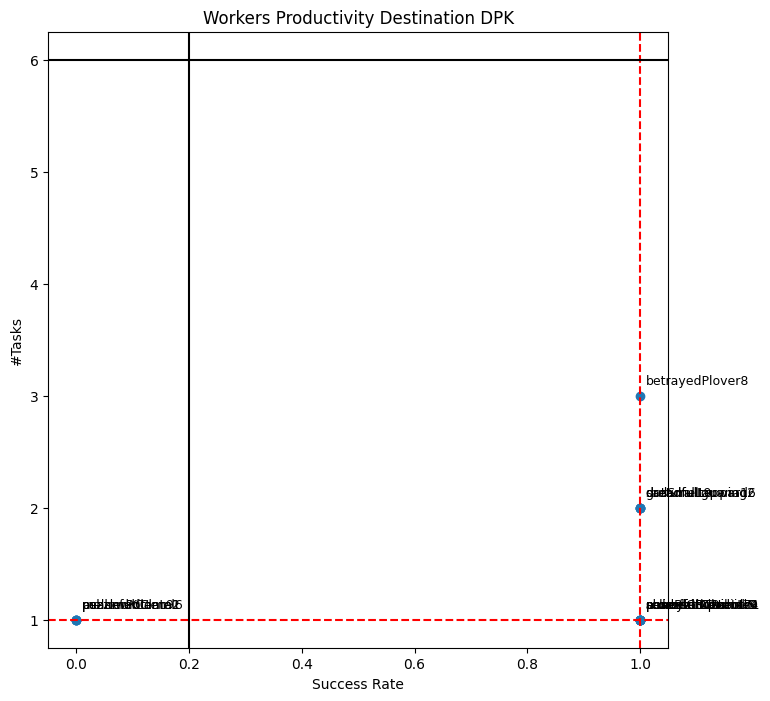

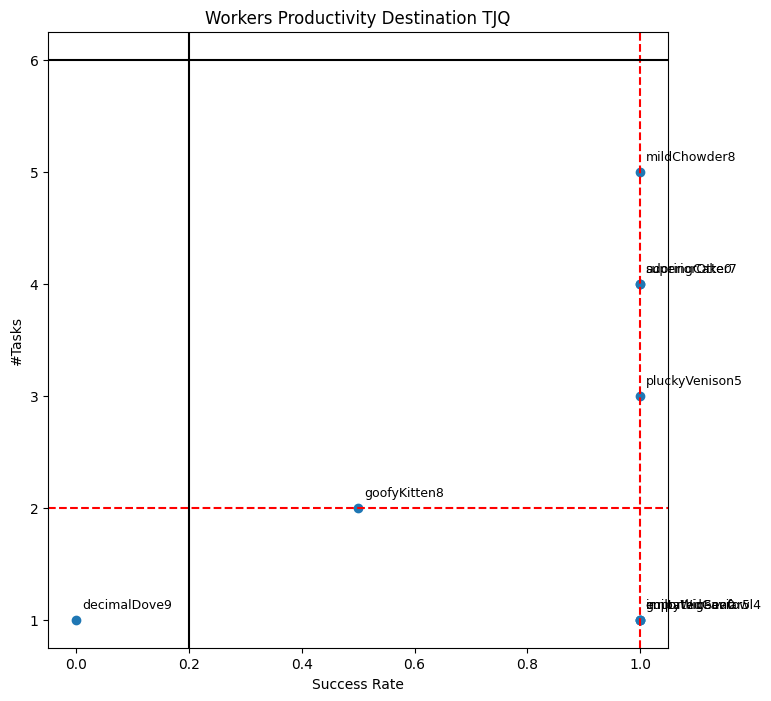

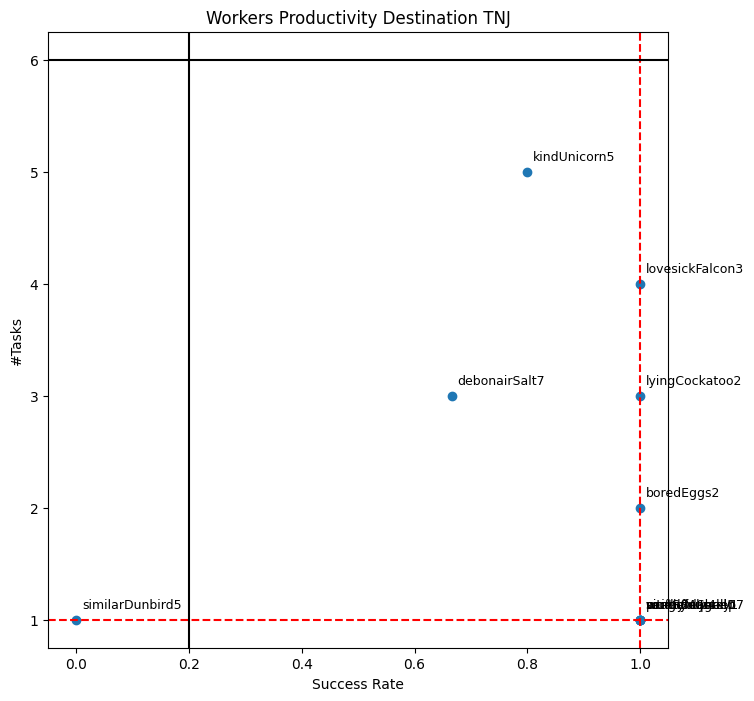

In [59]:
def plot_workers_productivity_by_branch(df):
    df = df.copy()
    df['is_success'] = df['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Success' else 0)
    branch_dest_s = df['UserVar.branch_dest'].unique()
    for branch_dest in branch_dest_s:
        df_branch = df[df['UserVar.branch_dest'] == branch_dest]
        df_branch = df_branch.groupby('taskAssignedTo').agg({'is_success': 'sum', 'taskAssignedTo':'nunique', 'taskId': 'count'})
        df_branch['success_rate'] = df_branch['is_success']/df_branch['taskId']
        fig, ax = plt.subplots(figsize=(8,8))
        ax.scatter(df_branch['success_rate'], df_branch['taskId'])
        for idx, row in df_branch.iterrows():
            ax.text(row['success_rate']+0.01, row['taskId']+0.1, str(idx), fontsize=9)
        ax.axhline(y = df_branch['taskId'].median(), linestyle='--', color='red')
        ax.axvline(x = df_branch['success_rate'].median(), linestyle='--', color='red')
        
        ax.axhline(y = 6, linestyle='-', color='black')
        ax.axvline(x = 0.2, linestyle='-', color='black')
        ax.set_title(f'Workers Productivity Destination {branch_dest}')
        ax.set_xlabel('Success Rate')
        ax.set_ylabel('#Tasks')
    plt.show()
    return None
plot_workers_productivity_by_branch(df)

From the median of task, we can still see that there are many branches that have median 1. The task for that branch is to better distribute the tasks.

From the median of success rate, we can see that there are many branches that have low success rate. We can look at the problem more closely for that branches.

From the black lines, we can tolerate those who failed because it is their first tasks and still need some guidances. Also, we cannot afford to lose to many manpowers. On the other hand, we cannot let indications of cheating left unpunished. That kind of environment will discourage discipline workers.

That being said, *we cannot really investigate those failed labels because we cannot even trust the workers who filled the status*.

### 9. Check whether the `taskLocationDone` is the nearest to the branch destination.

We already saw that some destination branches are unreliable (i.e., they are located outside Indonesia). On the other hand, we haven't check for other branches. Therefore, we are going to look if there are any closer branches to the destination location.

In [60]:
# need to take account of 0.0 latitude and longitude from previous findings
# https://stackoverflow.com/questions/1253499/simple-calculations-for-working-with-lat-lon-and-km-distance
# Latitude: 1 deg = 110.574 km
# Longitude: 1 deg = 111.320*cos(latitude) km
def check_nearest_airport_task(df, df_airports):
    df = df.copy()
    df_airports = df_airports.copy()
    df_airports = df_airports[ (df_airports['latitude'].between(-11, 6)) & (df_airports['longitude'].between(95, 142)) ] # indonesia only
    df_dest_ina = df[ (df['taskLocationDone.lon'] != 0.0) & (df['dest_country_name'] == 'Indonesia') ]
    df_dest_ina = df_dest_ina.merge(df_airports, how='cross')
    df_dest_ina = df_dest_ina[ # pre-filter to reduce the cost of calculation
        ((df_dest_ina['taskLocationDone.lon']-df_dest_ina['longitude']).between(-10,10))
        & ((df_dest_ina['taskLocationDone.lat']-df_dest_ina['latitude']).between(-10,10))
    ]
    df_dest_ina['distance_km'] = df_dest_ina.apply(lambda x: geopy.distance.distance((x['taskLocationDone.lat'], x['taskLocationDone.lon']), (x['latitude'], x['longitude'])).km, axis=1)
    df_dest_ina['rn'] = df_dest_ina.sort_values('distance_km').groupby('taskId').cumcount()
    df_dest_ina = df_dest_ina[df_dest_ina['rn'] == 0]
    return df_dest_ina[['taskId', 'UserVar.branch_dest', 'dest_latitude', 'dest_longitude', 'taskLocationDone.lat','taskLocationDone.lon', 'IATA', 'airport_name', 'city_name', 'latitude', 'longitude', 'distance_km']]

In [61]:
df_check_nearest_task = check_nearest_airport_task(df, df_airports)

In [62]:
df_check_nearest_task[ df_check_nearest_task['IATA'] == df_check_nearest_task['UserVar.branch_dest'] ]

taskId UserVar.branch_dest  dest_latitude  \
276      4fe3b237c832ca4841a2                 SRG      -6.983333   
595      2079aa99bda230940785                 SRG      -6.983333   
914      b3975d6adb8e802c749b                 SRG      -6.983333   
1233     43339b7d5478e55f4df3                 SRG      -6.983333   
1552     fca6474de67a22064900                 SRG      -6.983333   
...                       ...                 ...            ...   
1321402  85f340c19c6cffd3135e                 BDO      -6.900556   
1321645  abb2cc73275d23947762                 MES       3.566667   
1321936  4df98016923e193d39ec                 PKU       0.460833   
1322273  5cc952d9e9f8066dbf24                 JOG      -7.783333   
1322637  1b136b5a3c60749eb571                 TKG      -5.242222   

         dest_longitude  taskLocationDone.lat  taskLocationDone.lon IATA  \
276          110.383333             -6.926608            109.762910  SRG   
595          110.383333             -6.926608            109.762910  SRG   
914          110.383333             -6.911588            109.729141  SRG   
1233         110.383333             -6.925801            109.728623  SRG   
1552         110.383333             -6.906620            109.722736  SRG   
...                 ...                   ...                   ...  ...   
1321402      107.576389             -6.924457            107.694447  BDO   
1321645       98.683333              3.536418             98.736924  MES   
1321936      101.444444              0.479580            101.438664  PKU   
1322273      110.433333             -7.892571            110.352054  JOG   
1322637      105.178889             -5.359063            105.664897  TKG   

                   airport_name       city_name  latitude   longitude  \
276                 Achmad Yani        Semarang -6.983333  110.383333   
595                 Achmad Yani        Semarang -6.983333  110.383333   
914                 Achmad Yani        Semarang -6.983333  110.383333   
1233                Achmad Yani        Semarang -6.983333  110.383333   
1552                Achmad Yani        Semarang -6.983333  110.383333   
...                         ...             ...       ...         ...   
1321402     Husein Sastranegara         Bandung -6.900556  107.576389   
1321645                 Polonia           Medan  3.566667   98.683333   
1321936  Sultan Syarif Kasim Ii       Pekanbaru  0.460833  101.444444   
1322273             Adisutjipto      Yogyakarta -7.783333  110.433333   
1322637                  Branti  Bandar Lampung -5.242222  105.178889   

         distance_km  
276        68.846693  
595        68.846693  
914        72.727192  
1233       72.628519  
1552       73.492632  
...              ...  
1321402    13.312271  
1321645     6.829552  
1321936     2.170509  
1322273    15.043560  
1322637    55.400162  

[2262 rows x 12 columns]

We can see that there are 2262 consistent tasks using the closest distance and the actual branch destinations. This is certainly not an accident. Next, we can approach branches that have different destination and IATA.

In [63]:
def compare_distance_airports(df_check_nearest_task):
    df_check_nearest_task = df_check_nearest_task.copy()
    df_check_nearest_task = df_check_nearest_task[ df_check_nearest_task['IATA'] != df_check_nearest_task['UserVar.branch_dest'] ]
    df_check_nearest_task['change_branch'] = df_check_nearest_task['UserVar.branch_dest'] + ' -> ' + df_check_nearest_task['IATA']
    df_check_nearest_task['distance_km_now'] = df_check_nearest_task.apply(lambda x: geopy.distance.distance((x['taskLocationDone.lat'], x['taskLocationDone.lon']), (x['dest_latitude'], x['dest_longitude'])).km, axis=1)
    df_check_nearest_task['delta_distance'] = df_check_nearest_task['distance_km_now'] - df_check_nearest_task['distance_km']
    df_check_nearest_task = df_check_nearest_task.groupby('change_branch').agg({'taskId': 'count', 'delta_distance': 'sum'}).reset_index()
    df_check_nearest_task['avg_delta_distance'] = df_check_nearest_task['delta_distance']/df_check_nearest_task['taskId']
    return df_check_nearest_task[['change_branch', 'avg_delta_distance', 'taskId', 'delta_distance']].sort_values('taskId', ascending=False)

In [64]:
compare_distance_airports(df_check_nearest_task).head(30)

change_branch  avg_delta_distance  taskId  delta_distance
17    CGK -> HLP           13.905469     168     2336.118844
52    PGK -> PLM          297.541158     127    37787.727125
19    CXP -> CBN         1592.189958      66   105084.537233
77    SRG -> CPF           67.119411      51     3423.089950
89    TTE -> KAZ          269.878651      49    13224.053903
73    PNK -> SQG          216.369375      45     9736.621882
63    PLM -> PDO           85.756732      39     3344.512565
62    PLM -> MJY          125.672034      37     4649.865243
61    PLM -> KLQ           57.355281      34     1950.079564
95    UPG -> PUM           90.706180      31     2811.891580
13    BPN -> BEJ          374.626470      30    11238.794087
43    KOE -> WGP          373.029166      25     9325.729146
33    KOE -> BJW          302.072913      23     6947.676996
41    KOE -> RTG          384.225199      23     8837.179566
80    SUB -> CPF           33.811961      23      777.675110
0     AMI -> BMU          279.658632      22     6152.489900
86    TKG -> AKQ           35.103549      21      737.174534
40    KOE -> OEC           84.295647      21     1770.208585
26    DTB -> GNS          162.720502      21     3417.130533
79    SRG -> SOC           10.233808      17      173.974740
16    BTJ -> MEQ          162.695930      17     2765.830817
35    KOE -> LBJ          452.123618      16     7233.977893
36    KOE -> LKA          207.308862      16     3316.941789
81    SUB -> KTG           40.844432      16      653.510914
93    UPG -> MXB          218.827442      16     3501.239069
29    KDI -> RAQ           61.651510      16      986.424154
70    PNK -> BSE           69.920752      15     1048.811282
6     BDJ -> BTW           78.632928      15     1179.493921
28    KDI -> BUW          150.675314      14     2109.454402
94    UPG -> PLW          305.231264      13     3968.006431

From the analysis above, we can see how many kilometers we can save if we open up a branch to delivery some tasks in another airport. For example, we can see that there are 168 orders that can be delivered with average distance lowered by 13.9 km if we used Halim Perdana Kusuma instead of Soekarno-Hatta.

Certainly, we don't want to open a new branch that doesn't really contribute. One good example might be opening `CBN` branch to take up some of `CXP`'s orders.

In [65]:
df_airports[df_airports['IATA'].isin(['CXP', 'CBN'])]

IATA    airport_name city_name country_name  latitude   longitude
1464  CXP  Tunggul Wulung   Cilacap    Indonesia  7.733333  109.000000
8865  CBN        Penggung   Cirebon    Indonesia -6.750000  108.533333

In [66]:
df_check_nearest_task[ (df_check_nearest_task['UserVar.branch_dest'] == 'CXP') ]

taskId UserVar.branch_dest  dest_latitude  \
32844    3ba48b1fca938f28b032                 CXP       7.733333   
33163    d244de7bff9b93cfac78                 CXP       7.733333   
33482    b4578334575280171e29                 CXP       7.733333   
33801    c803a9c807f8f3fe90cf                 CXP       7.733333   
39543    2b02ed27669c10f0cdfe                 CXP       7.733333   
...                       ...                 ...            ...   
1231008  71f9b03284dd77ce06fe                 CXP       7.733333   
1238983  14eccbb01dd4735658ce                 CXP       7.733333   
1289066  146adf672f100bfcdaf9                 CXP       7.733333   
1316500  a2f375c63d67605bdf3e                 CXP       7.733333   
1317457  fd5e5eb31e4230b8e8f3                 CXP       7.733333   

         dest_longitude  taskLocationDone.lat  taskLocationDone.lon IATA  \
32844             109.0             -7.226612            108.699155  CBN   
33163             109.0             -7.226887            108.699935  CBN   
33482             109.0             -7.226641            108.699555  CBN   
33801             109.0             -7.371706            108.867960  CBN   
39543             109.0             -7.302475            108.762908  CBN   
...                 ...                   ...                   ...  ...   
1231008           109.0             -7.713429            109.016633  CBN   
1238983           109.0             -7.702094            109.026821  CBN   
1289066           109.0             -7.728633            109.017478  CBN   
1316500           109.0             -7.702695            109.016529  CBN   
1317457           109.0             -7.702695            109.016529  CBN   

        airport_name city_name  latitude   longitude  distance_km  
32844       Penggung   Cirebon     -6.75  108.533333    55.802874  
33163       Penggung   Cirebon     -6.75  108.533333    55.859903  
33482       Penggung   Cirebon     -6.75  108.533333    55.820407  
33801       Penggung   Cirebon     -6.75  108.533333    78.064273  
39543       Penggung   Cirebon     -6.75  108.533333    66.154766  
...              ...       ...       ...         ...          ...  
1231008     Penggung   Cirebon     -6.75  108.533333   119.168973  
1238983     Penggung   Cirebon     -6.75  108.533333   118.562799  
1289066     Penggung   Cirebon     -6.75  108.533333   120.715629  
1316500     Penggung   Cirebon     -6.75  108.533333   118.103799  
1317457     Penggung   Cirebon     -6.75  108.533333   118.103799  

[66 rows x 12 columns]

### 10. Check `UserVar.receiver_city` to `taskLocationDone`

We have the `UserVar.receiver_city` and `taskLocationDone` that is not filled simultaneously. There are only 52 rows of missing `UserVar.receiver_city`, but `taskLocationDone` should be filled once the task is done.

We hypothesize that workers can fill different data in the `taskLocationDone`, especially if the task is marked failed. If so, we need to check the consistency between `taskLocationDone` and `UserVar.receiver_city` and every inconsistency can be assumed as fraudulent action from the worker.

In [67]:
df[['UserVar.receiver_city', 'taskLocationDone.lat', 'taskLocationDone.lon']].isna().sum()

UserVar.receiver_city     52
taskLocationDone.lat     768
taskLocationDone.lon     768
dtype: int64

First, we are going to check if null `UserVar.receiver_city` corresponds to some other information

In [68]:
df[df['UserVar.receiver_city'].isna()]

taskCreatedTime     taskAssignedTo          taskCompletedTime  \
423  2022-11-01 10:10:31+07:00  blissfulSardines3  2022-11-01 11:14:59 +0700   
1387 2022-11-02 07:44:49+07:00      grumpyOcelot8  2022-11-02 08:47:04 +0800   
2076 2022-11-03 08:07:09+07:00      needyMallard2  2022-11-03 09:12:36 +0800   
2267 2022-11-03 07:22:50+07:00     needyDotterel6  2022-11-03 09:21:20 +0800   
2341 2022-11-03 07:34:02+07:00     finickyApples4  2022-11-03 09:20:49 +0800   
2342 2022-11-03 07:34:02+07:00     finickyApples4  2022-11-03 09:20:49 +0800   
2488 2022-11-03 07:04:32+07:00  innocentDinosaur7  2022-11-03 09:19:50 +0800   
2824 2022-11-04 10:53:46+07:00       wakefulHawk6  2022-11-04 13:58:06 +0700   
3135 2022-11-04 09:03:04+07:00       soreTomatoe9  2022-11-04 13:59:39 +0700   
3217 2022-11-04 11:25:17+07:00   debonairCheetah0  2022-11-04 13:51:55 +0700   
3368 2022-11-04 11:28:12+07:00    somberTortoise9  2022-11-04 13:52:51 +0700   
3423 2022-11-05 07:21:37+07:00   adoringBurritos9  2022-11-05 07:22:15 +0700   
3474 2022-11-05 07:07:57+07:00     boastfulRhino4  2022-11-05 07:16:04 +0700   
3516 2022-11-05 07:21:31+07:00       adoringCake0  2022-11-05 07:28:49 +0700   
3524 2022-11-05 07:21:31+07:00       adoringCake0  2022-11-05 07:29:04 +0700   
3612 2022-11-05 07:38:07+07:00           lazyCow0                        NaN   
3617 2022-11-05 07:38:07+07:00           lazyCow0                        NaN   
3698 2022-11-05 07:29:04+07:00       thriftyLard3  2022-11-05 07:41:38 +0700   
3725 2022-11-05 07:26:33+07:00      ecstaticWasp4  2022-11-05 07:43:10 +0700   
3826 2022-11-05 07:19:01+07:00     amusedVenison2  2022-11-05 08:20:08 +0800   
4020 2022-11-05 07:45:30+07:00      gutturalLion9  2022-11-05 07:48:44 +0700   
4053 2022-11-05 07:23:12+07:00   scornfulVenison7  2022-11-05 09:25:52 +0800   
4160 2022-11-05 07:33:44+07:00   culturedLapwing2  2022-11-05 08:26:38 +0700   
4180 2022-11-05 08:26:58+07:00         lazyZebra0  2022-11-05 08:29:50 +0700   
4445 2022-11-06 07:15:00+07:00  forsakenIcecream0  2022-11-06 09:20:38 +0800   
4500 2022-11-06 08:16:39+07:00   empathicBuzzard1                        NaN   
4698 2022-11-06 07:34:39+07:00        morbidOryx4  2022-11-06 09:39:05 +0800   
4837 2022-11-07 07:01:10+07:00   excludedCheetah1                        NaN   
4965 2022-11-07 07:13:02+07:00       gloomyLlama0  2022-11-07 07:14:54 +0700   
4969 2022-11-07 07:09:19+07:00    relievedCurlew9  2022-11-07 08:15:18 +0800   
5457 2022-11-07 07:45:15+07:00   culturedTermite8  2022-11-07 09:06:38 +0800   
5679 2022-11-07 08:08:37+07:00  dejectedCockatoo6                        NaN   
5746 2022-11-08 07:28:08+07:00    holisticMussel8  2022-11-08 07:28:32 +0700   
6190 2022-11-08 07:39:43+07:00    scornfulOcelot0  2022-11-08 08:41:43 +0800   
6448 2022-11-09 08:34:02+07:00     somberOatmeal0  2022-11-09 09:10:53 +0700   
6456 2022-11-09 08:34:01+07:00     somberOatmeal0  2022-11-09 09:11:48 +0700   
6607 2022-11-09 08:28:39+07:00        shyUnicorn4  2022-11-09 09:15:04 +0700   
6698 2022-11-09 07:54:22+07:00     cynicalKitten4  2022-11-09 09:14:40 +0700   
6730 2022-11-09 08:09:51+07:00     truthfulZebra1  2022-11-09 09:07:26 +0700   
6901 2022-11-09 07:27:51+07:00    similarCordial3  2022-11-09 09:17:19 +0700   
7247 2022-11-09 08:15:37+07:00        dopeySheep5  2022-11-09 09:19:05 +0700   
7356 2022-11-10 08:02:46+07:00   truthfulLeopard3  2022-11-10 09:36:32 +0700   
7486 2022-11-10 09:36:18+07:00         madBagels6                        NaN   
7615 2022-11-10 08:08:50+07:00     needfulOcelot4  2022-11-10 09:03:53 +0700   
7847 2022-11-10 08:20:17+07:00      ashamedCoati6  2022-11-10 09:30:55 +0700   
7905 2022-11-10 07:55:42+07:00       sugaryHeron5  2022-11-10 09:31:24 +0700   
8000 2022-11-10 07:51:57+07:00      brainyCurlew3  2022-11-10 09:32:05 +0700   
8069 2022-11-10 07:05:28+07:00       aboardSmelt1  2022-11-10 08:58:05 +0700   
8155 2022-11-10 07:04:34+07:00   troubledUnicorn5  2022-11-10 08:57:05 +0700   
8209 2022-11-10

Unfortunately, I didn't see any specific pattern in the data. However, I realized that there were tasks with same branch origin to the branch destination. Let's flag them first

In [69]:
df['is_same_branch'] = (df['UserVar.branch_origin'] == df['UserVar.branch_dest']).astype(int)

In [70]:
df.groupby(['is_same_branch', 'is_latlon_missing']).agg({'taskId': 'count'})

taskId
is_same_branch is_latlon_missing        
0              0                    5362
               1                    2191
1              0                     521
               1                     260

Unfortunately, there is also no pattern to the missing latitude and longitude

In [71]:
df.groupby(['UserVar.taskDetailStatusLabel', 'is_latlon_missing']).agg({'taskId': 'count'})

taskId
UserVar.taskDetailStatusLabel                     is_latlon_missing        
ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL       0                     241
                                                  1                      81
ATASAN/STAFF/KARYAWAN/BAWAHAN                     0                     412
                                                  1                     222
CRISS-CROSS                                       0                       1
DAMAGE CASE                                       0                       1
DIAMBIL SENDIRI                                   0                      77
                                                  1                      23
DITOLAK OLEH PENERIMA                             0                      29
                                                  1                      23
FORCE MAJEURE                                     1                      42
HOLD FOR FURTHER INSTRUCTI0N                      0                      10
                                                  1                      14
KELUARGA/SAUDARA                                  0                     536
                                                  1                     238
MAILING ROOM                                      0                      42
                                                  1                      20
MENUNGGU KONFIRMASI NILAI COD                     0                       2
MENUNGGU PEMBAYARAN COD                           0                      19
                                                  1                       8
MISROUTE                                          0                     425
                                                  1                     338
NEW ADDRESS                                       0                      61
                                                  1                     186
OFFICE BOY                                        0                       5
                                                  1                       1
PEMBANTU                                          0                      32
                                                  1                      29
PENERIMA MENOLAK BAYAR (KIRIMAN COD)              0                      39
                                                  1                       9
PENERIMA MENOLAK MENERIMA KIRIMAN COD (TDK PESAN) 0                      13
                                                  1                       4
PENERIMA PINDAH ALAMAT                            0                      42
                                                  1                       3
PENERIMA TIDAK DIKENAL                            0                      50
                                                  1                      14
PENJAGA KOS                                       0                      13
                                                  1                       8
RECEPTIONIST                                      0                      38
                                                  1                      49
RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)       0                     212
                                                  1                      92
RUMAH service/ KANTOR TIDAK DIHUNI                0                       3
SECURITY                                          0                     371
                                                  1                     193
SEKRETARIS                                        0                       3
                                                  1                       1
SUAMI/ISTRI/ANAK                                  0                      66
                                                  1                      28
SUPIR                                             0                       7
                                                  1                       4
TUTUP PADA AKHIR PEKAN service/ HARI LIBU

Also, I can't see any interesting pattern here

In [72]:
df['is_failed'] = df['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Failed' else 0)
df.groupby('taskAssignedTo').agg({'is_latlon_missing': 'sum', 'taskId': 'count', 'is_failed': 'sum'}).sort_values('is_latlon_missing', ascending=False).head(30)

is_latlon_missing  taskId  is_failed
taskAssignedTo                                         
gloomyLlama0                      83      83         83
artisticHyena7                    56      56         56
gutturalLion9                     55     103        103
mellowDoughnut1                   50      50         49
scornfulOcelot0                   42      42         42
outlyingDoughnut6                 37      38         37
drearyPepper9                     35      35         35
stressedRat6                      34      34         33
hushedToucan5                     23      24         23
emptyCow4                         18      20          1
mildBoa2                          16      26          0
stressedSalami4                   16      16         16
yearningMare4                     13      13         13
emptyPretzels3                    12      12          0
gleefulGarlic1                    12      12         12
eagerSmelt1                       11      13          0
dearHawk2                         11      13         11
grudgingBagels4                   10      13          1
debonairMoth9                     10      10          0
relievedBaboon4                   10      12          8
obsessedPup3                      10      10          0
vengefulWhiting7                  10      10          8
ashamedLapwing6                   10      13          0
sorePolenta4                      10      10         10
jealousVenison5                   10      10          7
relievedCur9                       9      20          1
cockyFlamingo9                     8       8          6
jumpyCockatoo6                     8      23          0
hushedRat3                         8       8          8
brainyBurritos1                    8       8          0

Somehow we returned to those problematic workers. I suspect that the location must be activated by the worker. Although not all workers who didn't input the location are problematic (e.g. emptyCow4, mildBoa2), most workers who didn't give the location are suspicious. This strengthens our assumption that there are indications of cheating.

We still need to remind the good workers to turn on their location, though.

After some detour, we need to go back to our previous discussion. This time, we will focus on non-null values for the location and cities. We are going to use Nominatim to check whether the city is consistent to the done location.

In [73]:
from geopy.geocoders import Nominatim # https://nominatim.org/

In [74]:
df_cities_latlon = df[ (df['is_latlon_missing'] == 0) & ~(df['UserVar.receiver_city'].isna()) & ~(df['taskLocationDone.lat'].isna())]
df_cities_latlon

taskCreatedTime  taskAssignedTo          taskCompletedTime  \
0    2022-11-01 20:17:26+07:00   pacifiedLion0  2022-11-01 20:46:30 +0700   
1    2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 12:33:48 +0700   
2    2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 13:41:57 +0700   
3    2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 18:18:19 +0700   
4    2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 10:51:49 +0700   
...                        ...             ...                        ...   
8323 2022-11-10 08:56:48+07:00     giddyShads0  2022-11-10 09:37:58 +0700   
8327 2022-11-10 07:27:51+07:00    dearWhiting2  2022-11-10 09:38:02 +0700   
8330 2022-11-10 09:21:42+07:00   murkyThrushe3  2022-11-10 09:37:52 +0700   
8331 2022-11-10 09:36:44+07:00    enragedCake7  2022-11-10 09:37:55 +0700   
8332 2022-11-10 07:25:40+07:00    lyingPaella2  2022-11-10 10:37:53 +0800   

     taskStatus      flow                taskId  taskLocationDone.lon  \
0          done  Delivery  4fe3b237c832ca4841a2            109.762910   
1          done  Delivery  08a4da25256affae8446            110.033986   
2          done  Delivery  2ff0dc469826158b7684            109.999733   
3          done  Delivery  331c172c2b383f774328            110.003708   
4          done  Delivery  a9d53fa96c80baee8b23            110.013887   
...         ...       ...                   ...                   ...   
8323       done  Delivery  abb2cc73275d23947762             98.736924   
8327       done  Delivery  4df98016923e193d39ec            101.438664   
8330       done  Delivery  5cc952d9e9f8066dbf24            110.352054   
8331       done  Delivery  1b136b5a3c60749eb571            105.664897   
8332       done  Delivery  e92e813c8539080c922e            119.877173   

      taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
0                -6.926608    685000.0         True                 SRG   
1                -7.876154     53500.0         True                 MGL   
2                -7.849777    179500.0         True                 MGL   
3                -7.710998     31815.0         True                 MGL   
4                -7.829742    144562.0         True                 MGL   
...                    ...         ...          ...                 ...   
8323              3.536418         NaN          NaN                 MES   
8327              0.479580         NaN          NaN                 PKU   
8330             -7.892571         NaN          NaN                 JOG   
8331             -5.359063         NaN          NaN                 TKG   
8332             -8.513305    151000.0        False                 KOE   

     UserVar.taskStatusLabel UserVar.receiver_city  \
0                    Success    BATANG ,KAB BATANG   
1                    Success   PURWODADI,PURWOREJO   
2                    Success   PURWODADI,PURWOREJO   
3                    Success   PURWODADI,PURWOREJO   
4                    Success     BAGELEN,PURWOREJO   
...                      ...                   ...   
8323                  Failed      MEDAN KOTA,MEDAN   
8327                 Success  MARPOYAN DAMAI, PEKA   
8330                  Failed           KOTA BANTUL   
8331                 Success  MARGA SEKAMPUNG KAB.   
8332                  Failed    KOMODO,LABUAN BAJO   

                    UserVar.taskDetailStatusLabel UserVar.taskDetailStatus  \
0                               YANG BERSANGKUTAN                      D01   
1                               YANG BERSANGKUTAN                      D01   
2                               YANG BERSANGKUTAN                      D01   
3                               YANG BERSANGKUTAN                      D01   
4                               YANG BERSANGKUTAN                      D01   
...                                           ...                      ...   
8323  ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL                      U01   
8327                            YANG BE

In [75]:
# df_cities_latlon = df_cities_latlon[['taskLocationDone.lon', 'taskLocationDone.lat', 'UserVar.receiver_city']].reset_index(drop=True)
# df_cities_latlon.head()

In [76]:
# locations = [None]*5085
# for idx, row in df_cities_latlon.iterrows():
#     geolocator = Nominatim(user_agent="yusuf-application")
#     location = geolocator.reverse((row['taskLocationDone.lat'], row['taskLocationDone.lon']), timeout=10)
#     locations[idx] = location.raw['address']
#     print('Now on index', idx)

In [77]:
# df_cities_latlon_locations = pd.DataFrame(data={'location_reversed': locations})

In [78]:
# df_cities_latlon_merged = pd.merge(df_cities_latlon, df_cities_latlon_locations, left_index=True, right_index=True)

In [79]:
# backup because I don't want to wait again
# df_cities_latlon_merged.to_csv('df_cities_latlon.csv', index=False)

In [80]:
# del df_cities_latlon_locations

# df_cities_latlon = df_cities_latlon_merged

In [82]:
from ast import literal_eval
df_cities_latlon = pd.read_csv('df_cities_latlon.csv', converters={'location_reversed': literal_eval})

In [87]:
df_cities_latlon = pd.json_normalize(df_cities_latlon.to_dict(orient='records'))

In [88]:
df = df.merge(df_cities_latlon, on=['taskLocationDone.lon', 'taskLocationDone.lat', 'UserVar.receiver_city'], how='left').drop_duplicates().reset_index(drop=True)

In [89]:
# del df_cities_latlon
# del df_cities_latlon_merged

In [90]:
df

taskCreatedTime  taskAssignedTo          taskCompletedTime  \
0    2022-11-01 20:17:26+07:00   pacifiedLion0  2022-11-01 20:46:30 +0700   
1    2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 12:33:48 +0700   
2    2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 13:41:57 +0700   
3    2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 18:18:19 +0700   
4    2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 10:51:49 +0700   
...                        ...             ...                        ...   
8329 2022-11-10 09:07:12+07:00  debonairPonie1  2022-11-10 09:38:04 +0700   
8330 2022-11-10 09:21:42+07:00   murkyThrushe3  2022-11-10 09:37:52 +0700   
8331 2022-11-10 09:36:44+07:00    enragedCake7  2022-11-10 09:37:55 +0700   
8332 2022-11-10 07:25:40+07:00    lyingPaella2  2022-11-10 10:37:53 +0800   
8333 2022-11-10 07:46:13+07:00  emptyPretzels3  2022-11-10 09:37:50 +0700   

     taskStatus      flow                taskId  taskLocationDone.lon  \
0          done  Delivery  4fe3b237c832ca4841a2            109.762910   
1          done  Delivery  08a4da25256affae8446            110.033986   
2          done  Delivery  2ff0dc469826158b7684            109.999733   
3          done  Delivery  331c172c2b383f774328            110.003708   
4          done  Delivery  a9d53fa96c80baee8b23            110.013887   
...         ...       ...                   ...                   ...   
8329       done  Delivery  501af4e040a742e9e878              0.000000   
8330       done  Delivery  5cc952d9e9f8066dbf24            110.352054   
8331       done  Delivery  1b136b5a3c60749eb571            105.664897   
8332       done  Delivery  e92e813c8539080c922e            119.877173   
8333       done  Delivery  cdb90c597655282306fd              0.000000   

      taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
0                -6.926608    685000.0         True                 SRG   
1                -7.876154     53500.0         True                 MGL   
2                -7.849777    179500.0         True                 MGL   
3                -7.710998     31815.0         True                 MGL   
4                -7.829742    144562.0         True                 MGL   
...                    ...         ...          ...                 ...   
8329              0.000000         NaN          NaN                 CGK   
8330             -7.892571         NaN          NaN                 JOG   
8331             -5.359063         NaN          NaN                 TKG   
8332             -8.513305    151000.0        False                 KOE   
8333              0.000000         NaN          NaN                 CGK   

     UserVar.taskStatusLabel UserVar.receiver_city  \
0                    Success    BATANG ,KAB BATANG   
1                    Success   PURWODADI,PURWOREJO   
2                    Success   PURWODADI,PURWOREJO   
3                    Success   PURWODADI,PURWOREJO   
4                    Success     BAGELEN,PURWOREJO   
...                      ...                   ...   
8329                 Success  PALMERAH ,JAKARTA BA   
8330                  Failed           KOTA BANTUL   
8331                 Success  MARGA SEKAMPUNG KAB.   
8332                  Failed    KOMODO,LABUAN BAJO   
8333                 Success         JAKARTA PUSAT   

                    UserVar.taskDetailStatusLabel UserVar.taskDetailStatus  \
0                               YANG BERSANGKUTAN                      D01   
1                               YANG BERSANGKUTAN                      D01   
2                               YANG BERSANGKUTAN                      D01   
3                               YANG BERSANGKUTAN                      D01   
4                               YANG BERSANGKUTAN                      D01   
...                                           ...                      ...   
8329                ATASAN/STAFF/KARYAWAN/BAWAHAN                      D10   
8330  ALAMAT TIDAK LENGKAP service/ TID

Having gained the reverse geocoded information, we can check the validity of the `UserVar.receiver_city`. But first, let me clean the columns because it is starting to get out of hand (i.e., my computer is lagging).

In [92]:
df = df.drop(['flow'
, 'location_reversed.ISO3166-2-lvl4'
, 'location_reversed.region'
, 'location_reversed.postcode'
, 'location_reversed.country'
, 'location_reversed.country_code'
, 'location_reversed.building'
, 'location_reversed.municipality'
, 'location_reversed.suburb'
, 'location_reversed.city_district'
, 'location_reversed.hamlet'
, 'location_reversed.amenity'
, 'location_reversed.office'
, 'location_reversed.neighbourhood'
, 'location_reversed.tourism'
, 'location_reversed.shop'
, 'location_reversed.residential'
, 'location_reversed.city_block'
, 'location_reversed.man_made'
, 'location_reversed.house_number'
, 'location_reversed.industrial'
, 'location_reversed.archipelago'
, 'location_reversed.regency'
, 'location_reversed.place'
, 'location_reversed.district'
, 'location_reversed.historic'
, 'location_reversed.retail'
, 'location_reversed.highway'
, 'location_reversed.leisure'
, 'location_reversed.subdistrict'
, 'location_reversed.quarter'
, 'location_reversed.craft'
, 'location_reversed.aeroway'
, 'location_reversed.commercial'
, 'location_reversed.military'], axis=1)

In [93]:
df.head()

taskCreatedTime  taskAssignedTo          taskCompletedTime  \
0 2022-11-01 20:17:26+07:00   pacifiedLion0  2022-11-01 20:46:30 +0700   
1 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 12:33:48 +0700   
2 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 13:41:57 +0700   
3 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 18:18:19 +0700   
4 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 10:51:49 +0700   

  taskStatus                taskId  taskLocationDone.lon  \
0       done  4fe3b237c832ca4841a2            109.762910   
1       done  08a4da25256affae8446            110.033986   
2       done  2ff0dc469826158b7684            109.999733   
3       done  331c172c2b383f774328            110.003708   
4       done  a9d53fa96c80baee8b23            110.013887   

   taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
0             -6.926608    685000.0         True                 SRG   
1             -7.876154     53500.0         True                 MGL   
2             -7.849777    179500.0         True                 MGL   
3             -7.710998     31815.0         True                 MGL   
4             -7.829742    144562.0         True                 MGL   

  UserVar.taskStatusLabel UserVar.receiver_city UserVar.taskDetailStatusLabel  \
0                 Success    BATANG ,KAB BATANG             YANG BERSANGKUTAN   
1                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
2                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
3                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
4                 Success     BAGELEN,PURWOREJO             YANG BERSANGKUTAN   

  UserVar.taskDetailStatus  UserVar.weight UserVar.branch_origin  \
0                      D01          13.000                   CGK   
1                      D01           1.300                   CGK   
2                      D01           3.000                   CGK   
3                      D01           0.625                   CGK   
4                      D01           3.000                   CGK   

  UserVar.taskStatus  is_latlon_missing  is_weight_zero taskCreatedTime_date  \
0             COLF01                  0               0           2022-11-01   
1             COLF01                  0               0           2022-11-01   
2             COLF01                  0               0           2022-11-01   
3             COLF01                  0               0           2022-11-01   
4             COLF01                  0               0           2022-11-01   

   taskCreatedTime_day  taskCreatedTime_dayofweek  taskCreatedTime_hour  \
0                    1                          1                    20   
1                    1                          1                     8   
2                    1                          1                     8   
3                    1                          1                     8   
4                    1                          1                     8   

   is_undone org_IATA              org_airport_name org_city_name  \
0          0      CGK  Soekarno-Hatta International       Jakarta   
1          0      CGK  Soekarno-Hatta International       Jakarta   
2          0      CGK  Soekarno-Hatta International       Jakarta   
3          0      CGK  Soekarno-Hatta International       Jakarta   
4          0      CGK  Soekarno-Hatta International       Jakarta   

  org_country_name  org_latitude  org_longitude dest_IATA  \
0        Indonesia     -6.125556     106.655833       SRG   
1        Indonesia     -6.125556     106.655833       MGL   
2        Indonesia     -6.125556     106.655833       MGL   
3        Indonesia     -6.125556     106.655833       MGL   
4        Indonesia     -6.125556     106.655833       MGL   

        dest_airport_name    dest_city_name dest_country_name  dest_latitude  \
0             Achmad Yani          Semarang         Indonesia      -6.983333   
1  

In [94]:
df[df['UserVar.taskStatusLabel'] == 'Failed']

taskCreatedTime     taskAssignedTo          taskCompletedTime  \
681  2022-11-02 07:13:17+07:00       annoyedHare4  2022-11-02 10:06:31 +0900   
683  2022-11-02 08:04:47+07:00   cheerfulCoconut9  2022-11-02 08:06:32 +0700   
696  2022-11-02 08:05:02+07:00       grumpySwift7  2022-11-02 08:06:37 +0700   
697  2022-11-02 07:32:47+07:00     wakefulWigeon8  2022-11-02 08:06:36 +0700   
699  2022-11-02 07:56:39+07:00       eagerHoopoe8  2022-11-02 09:06:38 +0800   
...                        ...                ...                        ...   
8309 2022-11-10 09:36:24+07:00      amusedMagpie2  2022-11-10 09:37:58 +0700   
8310 2022-11-10 09:00:47+07:00  superiorCardinal0  2022-11-10 10:31:03 +0800   
8323 2022-11-10 08:56:48+07:00        giddyShads0  2022-11-10 09:37:58 +0700   
8330 2022-11-10 09:21:42+07:00      murkyThrushe3  2022-11-10 09:37:52 +0700   
8332 2022-11-10 07:25:40+07:00       lyingPaella2  2022-11-10 10:37:53 +0800   

     taskStatus                taskId  taskLocationDone.lon  \
681        done  8803927e7397c68edc83            135.504418   
683        done  55742f0c5c64a8f2da48            111.330660   
696        done  c65935806c67286c4c96            107.794090   
697        done  e832cecd9c4974328d6a            102.391171   
699        done  1571d31dd2aa06f00cc7            119.900915   
...         ...                   ...                   ...   
8309       done  df65494d42a5bfacd3e7            106.859971   
8310       done  a98b2c3de07b3eb0185c              0.000000   
8323       done  abb2cc73275d23947762             98.736924   
8330       done  5cc952d9e9f8066dbf24            110.352054   
8332       done  e92e813c8539080c922e            119.877173   

      taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
681              -3.378995    284000.0        False                 DJJ   
683              -8.203650     27404.0        False                 MDN   
696              -7.329564     26959.0        False                 BDO   
697              -3.809827    395500.0        False                 BKS   
699              -0.938402    209000.0        False                 PLW   
...                    ...         ...          ...                 ...   
8309             -6.677038     80499.0        False                 BOO   
8310              0.000000         NaN          NaN                 AMI   
8323              3.536418         NaN          NaN                 MES   
8330             -7.892571         NaN          NaN                 JOG   
8332             -8.513305    151000.0        False                 KOE   

     UserVar.taskStatusLabel UserVar.receiver_city  \
681                   Failed          NABIRE BARAT   
683                   Failed       TULAKAN,PACITAN   
696                   Failed        CIKAJANG,GARUT   
697                   Failed  TABA PENANJUNG,ARGAM   
699                   Failed     PALU SELATAN,PALU   
...                      ...                   ...   
8309                  Failed     CISARUA,KAB.BOGOR   
8310                  Failed  PRAYA,KAB.LOMBOK TEN   
8323                  Failed      MEDAN KOTA,MEDAN   
8330                  Failed           KOTA BANTUL   
8332                  Failed    KOMODO,LABUAN BAJO   

                    UserVar.taskDetailStatusLabel UserVar.taskDetailStatus  \
681   ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL                      U01   
683                                      MISROUTE                      U12   
696                         DITOLAK OLEH PENERIMA                      U06   
697                         DITOLAK OLEH PENERIMA                      U06   
699                        PENERIMA PINDAH ALAMAT                      U03   
...                                           ...                      ...   
8309  RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)                      U05   
8310                                     MISROUTE                      U12   
8323  ALAMAT TIDAK LENGKAP service/ TIDAK DIK

Let's create a simple function to check whether the receiver city is consistent with the parsed location

In [95]:
import re
def check_location_consistency(df):
    df = df.copy()
    df_check_location = df[(df['taskStatus'] =='done') & ~(df['UserVar.receiver_city'].isna())][['taskId', 'UserVar.receiver_city'
                            , 'location_reversed.road'
                            , 'location_reversed.town'
                            , 'location_reversed.county'
                            , 'location_reversed.state'
                            , 'location_reversed.village'
                            , 'location_reversed.city']]
    exists = [False]*len(df_check_location)
    df_check_location = df_check_location.fillna('')
    df_check_location['location_reversed_full'] = df_check_location['location_reversed.road'] + ',' + df_check_location['location_reversed.town'] + ',' + df_check_location['location_reversed.county'] + ',' + df_check_location['location_reversed.state'] + ',' + df_check_location['location_reversed.village'] + ',' + df_check_location['location_reversed.city']
    df_check_location = df_check_location[['taskId', 'UserVar.receiver_city', 'location_reversed_full']]
    for idx, row in df_check_location.reset_index(drop=True).iterrows():
        if set(re.split('[^\w]', str(row['UserVar.receiver_city']).upper())).intersection(set(re.split('[^\w]', str(row['location_reversed_full']).upper()))):
            exists[idx] = True
        else:
            exists[idx] = False
    df_check_location['exists'] = exists
    return df_check_location

df_task_location_exists = check_location_consistency(df)

In [97]:
df = df.merge(df_task_location_exists, on=['taskId', 'UserVar.receiver_city'], how='left')
df = df.drop(['location_reversed_full'], axis=1)

In [98]:
df.head()

taskCreatedTime  taskAssignedTo          taskCompletedTime  \
0 2022-11-01 20:17:26+07:00   pacifiedLion0  2022-11-01 20:46:30 +0700   
1 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 12:33:48 +0700   
2 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 13:41:57 +0700   
3 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 18:18:19 +0700   
4 2022-11-01 08:41:07+07:00  peacefulTacos6  2022-11-01 10:51:49 +0700   

  taskStatus                taskId  taskLocationDone.lon  \
0       done  4fe3b237c832ca4841a2            109.762910   
1       done  08a4da25256affae8446            110.033986   
2       done  2ff0dc469826158b7684            109.999733   
3       done  331c172c2b383f774328            110.003708   
4       done  a9d53fa96c80baee8b23            110.013887   

   taskLocationDone.lat  cod.amount cod.received UserVar.branch_dest  \
0             -6.926608    685000.0         True                 SRG   
1             -7.876154     53500.0         True                 MGL   
2             -7.849777    179500.0         True                 MGL   
3             -7.710998     31815.0         True                 MGL   
4             -7.829742    144562.0         True                 MGL   

  UserVar.taskStatusLabel UserVar.receiver_city UserVar.taskDetailStatusLabel  \
0                 Success    BATANG ,KAB BATANG             YANG BERSANGKUTAN   
1                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
2                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
3                 Success   PURWODADI,PURWOREJO             YANG BERSANGKUTAN   
4                 Success     BAGELEN,PURWOREJO             YANG BERSANGKUTAN   

  UserVar.taskDetailStatus  UserVar.weight UserVar.branch_origin  \
0                      D01          13.000                   CGK   
1                      D01           1.300                   CGK   
2                      D01           3.000                   CGK   
3                      D01           0.625                   CGK   
4                      D01           3.000                   CGK   

  UserVar.taskStatus  is_latlon_missing  is_weight_zero taskCreatedTime_date  \
0             COLF01                  0               0           2022-11-01   
1             COLF01                  0               0           2022-11-01   
2             COLF01                  0               0           2022-11-01   
3             COLF01                  0               0           2022-11-01   
4             COLF01                  0               0           2022-11-01   

   taskCreatedTime_day  taskCreatedTime_dayofweek  taskCreatedTime_hour  \
0                    1                          1                    20   
1                    1                          1                     8   
2                    1                          1                     8   
3                    1                          1                     8   
4                    1                          1                     8   

   is_undone org_IATA              org_airport_name org_city_name  \
0          0      CGK  Soekarno-Hatta International       Jakarta   
1          0      CGK  Soekarno-Hatta International       Jakarta   
2          0      CGK  Soekarno-Hatta International       Jakarta   
3          0      CGK  Soekarno-Hatta International       Jakarta   
4          0      CGK  Soekarno-Hatta International       Jakarta   

  org_country_name  org_latitude  org_longitude dest_IATA  \
0        Indonesia     -6.125556     106.655833       SRG   
1        Indonesia     -6.125556     106.655833       MGL   
2        Indonesia     -6.125556     106.655833       MGL   
3        Indonesia     -6.125556     106.655833       MGL   
4        Indonesia     -6.125556     106.655833       MGL   

        dest_airport_name    dest_city_name dest_country_name  dest_latitude  \
0             Achmad Yani          Semarang         Indonesia      -6.983333   
1  

In [104]:
df.isna().sum()

taskCreatedTime                        0
taskAssignedTo                         1
taskCompletedTime                    768
taskStatus                             0
taskId                                 0
taskLocationDone.lon                 768
taskLocationDone.lat                 768
cod.amount                          5976
cod.received                        5976
UserVar.branch_dest                    0
UserVar.taskStatusLabel              762
UserVar.receiver_city                 52
UserVar.taskDetailStatusLabel        762
UserVar.taskDetailStatus             762
UserVar.weight                         0
UserVar.branch_origin                293
UserVar.taskStatus                   762
is_latlon_missing                      0
is_weight_zero                         0
taskCreatedTime_date                   0
taskCreatedTime_day                    0
taskCreatedTime_dayofweek              0
taskCreatedTime_hour                   0
is_undone                              0
org_IATA        

In [105]:
df.groupby(['is_failed', 'is_undone', 'exists']).agg({'taskId': 'count'})

taskId
is_failed is_undone exists        
0         0         False     1957
                    True      3428
          1         False        6
1         0         False      925
                    True      1210

We managed to check whether the receiver city is contained in the reverse geocode. However, we cannot be so sure about the result since the data in Nominatim is not complete and we are just doing string matching. Probably we can do a deeper analysis in some later time.

### 11. Checking Rush Hour of `taskCompletedTime`

Let's see whether there are certain rush hours in the destination branches

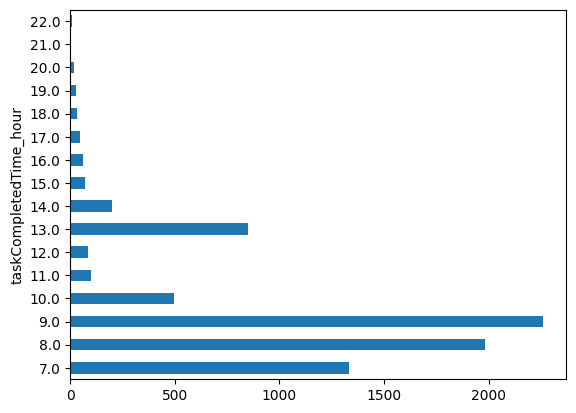

In [111]:
df['taskCompletedTime_hour'].value_counts().sort_index().plot.barh()
plt.show()

We can see that most of our orders are delivered in the morning and noon. This is understandable because couriers is working in those hours. As a side note, we can also employ a part-time worker to help in our rush hour